##### import all libraries

In [2970]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2971]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2972]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

##### Import dataset

In [2973]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [2974]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2975]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

##### Extract company from CarName

In [2976]:
new = df['CarName'].str.split(" ", n = 1, expand = True) 
df['Company']=new[0]

In [2977]:
#Drop unnescessary column
df=df.drop(columns=['CarName'],axis=1)

In [2978]:
#Change datatype to correct one
to_category=['symboling','car_ID']
num_col=[]
for i in df.columns:
    if(df[i].dtypes==object):
        to_category.append(i)
for i in to_category:
    df[i]=df[i].astype('category')
for i in df.columns:    
    if(df[i].dtypes=='int64' or df[i].dtypes=='float64'):
        num_col.append(i)

    

In [2979]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null category
symboling           205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-n

##### Check for any missing data

In [2980]:
#print(df.columns)
for i in df.columns:
    #print(df[i].dtypes,i)
    #if( df[i].dtypes=='float64' or df[i].dtypes=='int64'):
        print(i,df[i].count()/len(df)*100)

car_ID 100.0
symboling 100.0
fueltype 100.0
aspiration 100.0
doornumber 100.0
carbody 100.0
drivewheel 100.0
enginelocation 100.0
wheelbase 100.0
carlength 100.0
carwidth 100.0
carheight 100.0
curbweight 100.0
enginetype 100.0
cylindernumber 100.0
enginesize 100.0
fuelsystem 100.0
boreratio 100.0
stroke 100.0
compressionratio 100.0
horsepower 100.0
peakrpm 100.0
citympg 100.0
highwaympg 100.0
price 100.0
Company 100.0


##### Checking for outlier

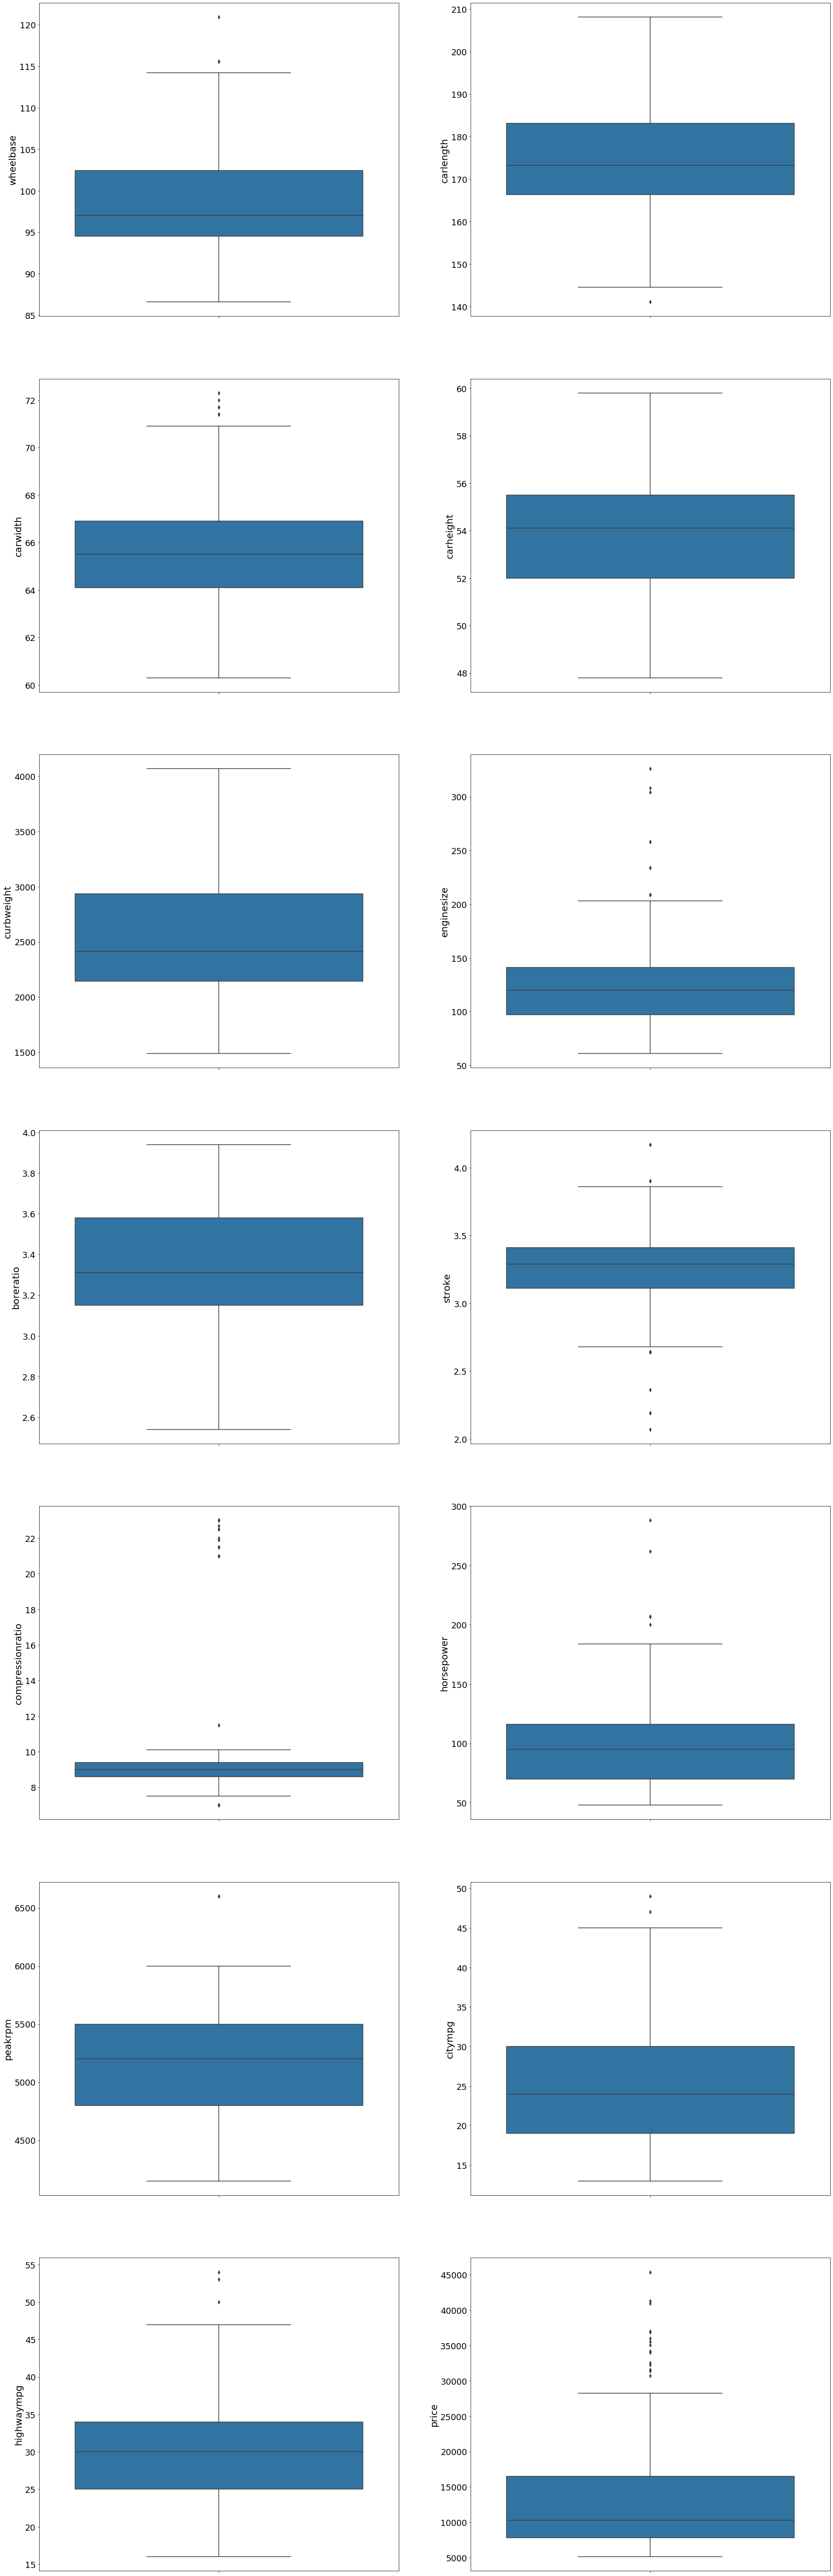

In [2981]:
#Checking numerical data
o=2
if(len(num_col)%o==0):
    n=len(num_col)//o
else:
    n=len(num_col)//o+1

fig,axes=plt.subplots(n,o,figsize=(30,100))
i=0
j=0
for col in num_col:
    ax=axes[i][j]
    sns.boxplot(y=df[col],ax=ax)
    ax.tick_params(axis="both",labelsize=18)
    ax.set_ylabel(col,fontsize=20)
    if(j<o-1):
        j=j+1
    else:
        j=0
        i=i+1
        

In [2982]:
#checking categorical data
long_cat=[]
short_cat=[]
for i in to_category:
    print(i,",",len(df[i].unique()),",",end='')
    if(i=='car_ID' and len(df[i])==len(list(df[i].unique()))):
        print(' No duplicate')
    else:
        print(' Duplicate')
    if(len(df[i].unique())>30):
        long_cat.append(i)
    else:
        short_cat.append(i)
    

symboling , 6 , Duplicate
car_ID , 205 , No duplicate
fueltype , 2 , Duplicate
aspiration , 2 , Duplicate
doornumber , 2 , Duplicate
carbody , 5 , Duplicate
drivewheel , 3 , Duplicate
enginelocation , 2 , Duplicate
enginetype , 7 , Duplicate
cylindernumber , 7 , Duplicate
fuelsystem , 8 , Duplicate
Company , 28 , Duplicate


[3, 1, 2, 0, -1, -2]
['gas', 'diesel']
['std', 'turbo']
['two', 'four']
['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
['rwd', 'fwd', '4wd']
['front', 'rear']
['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo']


C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


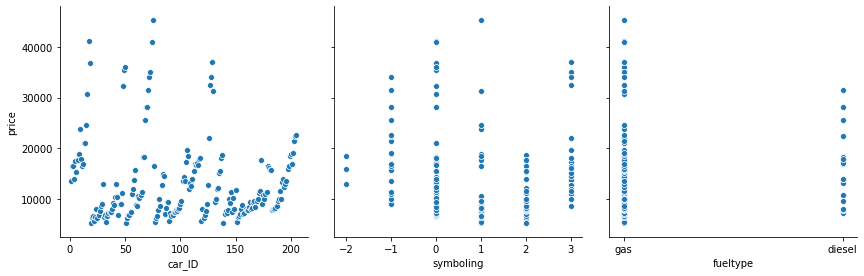

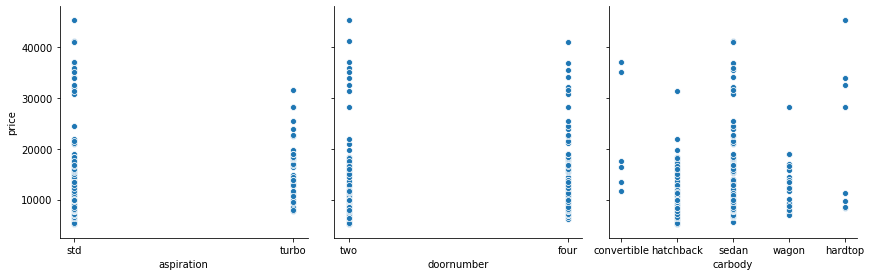

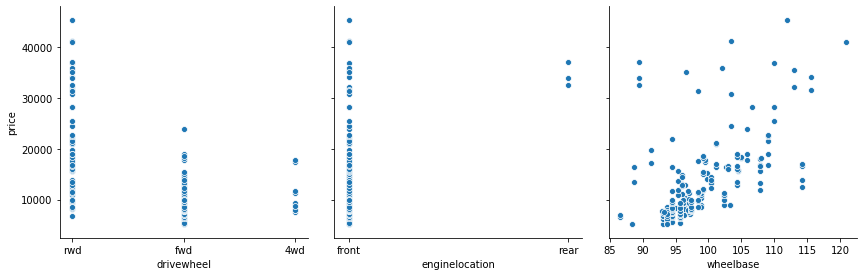

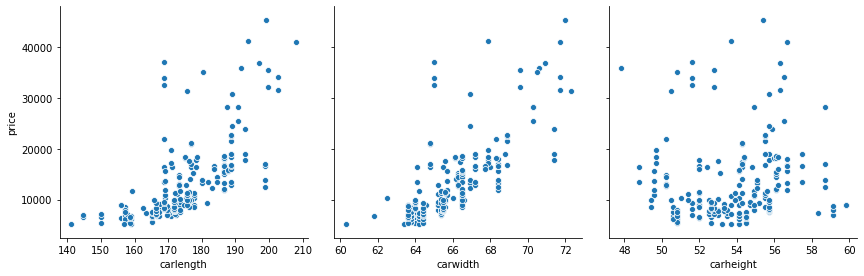

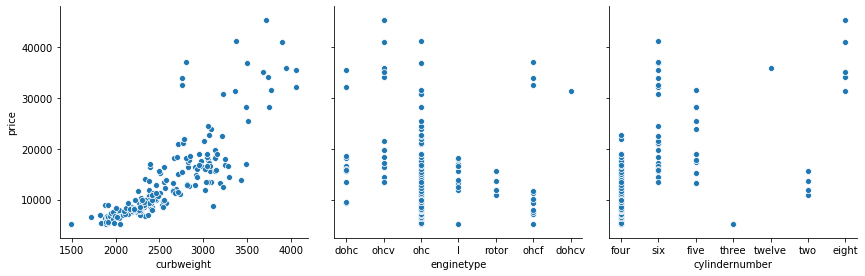

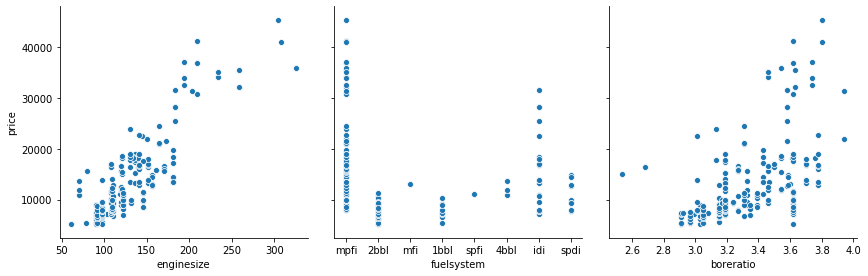

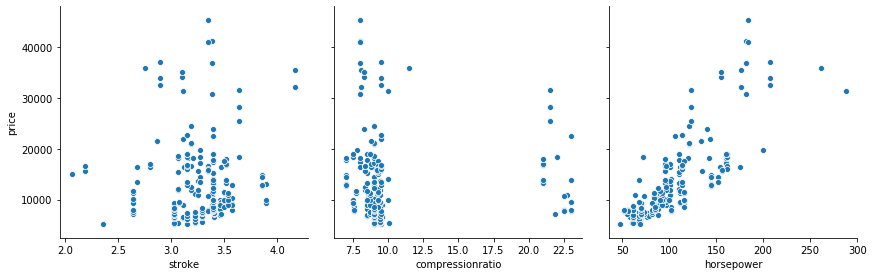

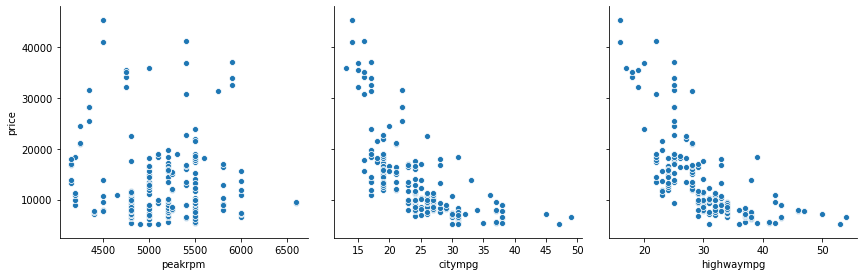

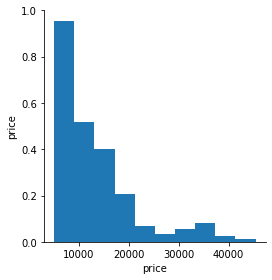

In [2983]:
for i in short_cat:
    print(list(df[i].unique()))
col=list(df.columns)
for i in range(0,len(col),3):
    if(i<len(col)-3):
        sns.pairplot(df,x_vars=df.columns[i:i+3],y_vars='price',size=4, aspect=1, kind='scatter')
    else:
        sns.pairplot(df,x_vars=df.columns[i:-1],y_vars='price',size=4, aspect=1, kind='scatter')
#sns.pairplot(df,x_vars=df.columns[3:6],y_vars='price',size=4, aspect=1, kind='scatter')
#sns.pairplot(df,x_vars=df.columns[7:-1],y_vars='price',size=4, aspect=1, kind='scatter')
    #plt.scatter(y=df[i],x=len(df.query(i+'=="'+str(j)+'"')))
    #for j in list(df[i].unique()):
        #print(j, len(df.query(i+'=="'+str(j)+'"')))

5


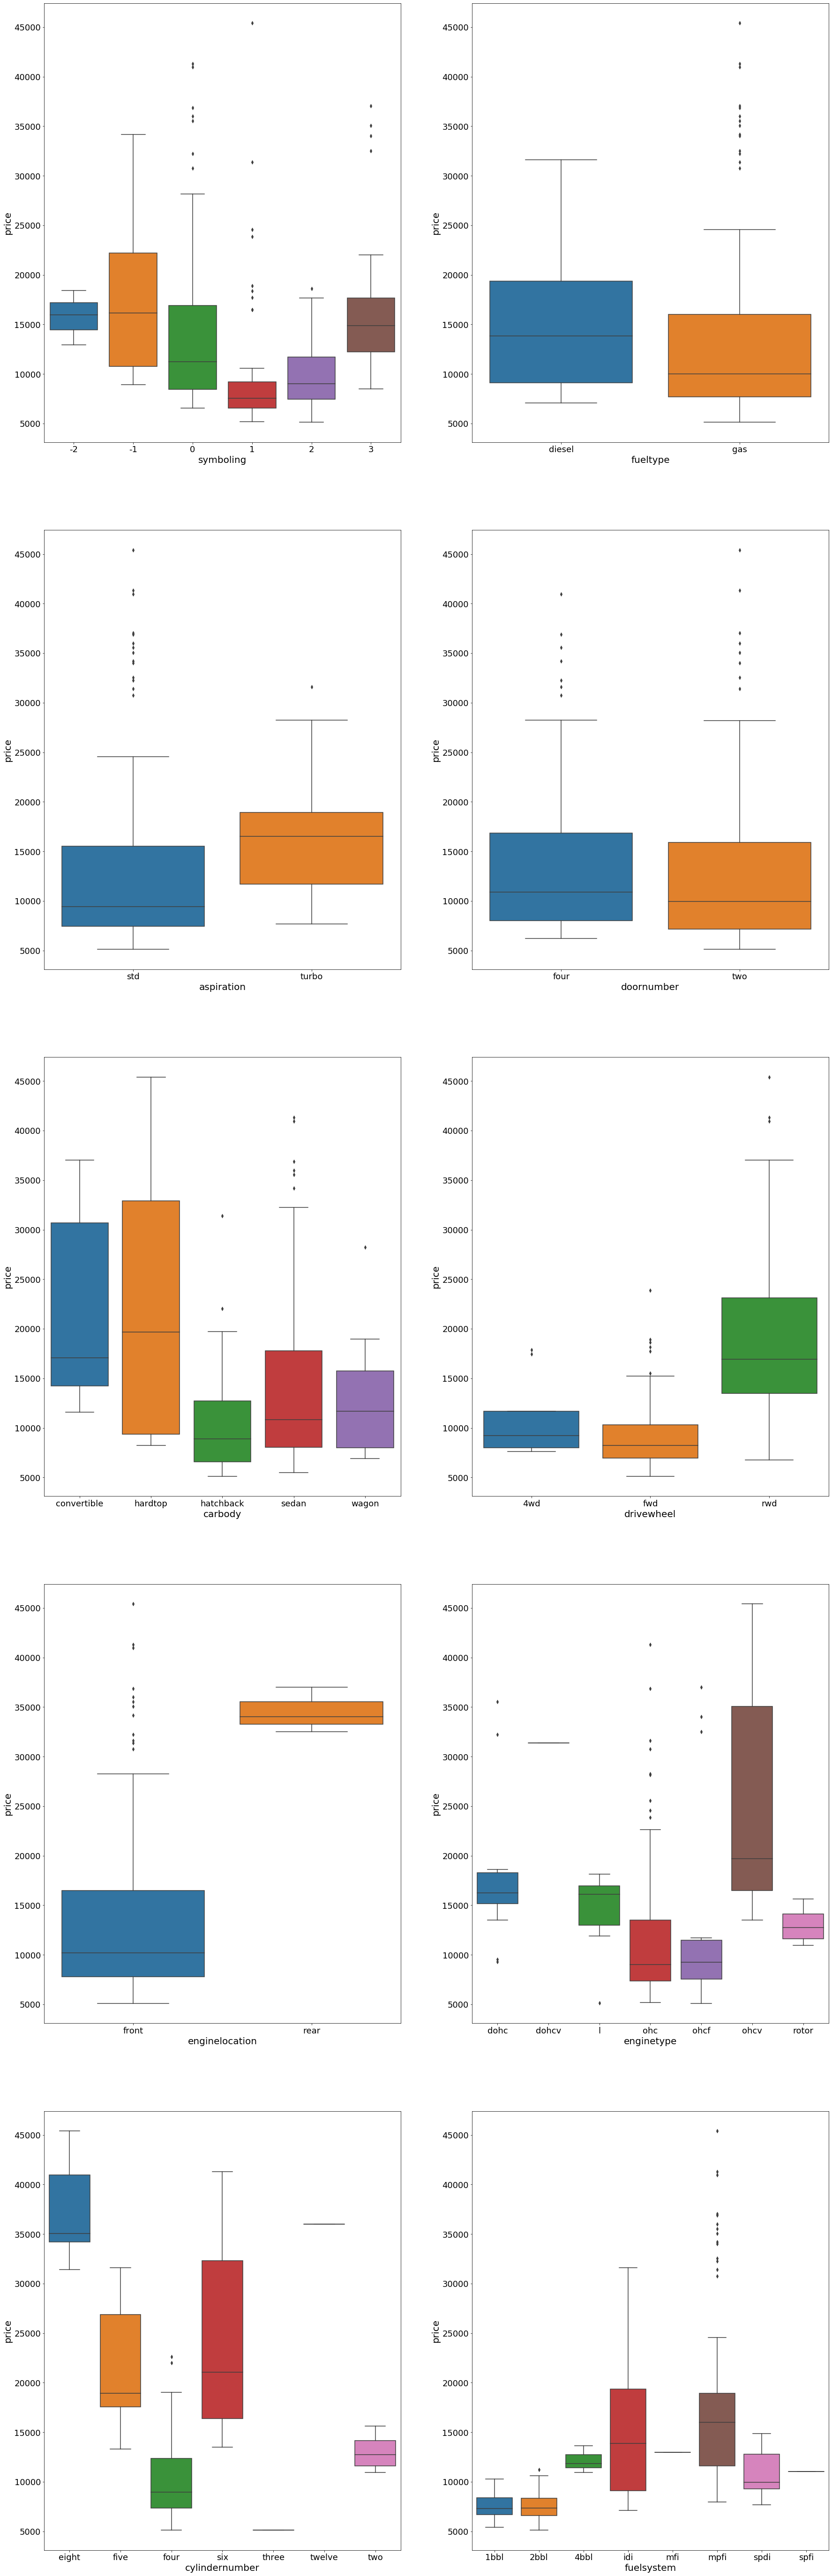

In [2984]:
#sns.pairplot(df)
numcol=len(short_cat)-1
o=2
if(numcol%o==0):
    n=numcol//o
    
else:
    n=numcol//o+1
print(n)
fig,axes=plt.subplots(n,o,figsize=(30,100))
i=0
j=0
for col in short_cat:
    
    
    if(col!='Company'):
        ax=axes[i][j]
        sns.boxplot(x=col,y='price',data=df,ax=ax)
        ax.tick_params(axis="both",labelsize=18)
        ax.set_xlabel(col,fontsize=20)
        ax.set_ylabel('price',fontsize=20)
        if(j<o-1):
            j=j+1
        else:
            j=0
            i=i+1
            

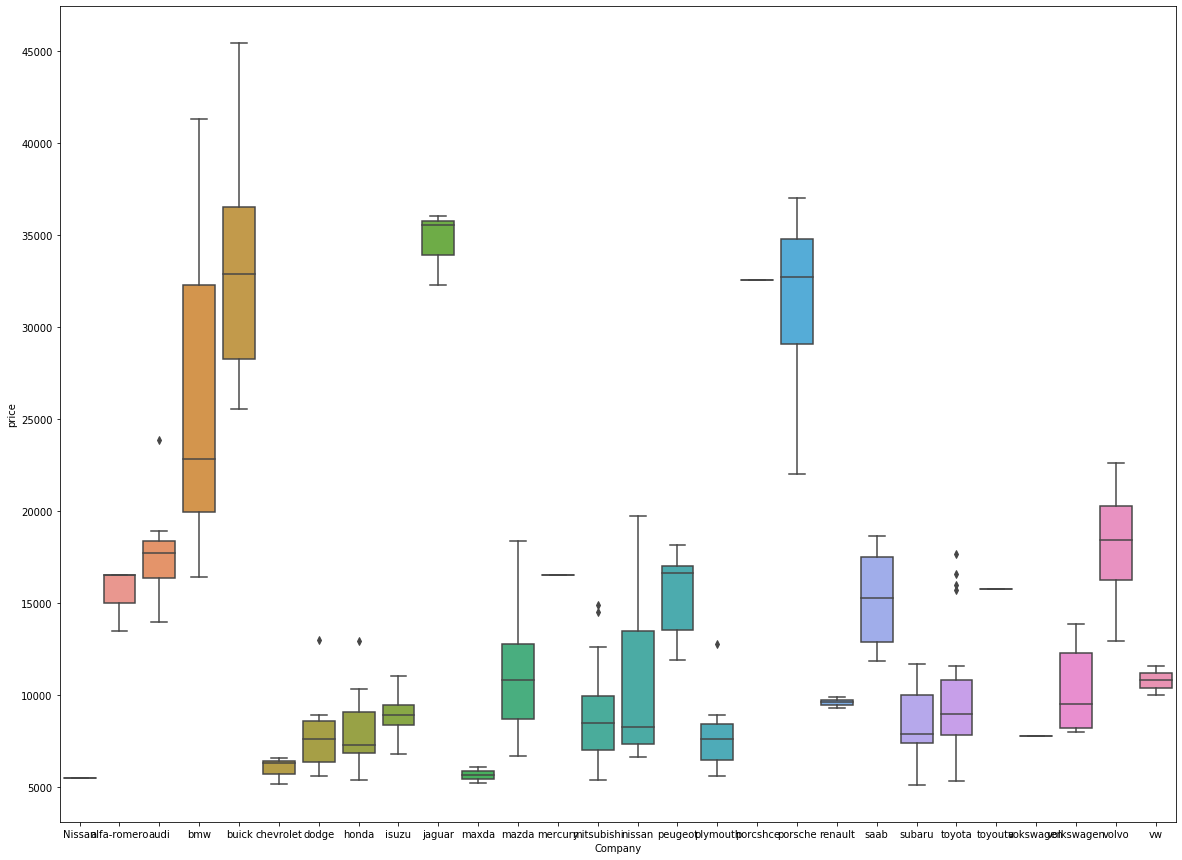

In [2985]:
plt.figure(figsize=(20,15))  
sns.boxplot(x='Company',y='price',data=df)

##### Data  cleanup

In [2986]:
#correcting company names
comp_replace={'alfa-romeo':'alfa-romero','mazda':'maxda','nissan':'Nissan','porsche':'porcshce','toyota':'toyouta','volkswagen':['vokswagen','vw']}
for toval in comp_replace.keys():
    df.replace(to_replace=comp_replace[toval],value=toval,inplace=True)

In [2987]:
df['Company'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [2988]:
# For single occurence of value in category, replacing with modes
replace_dict={'fuelsystem':['mfi','spfi'],'enginetype':['dohcv'],'cylindernumber':['three','twelve']}
for i in replace_dict.keys():
    df.replace(to_replace=replace_dict[i],value=df[i].mode()[0],inplace=True)


In [2989]:
for i in replace_dict.keys():
    print(df[i].unique())

['mpfi' '2bbl' '1bbl' '4bbl' 'idi' 'spdi']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'two' 'eight']


In [2990]:
#Capping outlier above max value to max value within population range  outside outlier
df.replace(to_replace=list(df.query('horsepower>250')['horsepower']),value=df.query('horsepower<250').max()['horsepower'],inplace=True)
df.replace(to_replace=list(df.query('peakrpm>6200') ['peakrpm']),value=df.query('peakrpm<=6200').max()['peakrpm'],inplace=True)

In [2991]:
df.query('peakrpm<=6200').max()['peakrpm']

6000

In [2992]:
print('horsepower>250',df.query('horsepower>250').shape)
print('peakrpm>6200',df.query('peakrpm>6200').shape)

horsepower>250 (0, 26)
peakrpm>6200 (0, 26)


C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


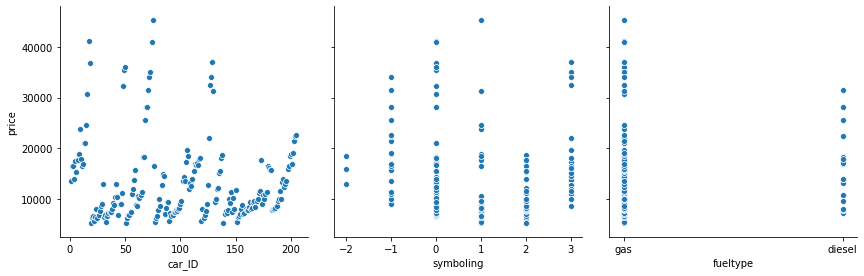

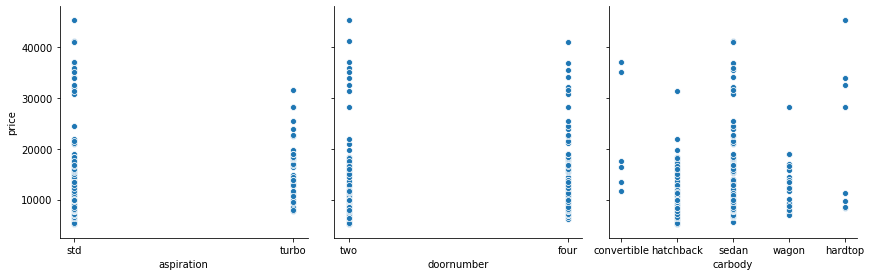

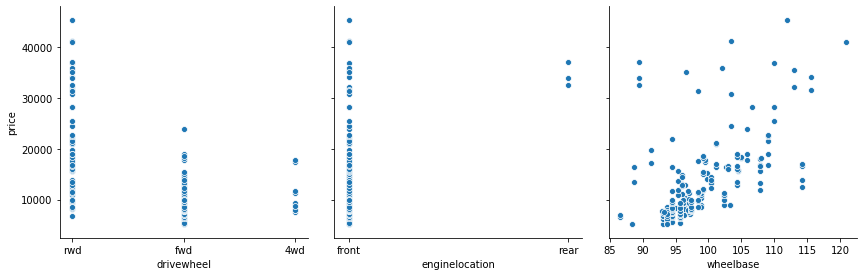

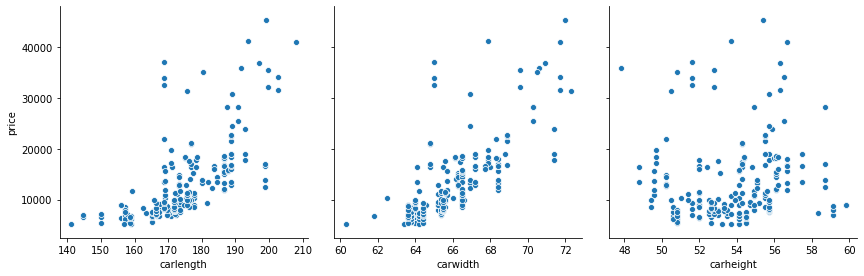

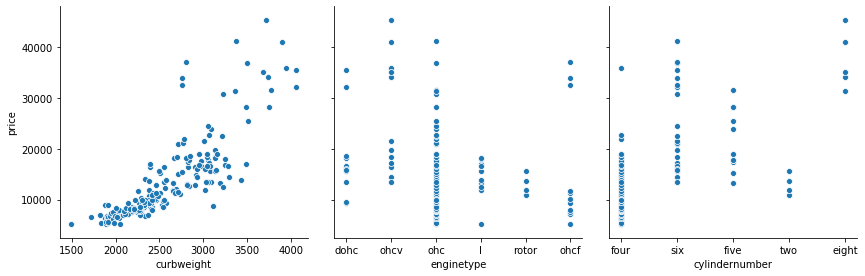

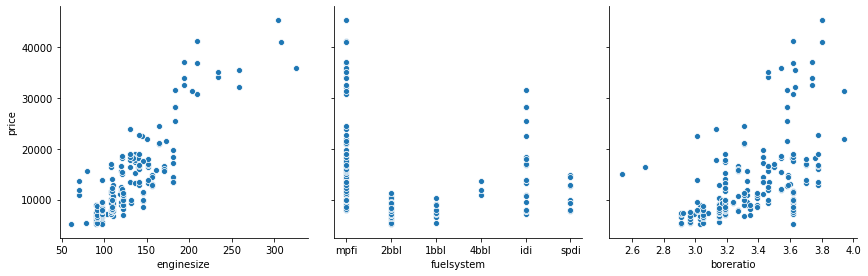

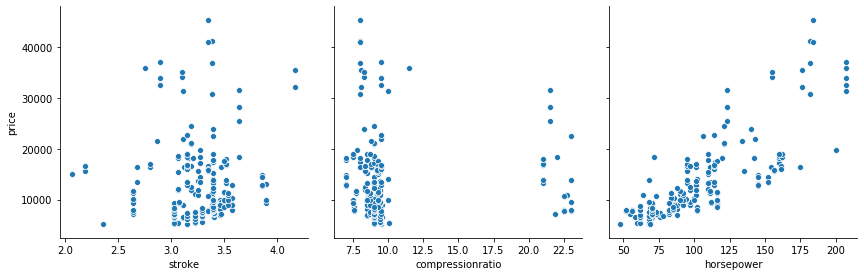

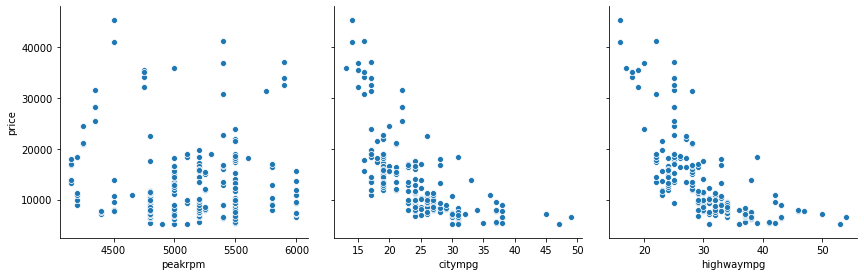

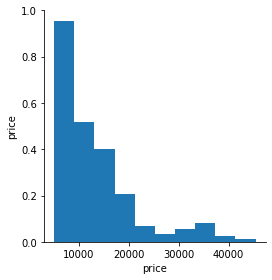

In [2993]:
col=list(df.columns)
for i in range(0,len(col),3):
    if(i<len(col)-3):
        sns.pairplot(df,x_vars=df.columns[i:i+3],y_vars='price',size=4, aspect=1, kind='scatter')
    else:
        sns.pairplot(df,x_vars=df.columns[i:-1],y_vars='price',size=4, aspect=1, kind='scatter')


In [2994]:
# Drop car_ID not required for analysis
df.drop(columns='car_ID',axis=1,inplace=True)

In [2995]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


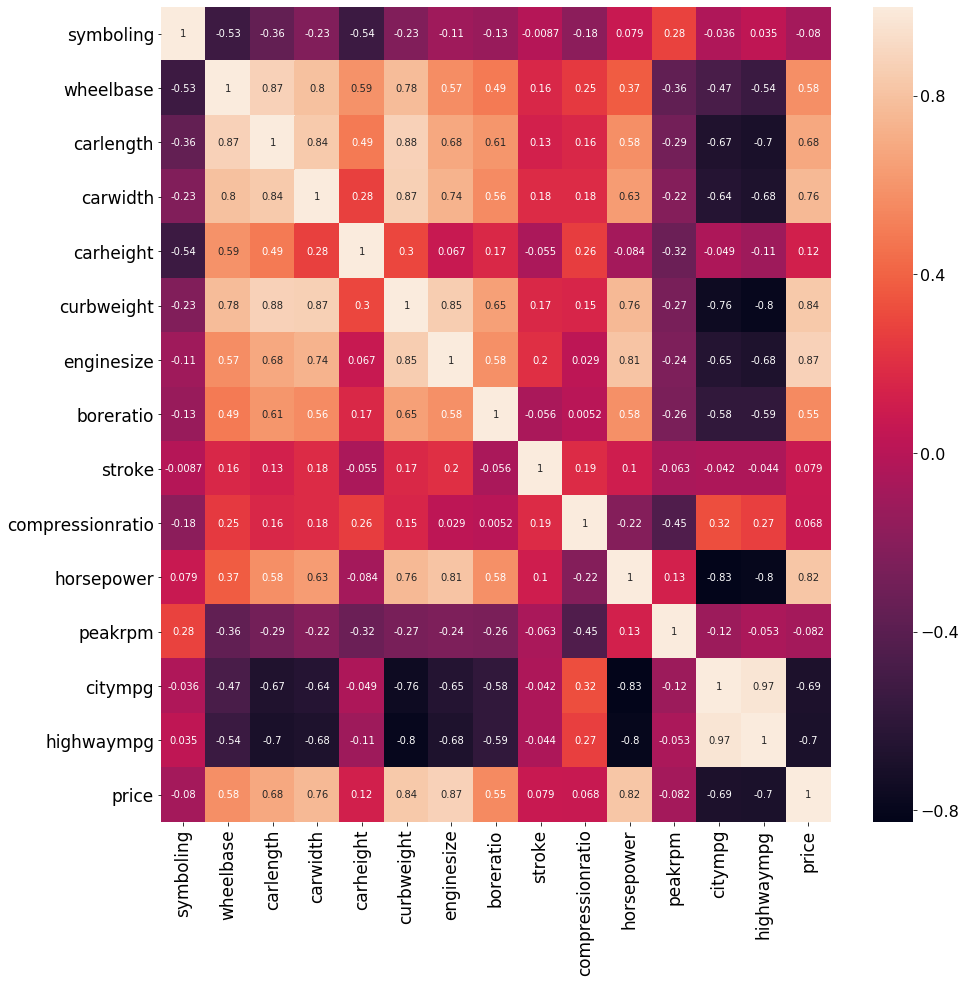

In [2996]:
#Heatmap if numerical values
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True)
plt.tick_params(axis='both',labelsize=17)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)

##### Creating dummy columns for categories

In [2997]:
encode_dict={}


for col in short_cat:
    if(len(df[col].unique())==2):
        before=df[col].unique()
        le = preprocessing.LabelEncoder()
        df[col]=pd.Series(le.fit_transform(df[col]))
        after=df[col].unique()
        small_dict={}
        for i in range(0,len(before)):
            small_dict[before[i]]=after[i]
        encode_dict[col]=small_dict

In [2998]:
print(encode_dict)

{'fueltype': {'gas': 1, 'diesel': 0}, 'aspiration': {'std': 0, 'turbo': 1}, 'doornumber': {'two': 1, 'four': 0}, 'enginelocation': {'front': 0, 'rear': 1}}


In [2999]:
rename_dict={'fueltype':'fueltype_gas','aspiration':'aspiration_turbo',
             'doornumber':'doornumber_two','enginelocation':'enginloc_rear'}
df=df.rename(columns=rename_dict)

In [3000]:
for i in list(rename_dict.keys()):
    short_cat.remove(i)
    short_cat.append(rename_dict[i])
print(short_cat)

['symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'Company', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'enginloc_rear']


In [3001]:
df.head()

,symboling,fueltype_gas,aspiration_turbo,doornumber_two,carbody,drivewheel,enginloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [3002]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype_gas        205 non-null int32
aspiration_turbo    205 non-null int32
doornumber_two      205 non-null int32
carbody             205 non-null object
drivewheel          205 non-null object
enginloc_rear       205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg        

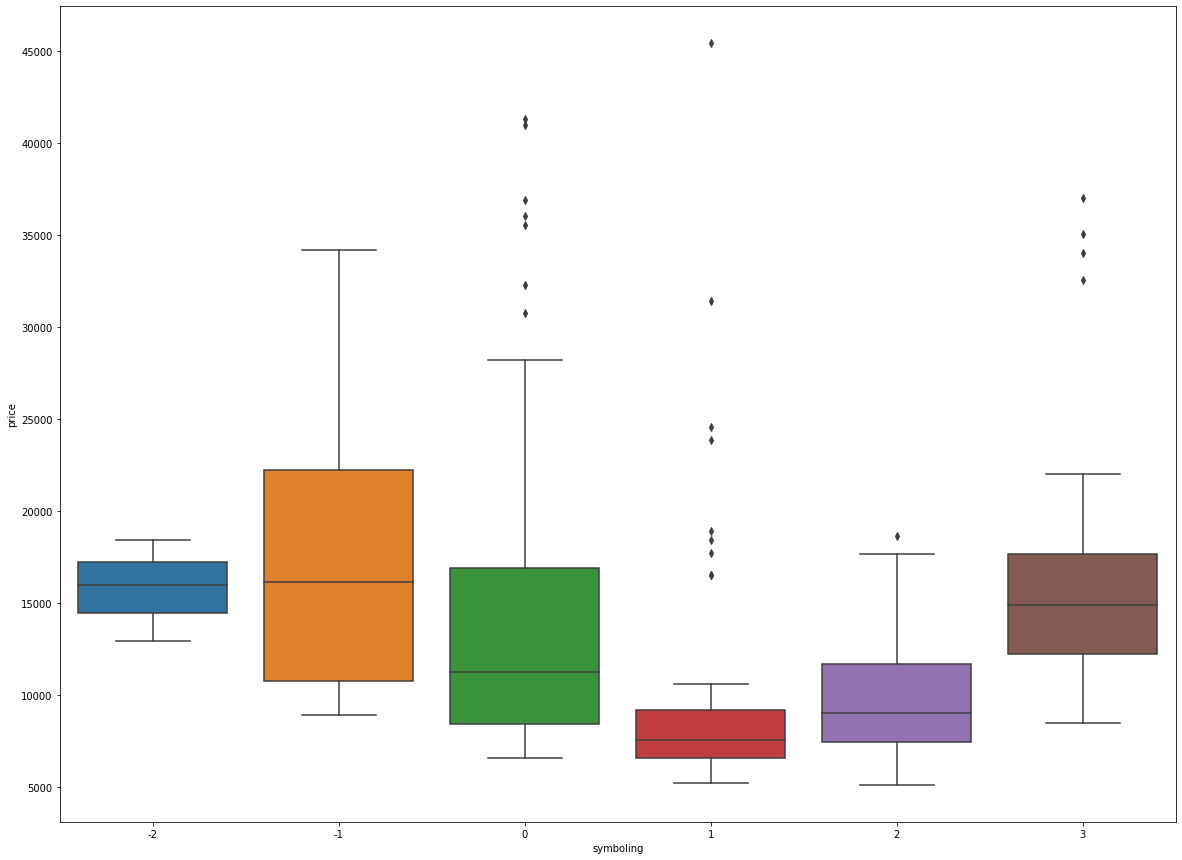

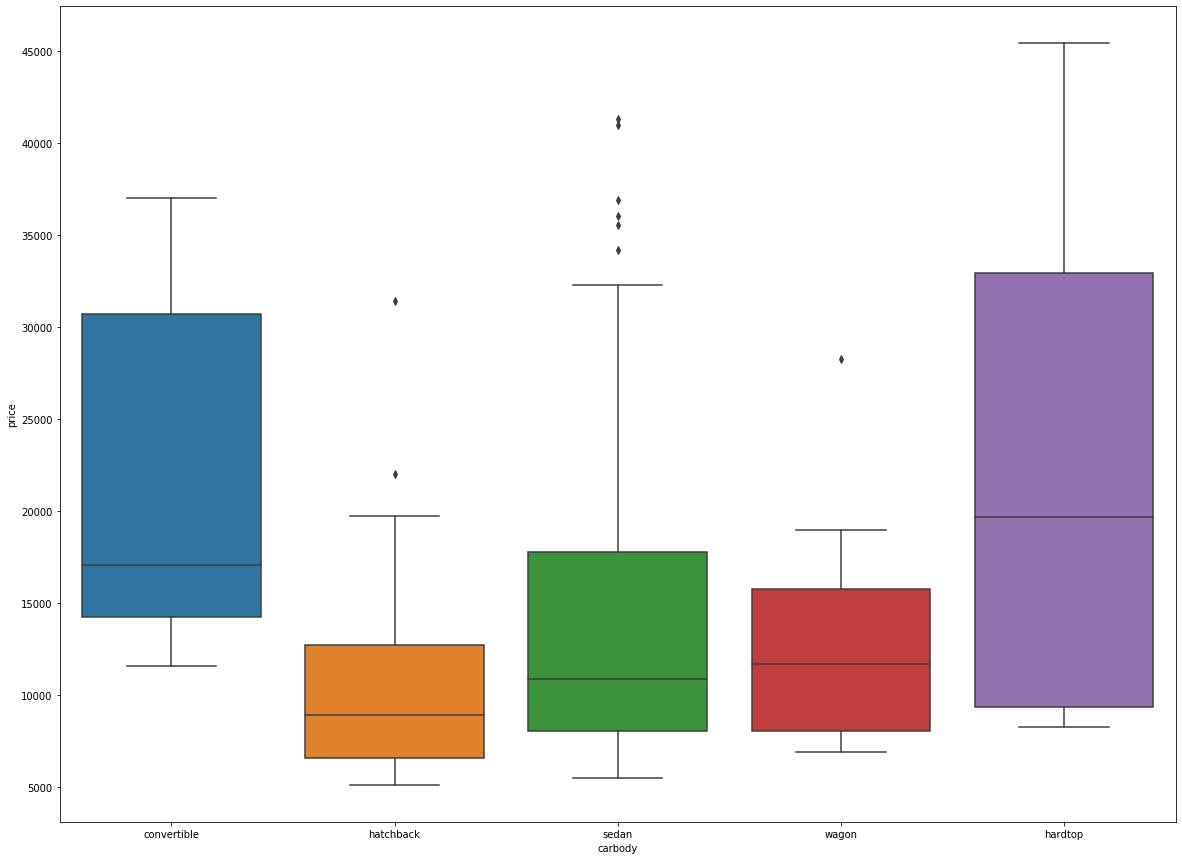

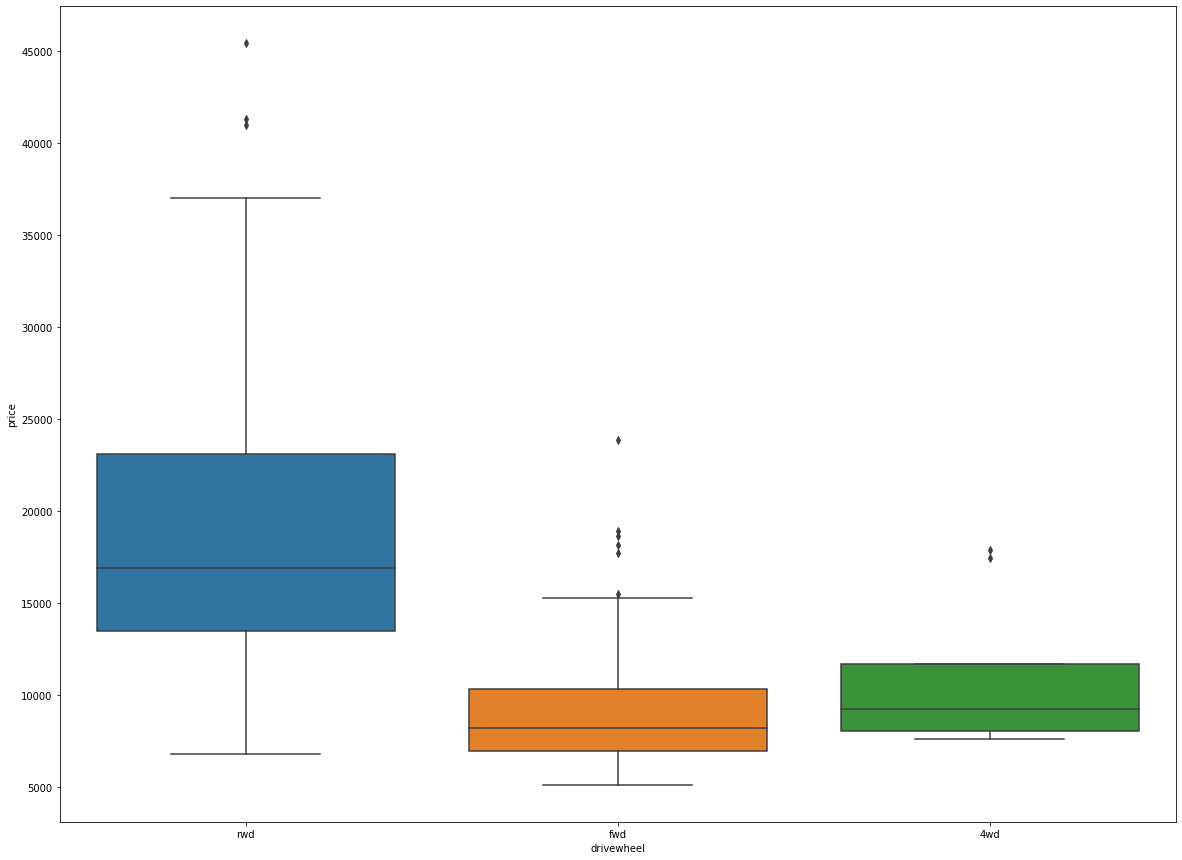

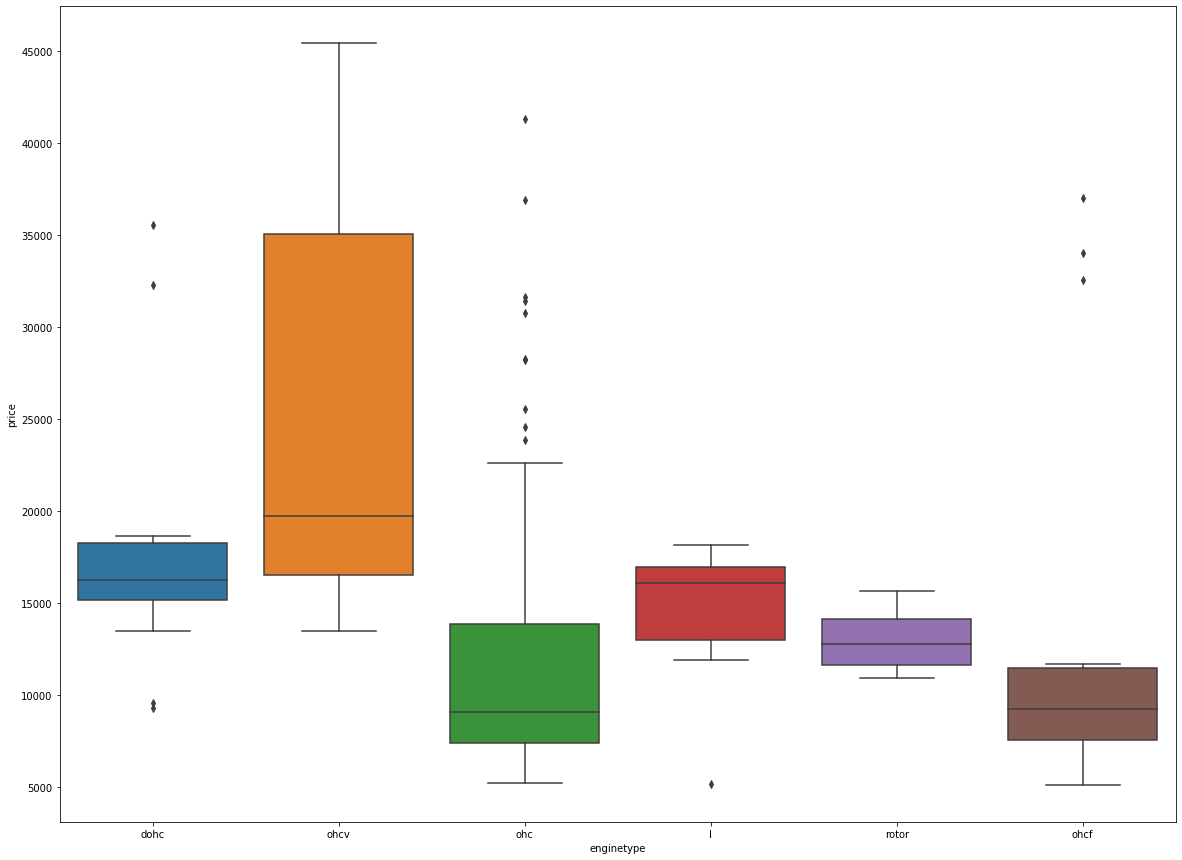

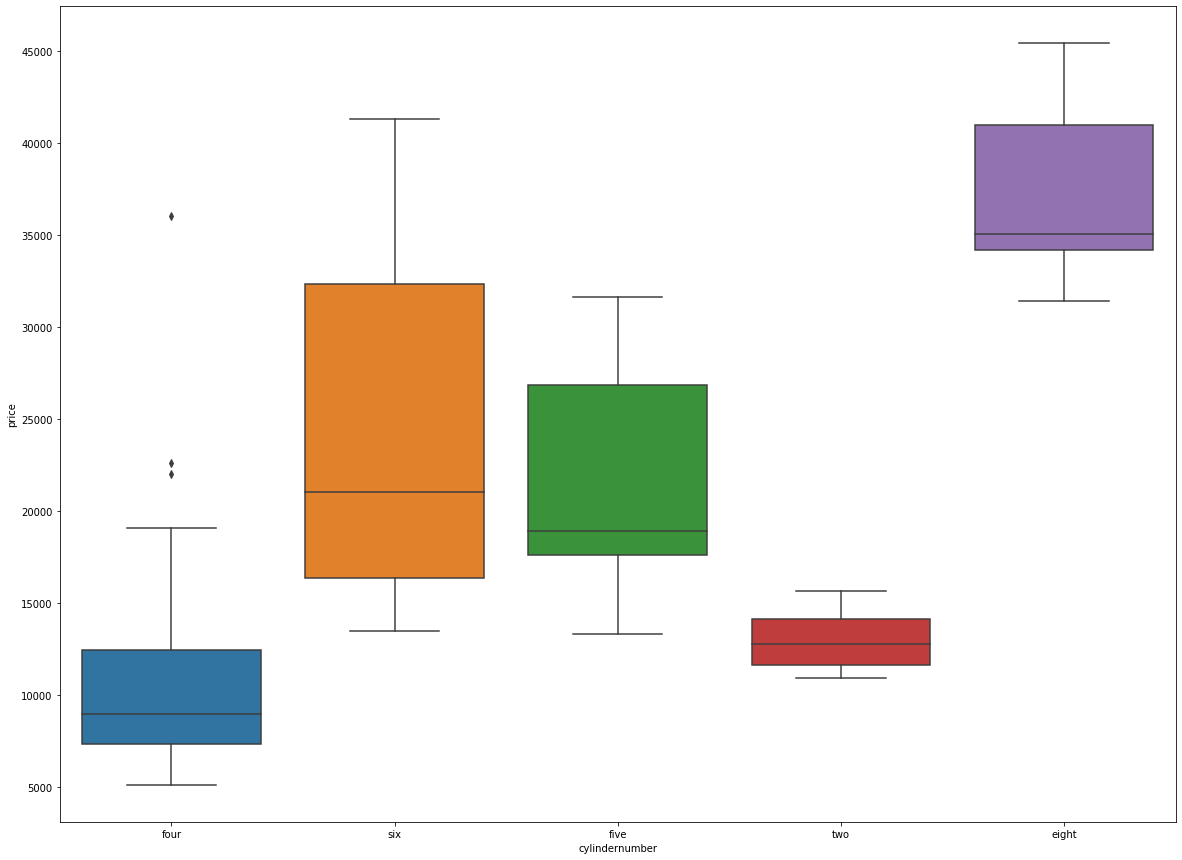

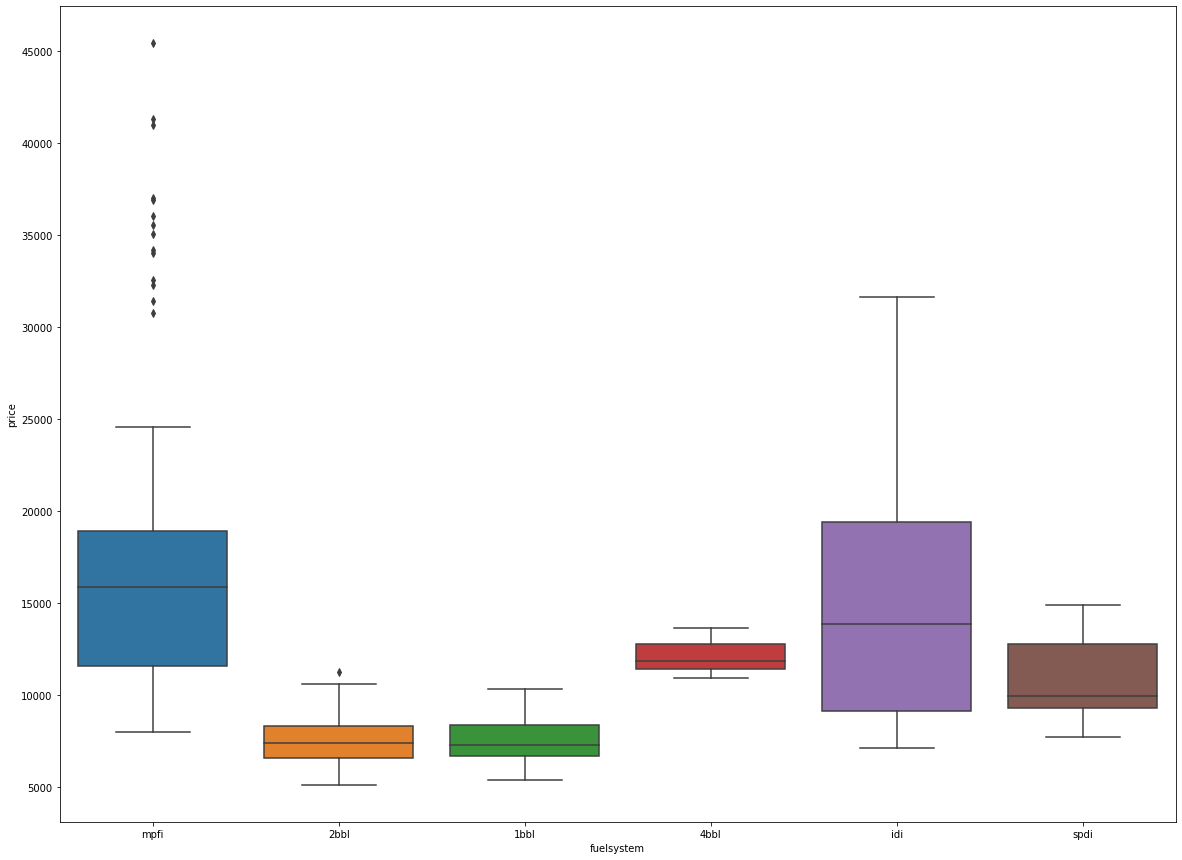

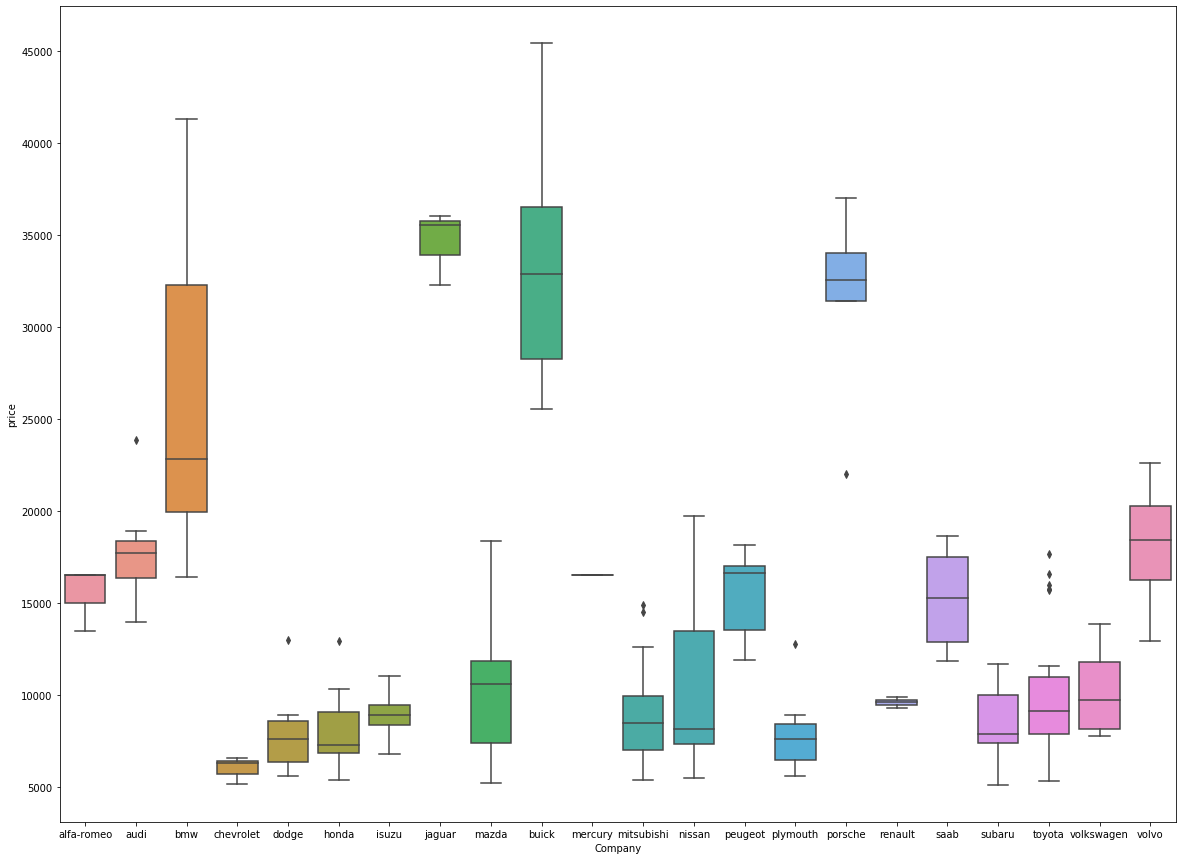

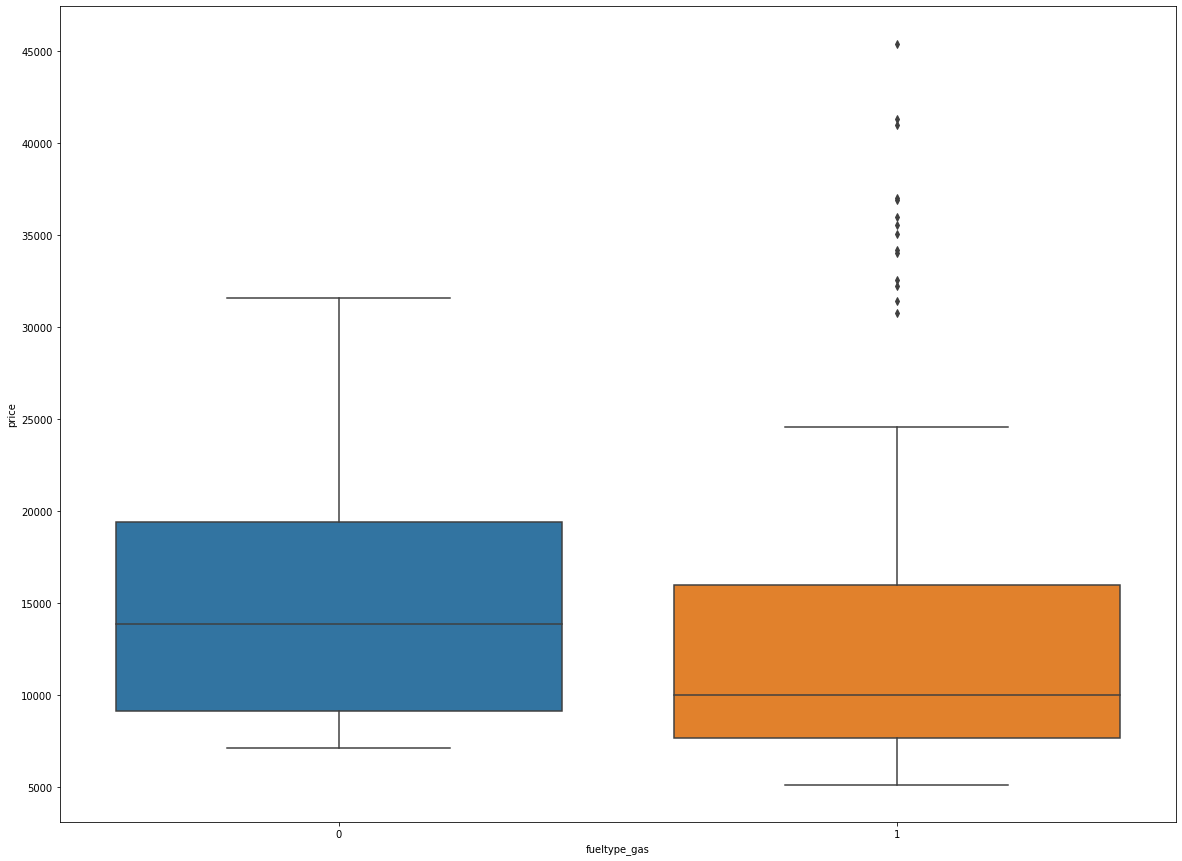

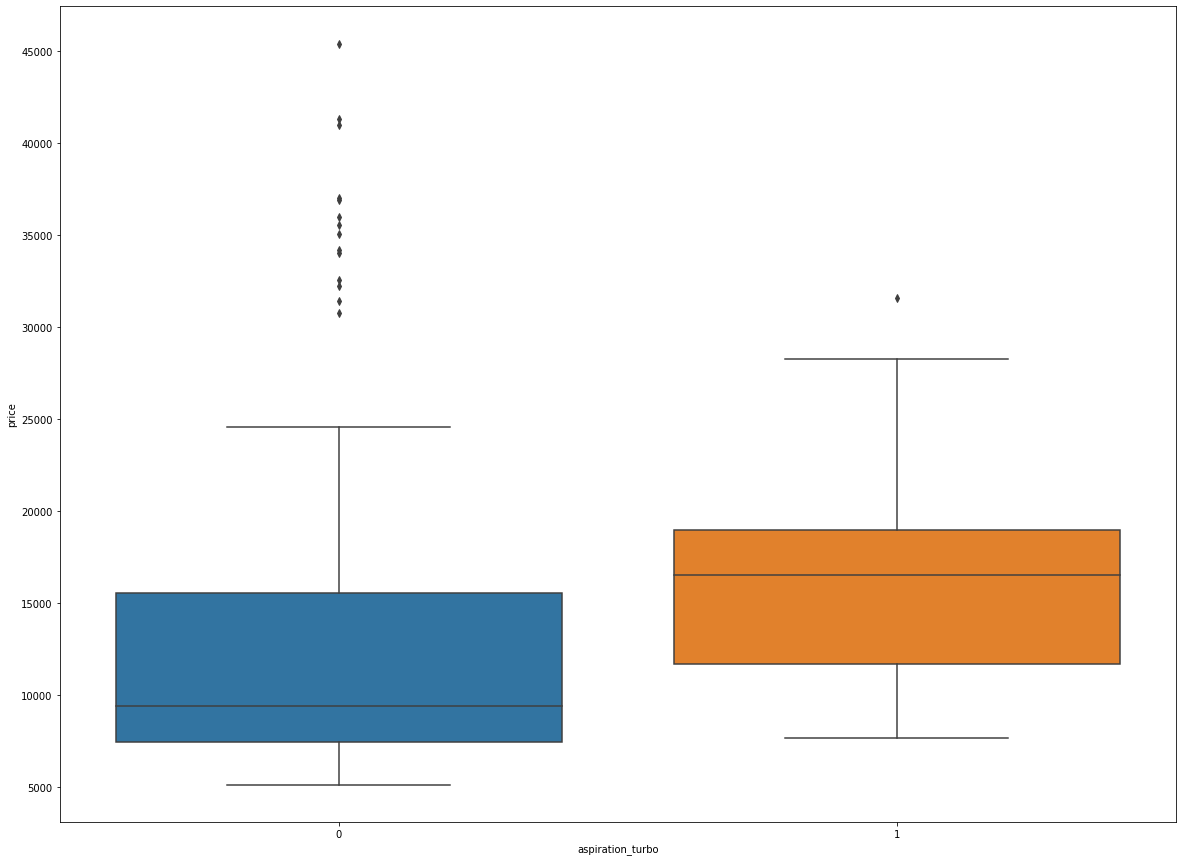

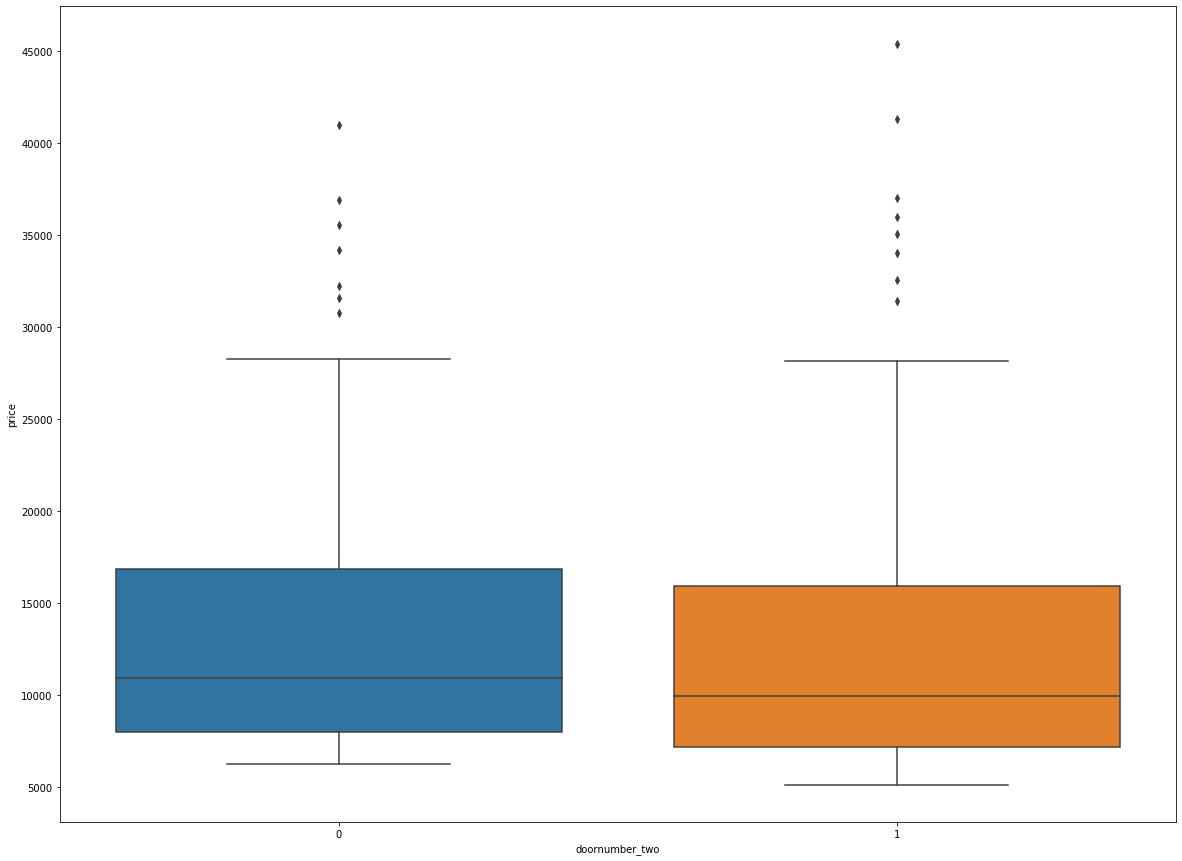

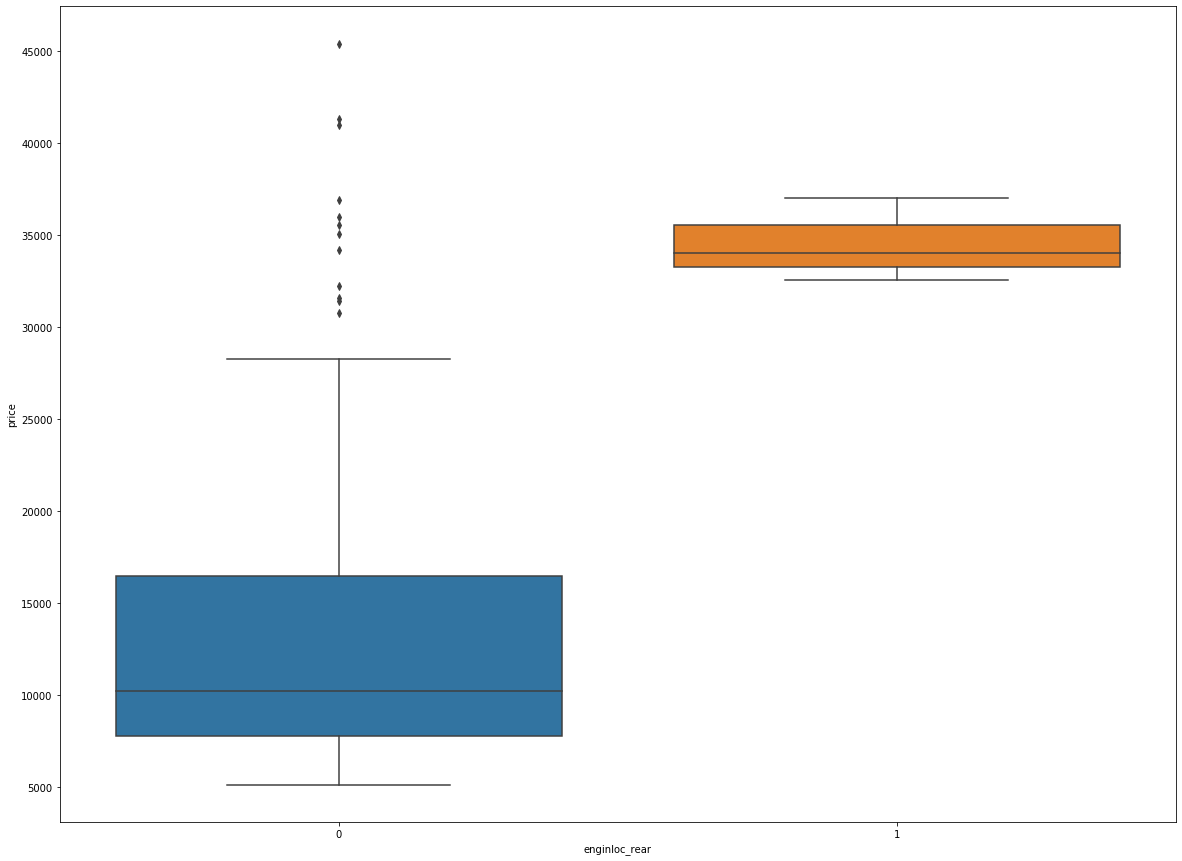

In [3003]:
#sns.pairplot(df)
for i in short_cat:
    plt.figure(figsize=(20,15))
    sns.boxplot(x=i,y='price',data=df)

In [3004]:
orig_dict={}
to_split=short_cat[0:6]
to_split.append('Company')
for i in to_split:
    orig_dict[i]=list(df[i].unique())
    status=pd.get_dummies(df[i],drop_first=True)
    ren_dict={}
    for j in list(status.columns):
        ren_dict[j]=str(i)+'_'+str(j)
    status.rename(columns=ren_dict,inplace=True)
    #print(ren_dict)
    #print(status)
    df=pd.concat([df,status],axis=1)
    df.drop(columns=i,inplace=True)

In [3005]:
df.head()

,fueltype_gas,aspiration_turbo,doornumber_two,enginloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3006]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
fueltype_gas           205 non-null int32
aspiration_turbo       205 non-null int32
doornumber_two         205 non-null int32
enginloc_rear          205 non-null int32
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
symboling_-1           205 non-null uint8
symboling_0            205 non-null uint8
symboling_1            205 non-null uin

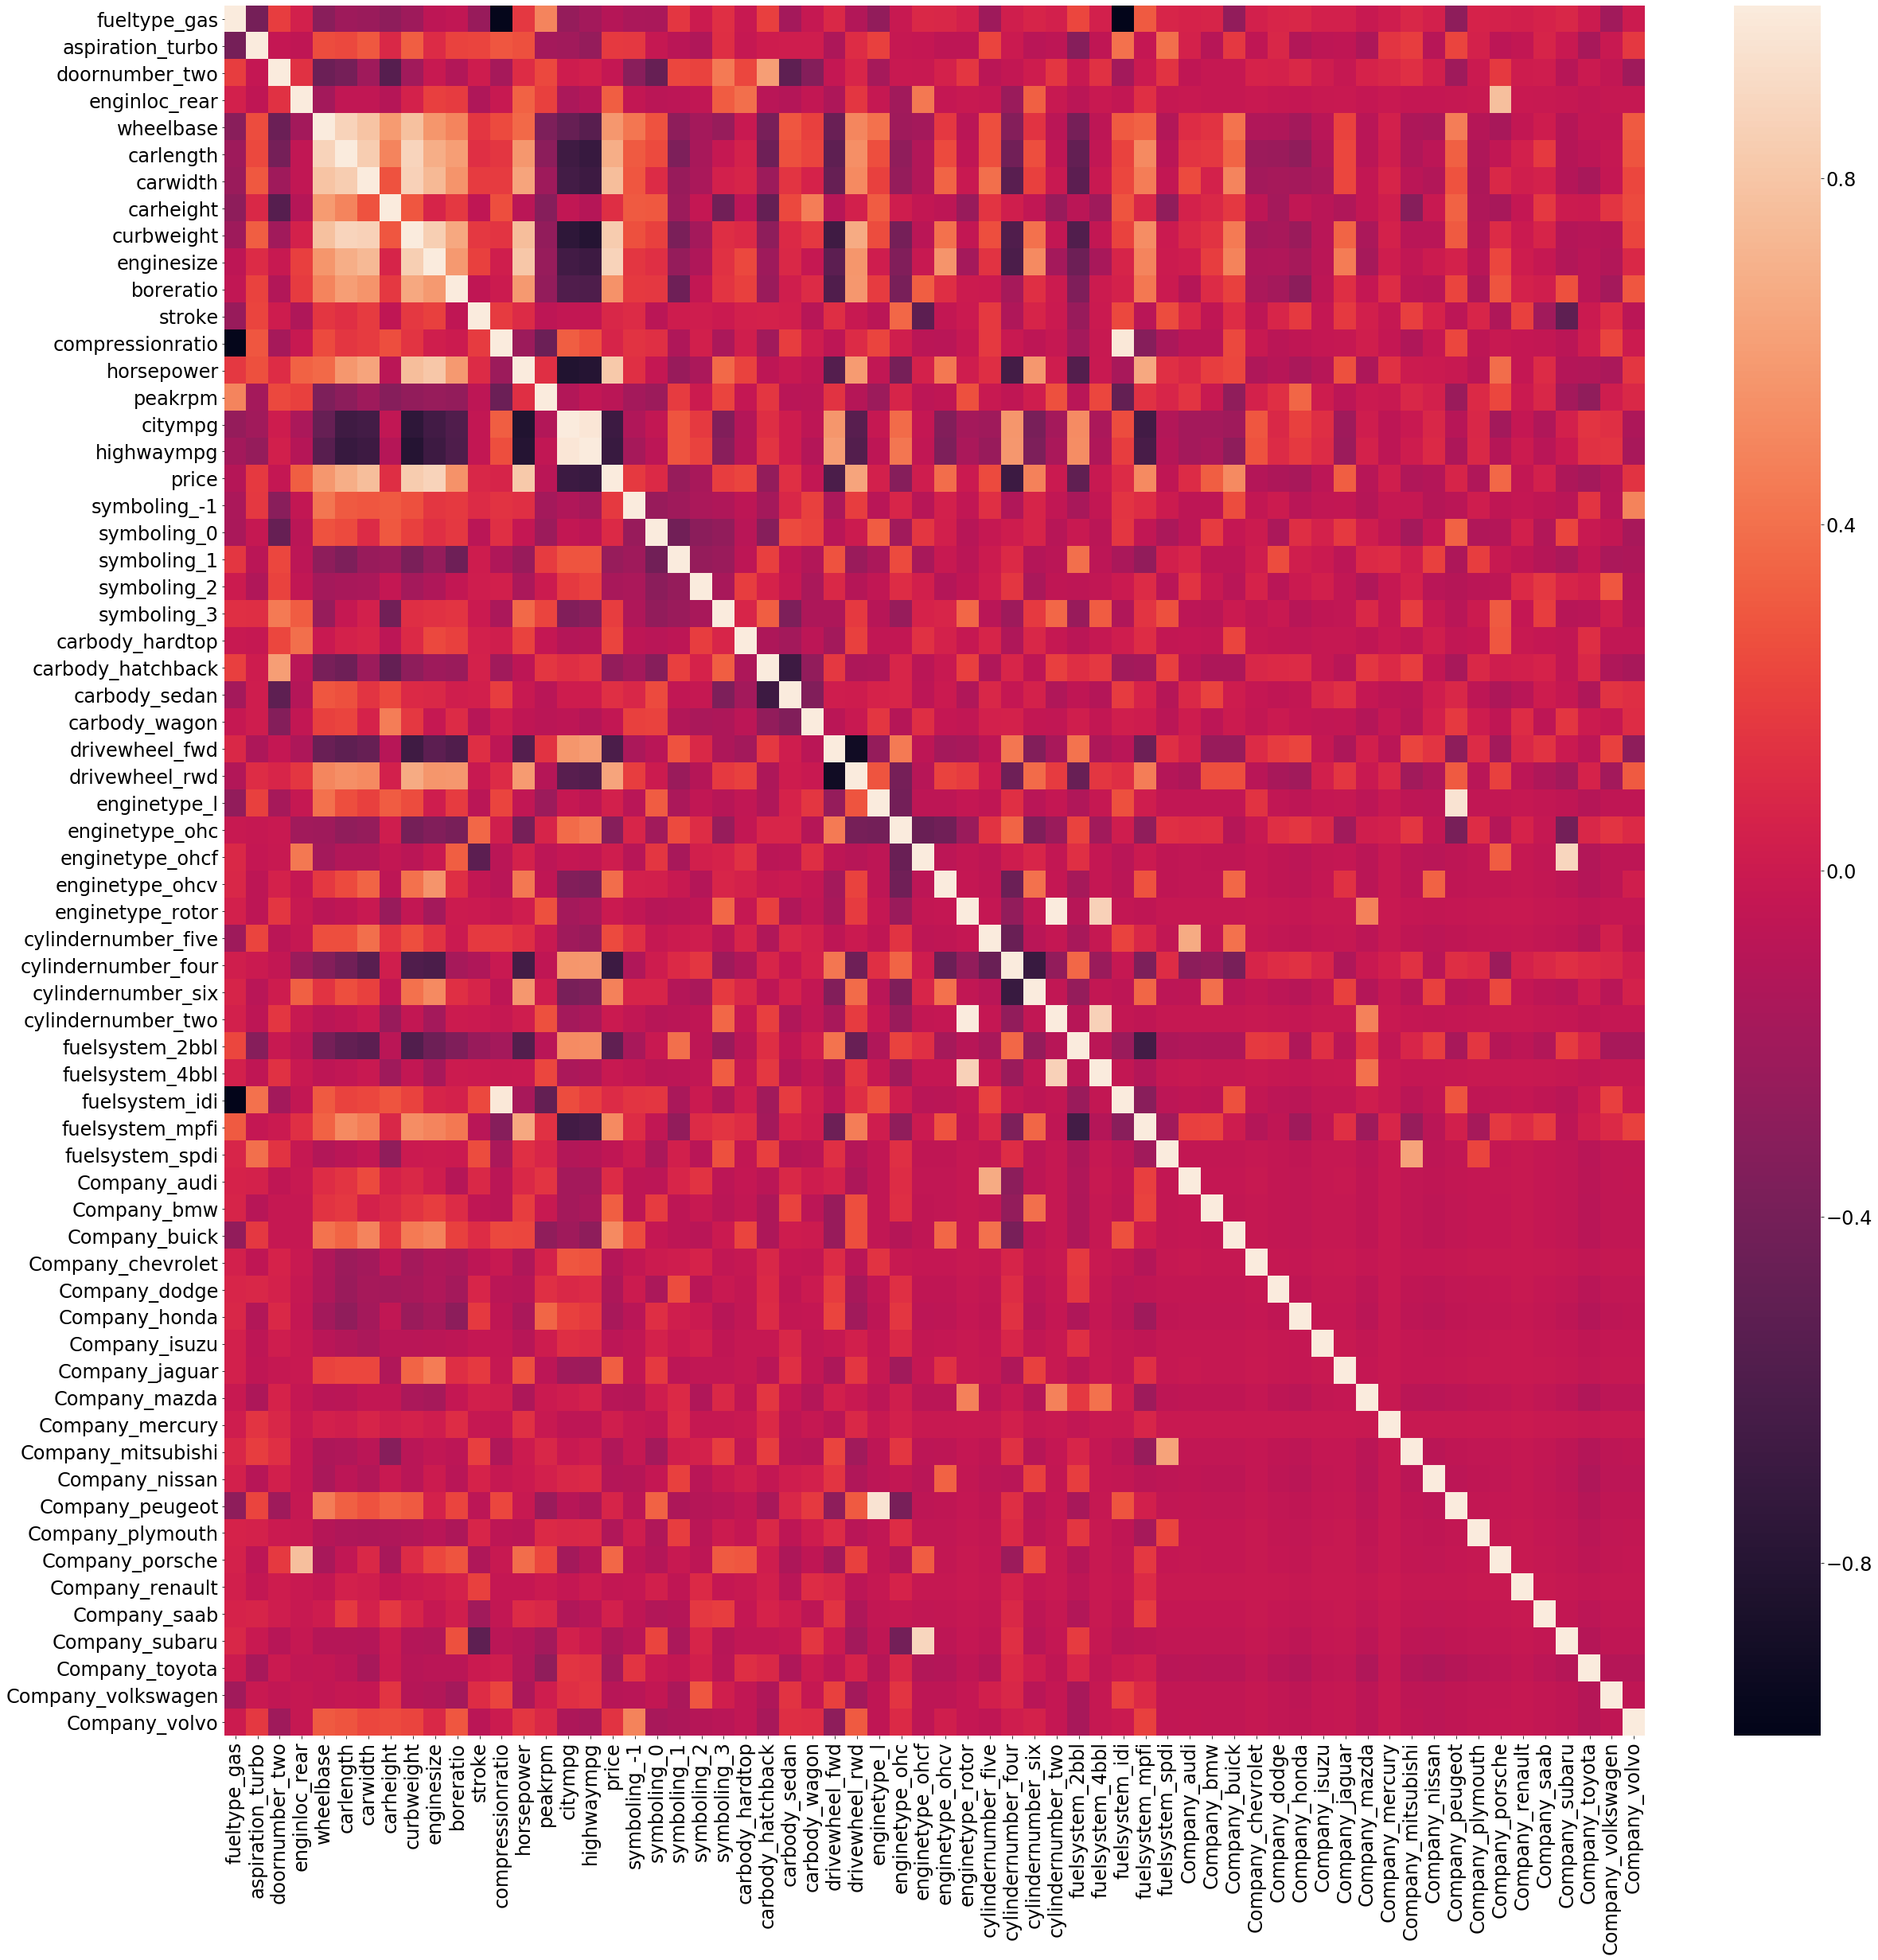

In [3007]:
plt.figure(figsize=(40,40))

sns.heatmap(df.corr(),annot=False)
plt.tick_params(axis='both',labelsize=24)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=24)
#plt.legend(prop={"size":20})
#plt.set_xaxis()
#plt.savefig('total.png',bbox_inch='tight')

### high negative correlation between 
- compressionratio and fueltype_gas
- fuelsystem_idi and fueltype_gas
- cylindernumber_six and cylindernumber_four
- cylindernumber_four and price
- drivewheel_fwd and drivewheel_rwd
- citympg and horsepower
- highwaympg and horsepower

### high positive correlation
- carlength and wheelbase
- carwidth and wheelbase
- curbweight and wheebase
- carlength and curbweight
- carlength and carwidth
- fuelsystem_idi and compressionratio
- fuelsystem_4bbl and enginetype_rotor
- fuelsystem_4bbl and cylinder_two
- enginetype_rotor and cylinder_two
- highwaympg and citympg



##### Spliltting into train and test dataframe

In [3008]:
df_train,df_test=train_test_split(df,train_size=0.8,random_state=50)
print(df_train.shape)
print(num_col)

(164, 64)
['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


##### Preparing a  model from train dataframe

In [3009]:
#Using scaler for numerical columns
scaler=MinMaxScaler()
df_train[num_col]=scaler.fit_transform(df_train[num_col])

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3010]:
df_train.head()

,fueltype_gas,aspiration_turbo,doornumber_two,enginloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
180,1,0,0,0,0.617241,0.759350,0.516667,0.525000,0.637316,0.415094,0.521429,0.609524,0.13750,0.679245,0.567568,0.194444,0.210526,0.261845,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
38,1,0,1,0,0.341379,0.429268,0.408333,0.458333,0.310706,0.184906,0.435714,0.719048,0.12500,0.238994,0.891892,0.388889,0.447368,0.097990,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
156,1,0,0,0,0.313793,0.409756,0.341667,0.433333,0.230023,0.139623,0.464286,0.457143,0.12500,0.138365,0.351351,0.472222,0.552632,0.044399,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
40,1,0,0,0,0.341379,0.557724,0.183333,0.525000,0.342901,0.184906,0.435714,0.719048,0.12500,0.238994,0.891892,0.388889,0.447368,0.127804,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195,1,0,0,0,0.610345,0.775610,0.575000,0.808333,0.599690,0.301887,0.885714,0.514286,0.15625,0.415094,0.675676,0.277778,0.315789,0.205322,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3011]:
df_train[num_col].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.421110,0.539917,0.471494,0.503303,0.419897,0.253497,0.567334,0.563357,0.192805,0.359219,0.530653,0.330793,0.380456,0.212044
std,0.206692,0.200887,0.178756,0.204917,0.204187,0.159122,0.195775,0.145659,0.239900,0.241238,0.251353,0.183815,0.182306,0.204033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.423984,0.325000,0.350000,0.272692,0.139623,0.435714,0.495238,0.100000,0.157233,0.351351,0.166667,0.236842,0.065641
50%,0.365517,0.526016,0.433333,0.525000,0.362490,0.222642,0.564286,0.571429,0.125000,0.295597,0.567568,0.305556,0.368421,0.140302
75%,0.544828,0.693902,0.550000,0.658333,0.570694,0.305660,0.744643,0.633333,0.150000,0.454403,0.729730,0.472222,0.473684,0.292063
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


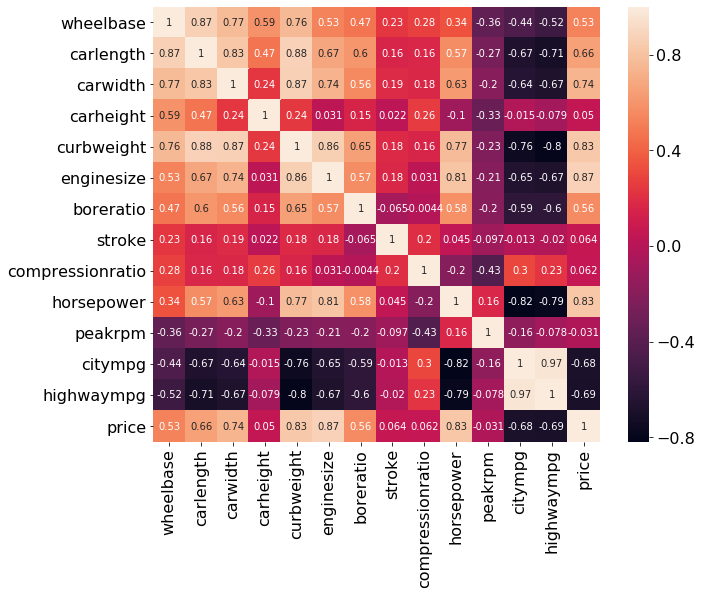

In [3012]:
plt.figure(figsize=(10,8))

sns.heatmap(df_train[num_col].corr(),annot=True)
plt.tick_params(axis='both',labelsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
#plt.legend(prop={"size":20})
#plt.set_xaxis()
#plt.savefig('total.png',bbox_inch='tight')

- Since citympg is highly correlated with higwaympg we can ignore highwaympg
- Carwidth,car length and engine size are highly correlated with curbweight
- Citympg is ocrrelated with may other variables in large amount,example horsepower,curbweight
- Correlation of stroke,compressionratio,car height and peakrpm is very low with price, hence dropping

In [3013]:
#df_train.drop(columns=['highwaympg','stroke','compressionratio','carheight','peakrpm'],axis=1,inplace=True)

In [3014]:
cat_encode_col=[]
for i in df_train.columns:
    if(df[i].dtype=='uint8'):
        cat_encode_col.append(i) 
cat_encode_col.append('price')

In [3015]:
mid_len=cat_encode_col.index('cylindernumber_five')
start_comp=cat_encode_col.index('Company_audi')
one_div=cat_encode_col[0:mid_len]

two_div=cat_encode_col[mid_len:start_comp]
three_div=cat_encode_col[start_comp:-1]
one_div.append('price')
two_div.append('price')

three_div.append('price')
#without_comp

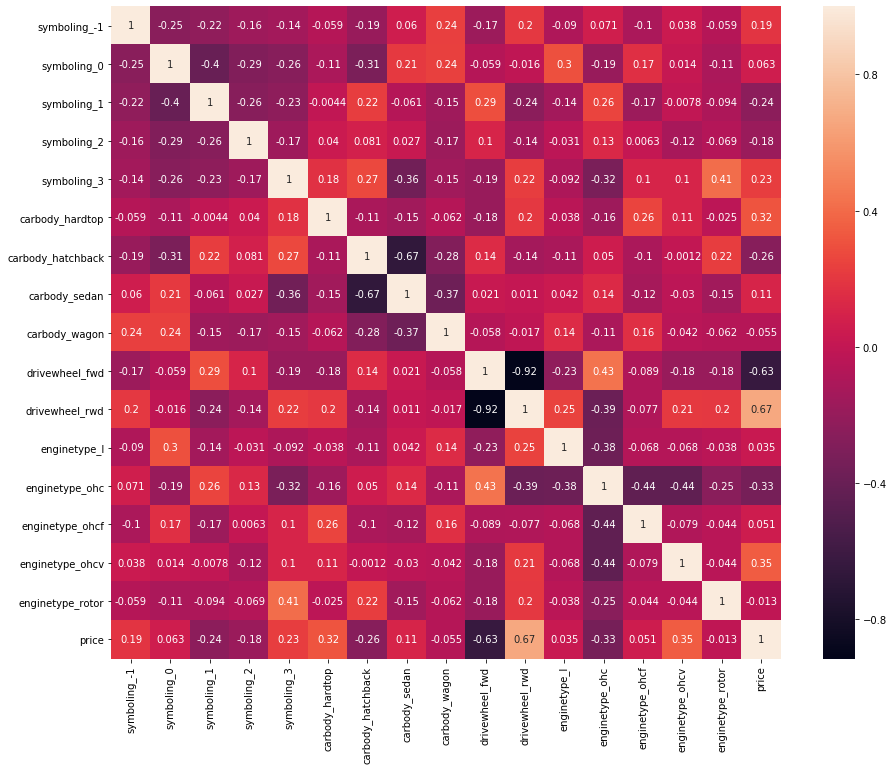

In [3016]:

plt.figure(figsize=(15,12))

sns.heatmap(df_train[one_div].corr(),annot=True)
#plt.tick_params(axis='both',labelsize=16)
#cax = plt.gcf().axes[-1]
#cax.tick_params(labelsize=16)
#plt.legend(prop={"size":20})
#plt.set_xaxis()
#plt.savefig('total.png',bbox_inch='tight')

- Price has high correlation with enginetype_ohc,enginetype_ohcv,carbody_hardtop,symboling_-1,carbody_hatchback,symboling_1,symboling_3,drivewheel_rwd,drivwwheel_fwd,symboling_2
-  drivewheel_fwd is highly correlated with drivewheel_rwd
- carbody_sedaan and carbody_hatchback is also correlated


In [3017]:
#df_train.drop(columns=['enginetype_rotor','enginetype_ohcf','carbody_wagon','carbody_hardtop','symboling_0'],axis=1,inplace=True)

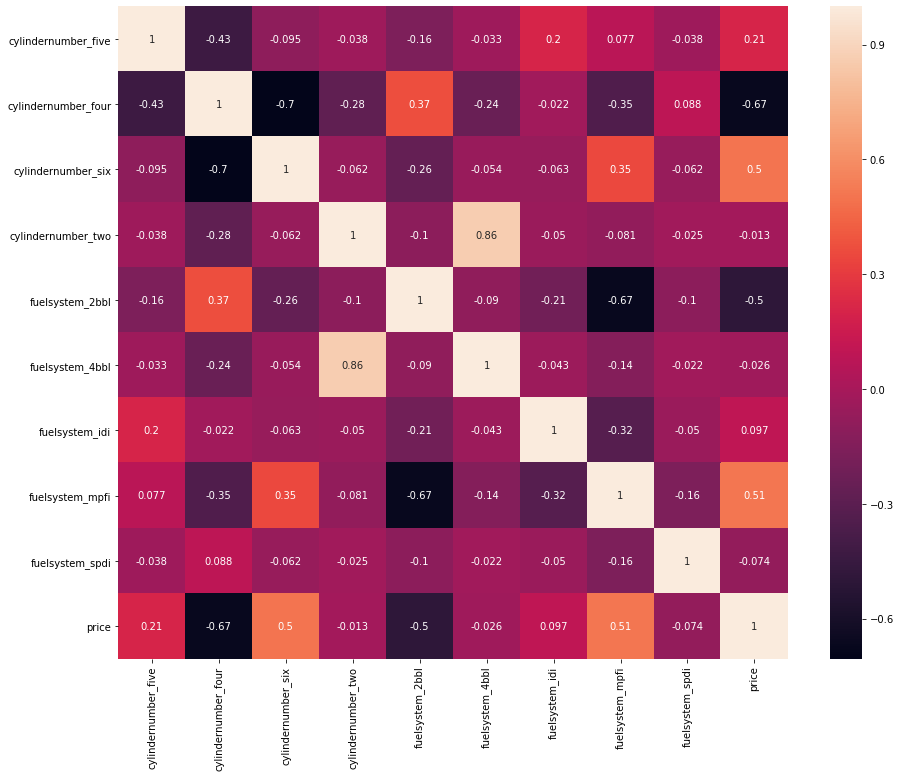

In [3018]:

plt.figure(figsize=(15,12))

sns.heatmap(df_train[two_div].corr(),annot=True)
#plt.tick_params(axis='both',labelsize=16)
#cax = plt.gcf().axes[-1]
#cax.tick_params(labelsize=16)
#plt.legend(prop={"size":20})
#plt.set_xaxis()
#plt.savefig('total.png',bbox_inch='tight')

- Price has high correlation with cylinder_four,fuelsystem_2bbl,cylindernumber_six,cylindernumber_five,fuelsystem_mpfi
- Cylinder_six and cylinder_four are highly correlated
- fuelsystem_2bbl and fuelsystem_mpfi are highly correlated
- cylindernumber_two and fuelsystem_44bl are higly correlated

In [3019]:
#df_train.drop(columns=['cylindernumber_two','fuelsystem_4bbl','fuelsystem_spdi'],axis=1,inplace=True)

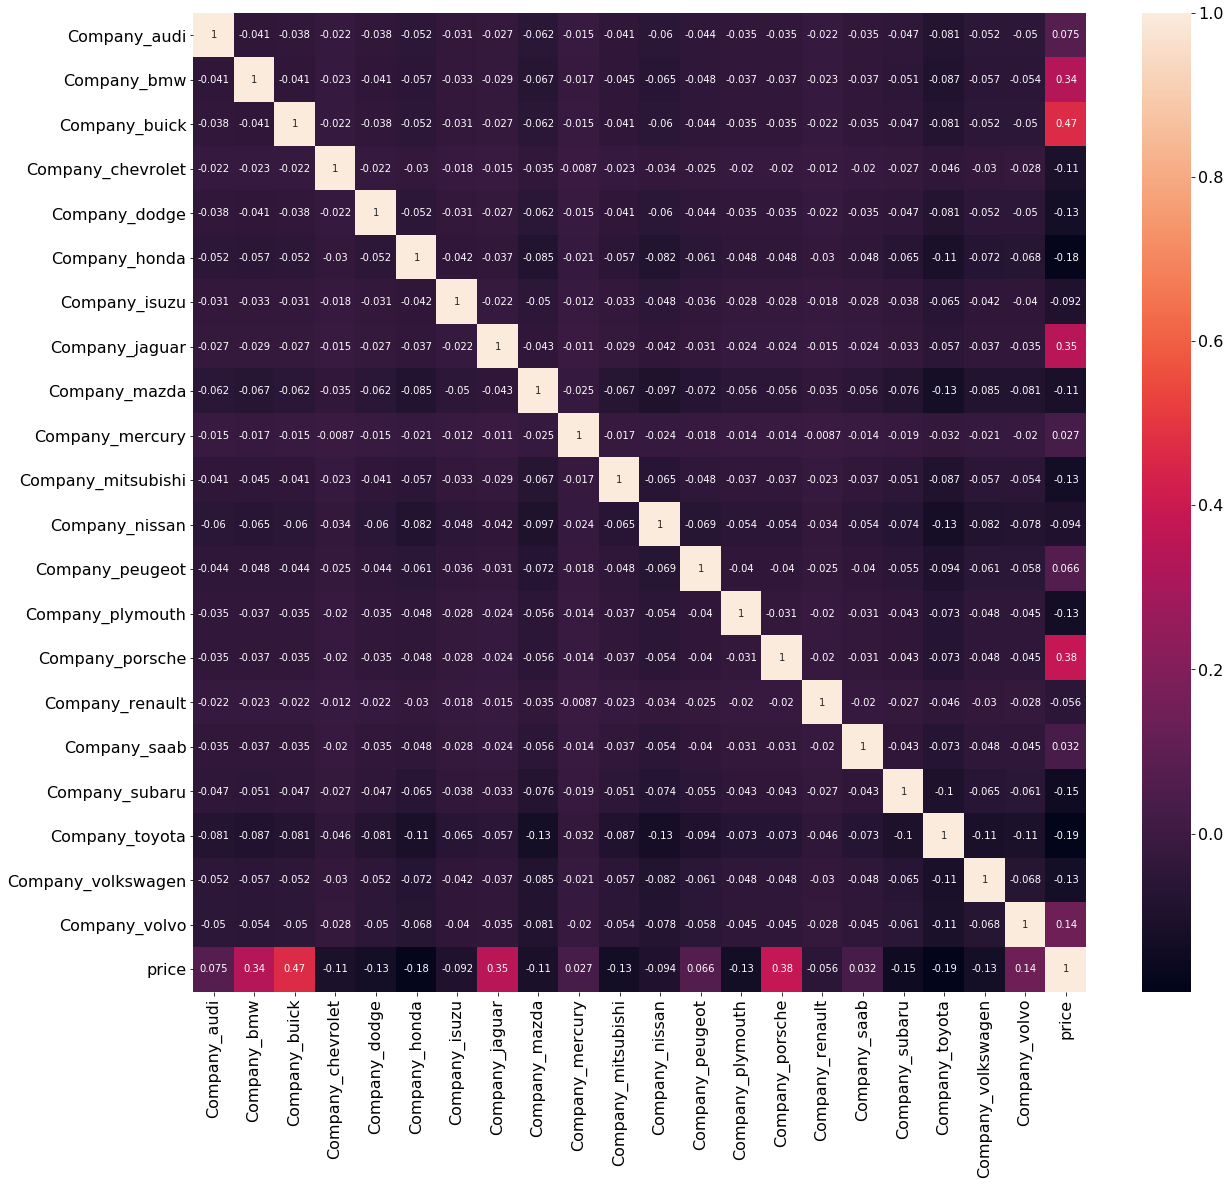

In [3020]:

plt.figure(figsize=(20,18))

sns.heatmap(df_train[three_div].corr(),annot=True)
plt.tick_params(axis='both',labelsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
#plt.legend(prop={"size":20})
#plt.set_xaxis()
#plt.savefig('total.png',bbox_inch='tight')

- price has high correlation with Company_bmw,Company_buick,Company_porsche,Company_toyota

In [3021]:
#df_train.drop(columns=['Company_renault','Company_saab','Company_volkswagen'],axis=1)
#df_train.drop(columns=['Company_mercury'],axis=1)

In [3022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
fueltype_gas           205 non-null int32
aspiration_turbo       205 non-null int32
doornumber_two         205 non-null int32
enginloc_rear          205 non-null int32
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
symboling_-1           205 non-null uint8
symboling_0            205 non-null uint8
symboling_1            205 non-null uin

In [3023]:
#Creating x and y train dataframes
y_train=df_train.pop('price')
X_train=df_train
X_train_sm=sm.add_constant(X_train)

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3024]:
#creating linear regression model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     52.57
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.47e-56
Time:                        20:59:21   Log-Likelihood:                 311.69
No. Observations:                 164   AIC:                            -501.4
Df Residuals:                     103   BIC:                            -312.3
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0426      0.094      0.452      0.653      -0.144       0.230
fueltype_gas           -0.1606      0.065     -2.453      0.016      -0.290      -0.031
aspiration_turbo        0.0359      0.027      1.319      0.190      -0.018       0.090
doornumber_two          0.0026      0.015      0.170      0.865      -0.027       0.033
enginloc_rear           0.2146      0.055      3.934      0.000       0.106       0.323
wheelbase               0.2012      0.083      2.421      0.017       0.036       0.366
carlength              -0.3404      0.101     -3.371      0.001      -0.541      -0.140
carwidth                0.2177      0.081      2.697      0.008       0.058       0.378
carheight              -0.0563      0.049     -1.142      0.256      -0.154       0.041
curbweight              0.4568      0.170      2.691      0.008       0.120       0.794
enginesize              0.8525      0.169      5.058      0.000       0.518       1.187
boreratio              -0.1781      0.065     -2.726      0.008      -0.308      -0.049
stroke                  0.0262      0.064      0.410      0.683      -0.101       0.153
compressionratio       -0.4251      0.188     -2.263      0.026      -0.798      -0.053
horsepower             -0.0907      0.108     -0.836      0.405      -0.306       0.124
peakrpm                 0.0951      0.042      2.280      0.025       0.012       0.178
citympg                -0.0104      0.148     -0.071      0.944      -0.304       0.283
highwaympg              0.1127      0.133      0.847      0.399      -0.151       0.377
symboling_-1            0.0322      0.035      0.924      0.358      -0.037       0.101
symboling_0             0.0613      0.042      1.448      0.151      -0.023       0.145
symboling_1             0.0516      0.043      1.194      0.235      -0.034       0.137
symboling_2             0.0353      0.044      0.794      0.429      -0.053       0.123
symboling_3             0.0261      0.049      0.535      0.594      -0.071       0.123
carbody_hardtop        -0.0577      0.040     -1.441      0.153      -0.137       0.022
carbody_hatchback      -0.0612      0.031     -1.958      0.053      -0.123       0.001
carbody_sedan          -0.0349      0.035     -0.993      0.323      -0.105       0.035
carbody_wagon          -0.0537      0.037     -1.443      0.152      -0.128       0.020
drivewheel_fwd         -0.0111      0.026     -0.423      0.674      -0.063       0.041
drivewheel_rwd          0.0148      0.035      0.423      0.673      -0.055       0.084
enginetype_l            0.0967      0.076      1.274      0.206      -0.054       0.247
enginetype_ohc         -0.0377      0.034     -1.119      0.266      -0.104       0.029
enginetype_ohcf         0.0782      0.028      2.830      0.006       0.023       0.133
eng

In [3025]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
36,cylindernumber_two,inf
32,enginetype_rotor,inf
59,Company_subaru,inf
3,enginloc_rear,inf
30,enginetype_ohcf,inf
0,fueltype_gas,889.54
39,fuelsystem_idi,297.59
12,compressionratio,158.96
8,curbweight,94.03
15,citympg,57.76


In [3026]:
#Getting columns in RFE
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)
rfe_rank=list(zip(X_train.columns,rfe.support_,rfe.ranking_))


##  Model 1
##### Model creation using features suggested by  RFE

In [3027]:
#drop_col=['Company_mercury','highwaympg','stroke','drivewheel_fwd','enginetype_ohc','cylindernumber_six',
#         'fuelsystem_2bbl','fuelsystem_mpfi','fuelsystem_spdi','Company_buick','Company_audi','Company_volvo']
### Model 1
model_list=[rfe_rank[i][0]  for i in range(0,len(rfe_rank)) ]
print(model_list)
X=X_train[model_list]

['fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'enginloc_rear', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'Company_audi', 'Company_bmw', 'Company_buick', 'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu', 'Company_jaguar', 'Company_mazda', 'Company_mercury', 'Company_mitsubishi', 'Company_nissan', 'Company_peugeot', 'Company_plymouth', 'Company_porsche', 'Company_renault', 'Co

In [3028]:
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     52.57
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.47e-56
Time:                        20:59:24   Log-Likelihood:                 311.69
No. Observations:                 164   AIC:                            -501.4
Df Residuals:                     103   BIC:                            -312.3
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0426      0.094      0.452      0.653      -0.144       0.230
fueltype_gas           -0.1606      0.065     -2.453      0.016      -0.290      -0.031
aspiration_turbo        0.0359      0.027      1.319      0.190      -0.018       0.090
doornumber_two          0.0026      0.015      0.170      0.865      -0.027       0.033
enginloc_rear           0.2146      0.055      3.934      0.000       0.106       0.323
wheelbase               0.2012      0.083      2.421      0.017       0.036       0.366
carlength              -0.3404      0.101     -3.371      0.001      -0.541      -0.140
carwidth                0.2177      0.081      2.697      0.008       0.058       0.378
carheight              -0.0563      0.049     -1.142      0.256      -0.154       0.041
curbweight              0.4568      0.170      2.691      0.008       0.120       0.794
enginesize              0.8525      0.169      5.058      0.000       0.518       1.187
boreratio              -0.1781      0.065     -2.726      0.008      -0.308      -0.049
stroke                  0.0262      0.064      0.410      0.683      -0.101       0.153
compressionratio       -0.4251      0.188     -2.263      0.026      -0.798      -0.053
horsepower             -0.0907      0.108     -0.836      0.405      -0.306       0.124
peakrpm                 0.0951      0.042      2.280      0.025       0.012       0.178
citympg                -0.0104      0.148     -0.071      0.944      -0.304       0.283
highwaympg              0.1127      0.133      0.847      0.399      -0.151       0.377
symboling_-1            0.0322      0.035      0.924      0.358      -0.037       0.101
symboling_0             0.0613      0.042      1.448      0.151      -0.023       0.145
symboling_1             0.0516      0.043      1.194      0.235      -0.034       0.137
symboling_2             0.0353      0.044      0.794      0.429      -0.053       0.123
symboling_3             0.0261      0.049      0.535      0.594      -0.071       0.123
carbody_hardtop        -0.0577      0.040     -1.441      0.153      -0.137       0.022
carbody_hatchback      -0.0612      0.031     -1.958      0.053      -0.123       0.001
carbody_sedan          -0.0349      0.035     -0.993      0.323      -0.105       0.035
carbody_wagon          -0.0537      0.037     -1.443      0.152      -0.128       0.020
drivewheel_fwd         -0.0111      0.026     -0.423      0.674      -0.063       0.041
drivewheel_rwd          0.0148      0.035      0.423      0.673      -0.055       0.084
enginetype_l            0.0967      0.076      1.274      0.206      -0.054       0.247
enginetype_ohc         -0.0377      0.034     -1.119      0.266      -0.104       0.029
enginetype_ohcf         0.0782      0.028      2.830      0.006       0.023       0.133
eng

In [3029]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
36,cylindernumber_two,inf
32,enginetype_rotor,inf
59,Company_subaru,inf
3,enginloc_rear,inf
30,enginetype_ohcf,inf
0,fueltype_gas,889.54
39,fuelsystem_idi,297.59
12,compressionratio,158.96
8,curbweight,94.03
15,citympg,57.76


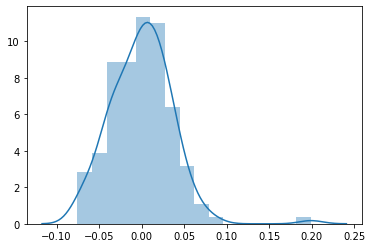

In [3030]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

##### Removing high probability variable/columns
Variables are removed by inspecting the following:
- For very high probability variables, VIF is not inspected
- For medium range of probability, VIF is also inspected
- If any variables probability goes much higher range due to above steps, Variable is removed
- Once probabilty is low for all the variables, VIF is inspected
- If VIF is high, it is removed and impact is assessed for any high probability and steps above are repeated
- For  inf values of VIF, correlation is calculated with other inf features.  for high correlation, one of the features is removed and againa ll the values are assessed
- After each model change r2_score was calculated and best model with 5% acceptance is chosen(model18)

In [3031]:
remove_list=['doornumber_two','citympg','cylindernumber_six','fuelsystem_4bbl','Company_volvo']
for i in remove_list:
    model_list.remove(i)
X=X_train[model_list]

In [3032]:
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     60.09
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.03e-61
Time:                        20:59:26   Log-Likelihood:                 311.63
No. Observations:                 164   AIC:                            -511.3
Df Residuals:                     108   BIC:                            -337.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0434      0.089      0.486      0.628      -0.134       0.221
fueltype_gas           -0.1641      0.056     -2.926      0.004      -0.275      -0.053
aspiration_turbo        0.0378      0.024      1.545      0.125      -0.011       0.086
enginloc_rear           0.2166      0.045      4.790      0.000       0.127       0.306
wheelbase               0.2029      0.080      2.521      0.013       0.043       0.362
carlength              -0.3413      0.098     -3.474      0.001      -0.536      -0.147
carwidth                0.2169      0.077      2.819      0.006       0.064       0.369
carheight              -0.0557      0.047     -1.174      0.243      -0.150       0.038
curbweight              0.4578      0.160      2.869      0.005       0.142       0.774
enginesize              0.8627      0.155      5.564      0.000       0.555       1.170
boreratio              -0.1736      0.059     -2.956      0.004      -0.290      -0.057
stroke                  0.0211      0.059      0.357      0.722      -0.096       0.138
compressionratio       -0.4326      0.175     -2.475      0.015      -0.779      -0.086
horsepower             -0.0949      0.102     -0.934      0.353      -0.297       0.107
peakrpm                 0.1005      0.036      2.820      0.006       0.030       0.171
highwaympg              0.1084      0.063      1.726      0.087      -0.016       0.233
symboling_-1            0.0306      0.033      0.934      0.352      -0.034       0.096
symboling_0             0.0579      0.038      1.526      0.130      -0.017       0.133
symboling_1             0.0496      0.040      1.254      0.212      -0.029       0.128
symboling_2             0.0333      0.040      0.825      0.411      -0.047       0.113
symboling_3             0.0241      0.045      0.536      0.593      -0.065       0.113
carbody_hardtop        -0.0572      0.038     -1.486      0.140      -0.133       0.019
carbody_hatchback      -0.0602      0.029     -2.072      0.041      -0.118      -0.003
carbody_sedan          -0.0353      0.032     -1.107      0.271      -0.099       0.028
carbody_wagon          -0.0541      0.035     -1.562      0.121      -0.123       0.015
drivewheel_fwd         -0.0115      0.025     -0.460      0.646      -0.061       0.038
drivewheel_rwd          0.0154      0.033      0.465      0.643      -0.050       0.081
enginetype_l            0.1008      0.072      1.403      0.164      -0.042       0.243
enginetype_ohc         -0.0336      0.028     -1.196      0.234      -0.089       0.022
enginetype_ohcf         0.0771      0.025      3.101      0.002       0.028       0.126
enginetype_ohcv        -0.0998      0.033     -3.007      0.003      -0.166      -0.034
enginetype_rotor        0.1332      0.030      4.421      0.000       0.073       0.193
cyl

In [3033]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
55,Company_subaru,inf
2,enginloc_rear,inf
28,enginetype_ohcf,inf
30,enginetype_rotor,inf
33,cylindernumber_two,inf
0,fueltype_gas,708.73
35,fuelsystem_idi,290.13
11,compressionratio,144.20
7,curbweight,87.00
8,enginesize,49.89


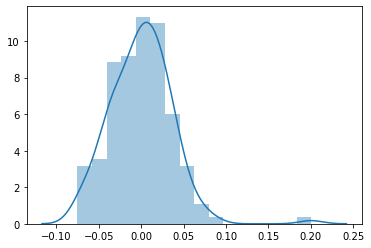

In [3034]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

##### Removing next level of high probablility variables

In [3035]:
model_list.remove('symboling_3')
model_list.remove('drivewheel_rwd')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model5=lr.fit()
lr_model5.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     63.15
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.27e-62
Time:                        20:59:28   Log-Likelihood:                 311.18
No. Observations:                 164   AIC:                            -514.4
Df Residuals:                     110   BIC:                            -347.0
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0704      0.080      0.882      0.380      -0.088       0.228
fueltype_gas           -0.1514      0.053     -2.868      0.005      -0.256      -0.047
aspiration_turbo        0.0368      0.024      1.555      0.123      -0.010       0.084
enginloc_rear           0.2163      0.045      4.845      0.000       0.128       0.305
wheelbase               0.2030      0.078      2.615      0.010       0.049       0.357
carlength              -0.3399      0.097     -3.506      0.001      -0.532      -0.148
carwidth                0.2146      0.076      2.834      0.005       0.065       0.365
carheight              -0.0687      0.044     -1.563      0.121      -0.156       0.018
curbweight              0.4576      0.158      2.891      0.005       0.144       0.771
enginesize              0.8654      0.151      5.747      0.000       0.567       1.164
boreratio              -0.1709      0.057     -3.004      0.003      -0.284      -0.058
stroke                  0.0206      0.058      0.354      0.724      -0.095       0.136
compressionratio       -0.4319      0.170     -2.547      0.012      -0.768      -0.096
horsepower             -0.0962      0.096     -1.006      0.317      -0.286       0.093
peakrpm                 0.1025      0.035      2.909      0.004       0.033       0.172
highwaympg              0.1079      0.062      1.738      0.085      -0.015       0.231
symboling_-1            0.0171      0.024      0.713      0.477      -0.030       0.065
symboling_0             0.0387      0.021      1.858      0.066      -0.003       0.080
symboling_1             0.0306      0.019      1.586      0.116      -0.008       0.069
symboling_2             0.0142      0.019      0.733      0.465      -0.024       0.053
carbody_hardtop        -0.0582      0.038     -1.523      0.131      -0.134       0.018
carbody_hatchback      -0.0642      0.028     -2.274      0.025      -0.120      -0.008
carbody_sedan          -0.0403      0.031     -1.314      0.192      -0.101       0.021
carbody_wagon          -0.0566      0.034     -1.660      0.100      -0.124       0.011
drivewheel_fwd         -0.0207      0.017     -1.238      0.219      -0.054       0.012
enginetype_l            0.1009      0.071      1.419      0.159      -0.040       0.242
enginetype_ohc         -0.0354      0.027     -1.293      0.199      -0.090       0.019
enginetype_ohcf         0.0743      0.024      3.110      0.002       0.027       0.122
enginetype_ohcv        -0.1011      0.033     -3.072      0.003      -0.166      -0.036
enginetype_rotor        0.1331      0.029      4.520      0.000       0.075       0.191
cylindernumber_five    -0.0635      0.038     -1.688      0.094      -0.138       0.011
cylindernumber_four     0.0600      0.035      1.701      0.092      -0.010       0.130
cyl

In [3036]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
28,enginetype_rotor,inf
26,enginetype_ohcf,inf
2,enginloc_rear,inf
53,Company_subaru,inf
31,cylindernumber_two,inf
0,fueltype_gas,499.90
33,fuelsystem_idi,254.95
11,compressionratio,137.35
7,curbweight,86.73
8,enginesize,47.68


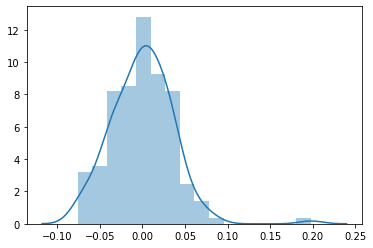

In [3037]:
y_train_pred=lr_model5.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3038]:
model_list5=model_list.copy()

##### Next higher probability variables

In [3039]:
model_list.remove('stroke')
model_list.remove('fuelsystem_spdi')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     66.53
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.41e-64
Time:                        20:59:29   Log-Likelihood:                 310.83
No. Observations:                 164   AIC:                            -517.7
Df Residuals:                     112   BIC:                            -356.5
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0889      0.071      1.244      0.216      -0.053       0.230
fueltype_gas           -0.1466      0.051     -2.854      0.005      -0.248      -0.045
aspiration_turbo        0.0366      0.023      1.557      0.122      -0.010       0.083
enginloc_rear           0.2149      0.044      4.858      0.000       0.127       0.303
wheelbase               0.2003      0.077      2.602      0.011       0.048       0.353
carlength              -0.3307      0.094     -3.521      0.001      -0.517      -0.145
carwidth                0.2108      0.075      2.815      0.006       0.062       0.359
carheight              -0.0684      0.044     -1.572      0.119      -0.155       0.018
curbweight              0.4490      0.155      2.897      0.005       0.142       0.756
enginesize              0.8522      0.148      5.757      0.000       0.559       1.146
boreratio              -0.1638      0.052     -3.172      0.002      -0.266      -0.061
compressionratio       -0.4519      0.164     -2.753      0.007      -0.777      -0.127
horsepower             -0.0823      0.092     -0.892      0.374      -0.265       0.101
peakrpm                 0.0986      0.034      2.893      0.005       0.031       0.166
highwaympg              0.1028      0.061      1.682      0.095      -0.018       0.224
symboling_-1            0.0172      0.024      0.724      0.471      -0.030       0.064
symboling_0             0.0391      0.021      1.892      0.061      -0.002       0.080
symboling_1             0.0328      0.019      1.737      0.085      -0.005       0.070
symboling_2             0.0151      0.019      0.794      0.429      -0.023       0.053
carbody_hardtop        -0.0589      0.038     -1.552      0.124      -0.134       0.016
carbody_hatchback      -0.0643      0.028     -2.292      0.024      -0.120      -0.009
carbody_sedan          -0.0409      0.030     -1.346      0.181      -0.101       0.019
carbody_wagon          -0.0572      0.034     -1.694      0.093      -0.124       0.010
drivewheel_fwd         -0.0188      0.016     -1.147      0.254      -0.051       0.014
enginetype_l            0.1057      0.070      1.505      0.135      -0.033       0.245
enginetype_ohc         -0.0320      0.026     -1.210      0.229      -0.084       0.020
enginetype_ohcf         0.0728      0.023      3.194      0.002       0.028       0.118
enginetype_ohcv        -0.1034      0.032     -3.231      0.002      -0.167      -0.040
enginetype_rotor        0.1279      0.028      4.531      0.000       0.072       0.184
cylindernumber_five    -0.0683      0.036     -1.908      0.059      -0.139       0.003
cylindernumber_four     0.0563      0.032      1.750      0.083      -0.007       0.120
cylindernumber_two      0.1279      0.028      4.531      0.000       0.072       0.184
fue

In [3040]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
27,enginetype_rotor,inf
25,enginetype_ohcf,inf
2,enginloc_rear,inf
51,Company_subaru,inf
30,cylindernumber_two,inf
0,fueltype_gas,398.52
32,fuelsystem_idi,218.31
10,compressionratio,130.62
7,curbweight,84.33
8,enginesize,46.71


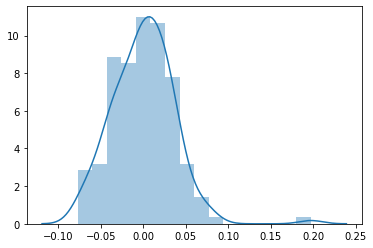

In [3041]:
#print(X_train_sm.columns)
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3042]:
model_list.remove('horsepower')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     67.97
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.28e-65
Time:                        20:59:31   Log-Likelihood:                 310.25
No. Observations:                 164   AIC:                            -518.5
Df Residuals:                     113   BIC:                            -360.4
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0877      0.071      1.228      0.222      -0.054       0.229
fueltype_gas           -0.1355      0.050     -2.722      0.008      -0.234      -0.037
aspiration_turbo        0.0238      0.019      1.280      0.203      -0.013       0.061
enginloc_rear           0.2078      0.043      4.780      0.000       0.122       0.294
wheelbase               0.2037      0.077      2.652      0.009       0.052       0.356
carlength              -0.3201      0.093     -3.440      0.001      -0.504      -0.136
carwidth                0.2114      0.075      2.826      0.006       0.063       0.360
carheight              -0.0654      0.043     -1.509      0.134      -0.151       0.020
curbweight              0.4034      0.146      2.760      0.007       0.114       0.693
enginesize              0.7705      0.116      6.636      0.000       0.540       1.001
boreratio              -0.1562      0.051     -3.070      0.003      -0.257      -0.055
compressionratio       -0.4140      0.158     -2.613      0.010      -0.728      -0.100
peakrpm                 0.0843      0.030      2.806      0.006       0.025       0.144
highwaympg              0.0959      0.061      1.583      0.116      -0.024       0.216
symboling_-1            0.0164      0.024      0.691      0.491      -0.031       0.063
symboling_0             0.0395      0.021      1.913      0.058      -0.001       0.080
symboling_1             0.0328      0.019      1.740      0.085      -0.005       0.070
symboling_2             0.0147      0.019      0.775      0.440      -0.023       0.052
carbody_hardtop        -0.0622      0.038     -1.650      0.102      -0.137       0.012
carbody_hatchback      -0.0701      0.027     -2.572      0.011      -0.124      -0.016
carbody_sedan          -0.0471      0.030     -1.594      0.114      -0.106       0.011
carbody_wagon          -0.0624      0.033     -1.878      0.063      -0.128       0.003
drivewheel_fwd         -0.0185      0.016     -1.134      0.259      -0.051       0.014
enginetype_l            0.1132      0.070      1.624      0.107      -0.025       0.251
enginetype_ohc         -0.0241      0.025     -0.967      0.335      -0.073       0.025
enginetype_ohcf         0.0713      0.023      3.140      0.002       0.026       0.116
enginetype_ohcv        -0.0973      0.031     -3.115      0.002      -0.159      -0.035
enginetype_rotor        0.1211      0.027      4.460      0.000       0.067       0.175
cylindernumber_five    -0.0686      0.036     -1.919      0.057      -0.139       0.002
cylindernumber_four     0.0542      0.032      1.693      0.093      -0.009       0.118
cylindernumber_two      0.1211      0.027      4.460      0.000       0.067       0.175
fuelsystem_2bbl         0.0486      0.023      2.154      0.033       0.004       0.093
fue

In [3043]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,enginetype_rotor,inf
24,enginetype_ohcf,inf
2,enginloc_rear,inf
50,Company_subaru,inf
29,cylindernumber_two,inf
0,fueltype_gas,389.16
31,fuelsystem_idi,216.57
10,compressionratio,121.85
7,curbweight,75.16
4,carlength,29.48


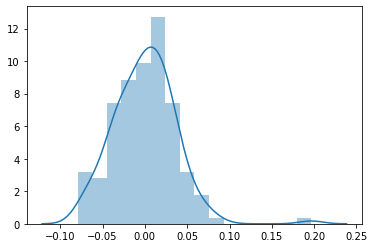

In [3044]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3045]:
remove_list=['symboling_-1','symboling_2','Company_audi','enginetype_ohc']
for i in remove_list:
    model_list.remove(i)
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     74.20
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.23e-68
Time:                        20:59:32   Log-Likelihood:                 307.84
No. Observations:                 164   AIC:                            -521.7
Df Residuals:                     117   BIC:                            -376.0
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0966      0.067      1.438      0.153      -0.036       0.230
fueltype_gas           -0.1316      0.049     -2.701      0.008      -0.228      -0.035
aspiration_turbo        0.0254      0.018      1.420      0.158      -0.010       0.061
enginloc_rear           0.1967      0.041      4.766      0.000       0.115       0.278
wheelbase               0.2029      0.069      2.935      0.004       0.066       0.340
carlength              -0.2978      0.089     -3.356      0.001      -0.473      -0.122
carwidth                0.2071      0.071      2.929      0.004       0.067       0.347
carheight              -0.0649      0.043     -1.511      0.133      -0.150       0.020
curbweight              0.3518      0.142      2.483      0.014       0.071       0.632
enginesize              0.7849      0.115      6.852      0.000       0.558       1.012
boreratio              -0.1576      0.047     -3.322      0.001      -0.252      -0.064
compressionratio       -0.4096      0.151     -2.710      0.008      -0.709      -0.110
peakrpm                 0.0938      0.028      3.297      0.001       0.037       0.150
highwaympg              0.0969      0.058      1.660      0.100      -0.019       0.213
symboling_0             0.0232      0.014      1.668      0.098      -0.004       0.051
symboling_1             0.0185      0.013      1.404      0.163      -0.008       0.045
carbody_hardtop        -0.0624      0.036     -1.721      0.088      -0.134       0.009
carbody_hatchback      -0.0746      0.026     -2.825      0.006      -0.127      -0.022
carbody_sedan          -0.0501      0.028     -1.773      0.079      -0.106       0.006
carbody_wagon          -0.0627      0.032     -1.958      0.053      -0.126       0.001
drivewheel_fwd         -0.0170      0.016     -1.077      0.284      -0.048       0.014
enginetype_l            0.1368      0.066      2.082      0.040       0.007       0.267
enginetype_ohcf         0.0771      0.021      3.735      0.000       0.036       0.118
enginetype_ohcv        -0.0821      0.028     -2.973      0.004      -0.137      -0.027
enginetype_rotor        0.1176      0.026      4.442      0.000       0.065       0.170
cylindernumber_five    -0.0547      0.028     -1.941      0.055      -0.110       0.001
cylindernumber_four     0.0372      0.026      1.410      0.161      -0.015       0.089
cylindernumber_two      0.1176      0.026      4.442      0.000       0.065       0.170
fuelsystem_2bbl         0.0480      0.022      2.134      0.035       0.003       0.093
fuelsystem_idi          0.2282      0.095      2.395      0.018       0.039       0.417
fuelsystem_mpfi         0.0360      0.025      1.447      0.150      -0.013       0.085
Company_bmw             0.1391      0.028      4.962      0.000       0.084       0.195
Com

In [3046]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
46,Company_subaru,inf
2,enginloc_rear,inf
26,cylindernumber_two,inf
23,enginetype_rotor,inf
21,enginetype_ohcf,inf
0,fueltype_gas,363.56
28,fuelsystem_idi,193.46
10,compressionratio,111.50
7,curbweight,70.94
8,enginesize,28.17


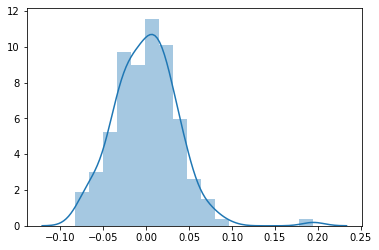

In [3047]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3048]:
remove_list=['Company_porsche','fuelsystem_mpfi','cylindernumber_four']
for i in remove_list:
    model_list.remove(i)
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     77.29
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.16e-69
Time:                        20:59:34   Log-Likelihood:                 303.73
No. Observations:                 164   AIC:                            -519.5
Df Residuals:                     120   BIC:                            -383.1
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1137      0.066      1.719      0.088      -0.017       0.245
fueltype_gas           -0.0823      0.044     -1.870      0.064      -0.169       0.005
aspiration_turbo        0.0193      0.016      1.181      0.240      -0.013       0.052
enginloc_rear           0.2221      0.029      7.531      0.000       0.164       0.280
wheelbase               0.1651      0.066      2.498      0.014       0.034       0.296
carlength              -0.3035      0.078     -3.878      0.000      -0.458      -0.149
carwidth                0.2502      0.067      3.733      0.000       0.118       0.383
carheight              -0.0669      0.042     -1.596      0.113      -0.150       0.016
curbweight              0.3120      0.123      2.544      0.012       0.069       0.555
enginesize              0.7262      0.111      6.516      0.000       0.506       0.947
boreratio              -0.1008      0.037     -2.756      0.007      -0.173      -0.028
compressionratio       -0.3418      0.149     -2.290      0.024      -0.637      -0.046
peakrpm                 0.0896      0.029      3.126      0.002       0.033       0.146
highwaympg              0.0723      0.058      1.244      0.216      -0.043       0.187
symboling_0             0.0258      0.013      1.925      0.057      -0.001       0.052
symboling_1             0.0191      0.013      1.482      0.141      -0.006       0.045
carbody_hardtop        -0.0572      0.036     -1.575      0.118      -0.129       0.015
carbody_hatchback      -0.0681      0.025     -2.698      0.008      -0.118      -0.018
carbody_sedan          -0.0425      0.027     -1.578      0.117      -0.096       0.011
carbody_wagon          -0.0528      0.031     -1.708      0.090      -0.114       0.008
drivewheel_fwd         -0.0163      0.016     -1.028      0.306      -0.048       0.015
enginetype_l            0.1388      0.066      2.107      0.037       0.008       0.269
enginetype_ohcf         0.0767      0.017      4.479      0.000       0.043       0.111
enginetype_ohcv        -0.0972      0.026     -3.787      0.000      -0.148      -0.046
enginetype_rotor        0.0801      0.020      3.955      0.000       0.040       0.120
cylindernumber_five    -0.0835      0.023     -3.566      0.001      -0.130      -0.037
cylindernumber_two      0.0801      0.020      3.955      0.000       0.040       0.120
fuelsystem_2bbl         0.0191      0.015      1.295      0.198      -0.010       0.048
fuelsystem_idi          0.1960      0.095      2.054      0.042       0.007       0.385
Company_bmw             0.1232      0.026      4.671      0.000       0.071       0.175
Company_buick           0.1080      0.030      3.550      0.001       0.048       0.168
Company_chevrolet      -0.1214      0.051     -2.383      0.019      -0.222      -0.021
Com

In [3049]:
lr_model21=lr.fit()
lr_model21.summary()
model_list21=model_list.copy()

In [3050]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,enginetype_rotor,inf
21,enginetype_ohcf,inf
2,enginloc_rear,inf
43,Company_subaru,inf
25,cylindernumber_two,inf
0,fueltype_gas,266.24
27,fuelsystem_idi,190.41
10,compressionratio,106.10
7,curbweight,51.85
8,enginesize,26.02


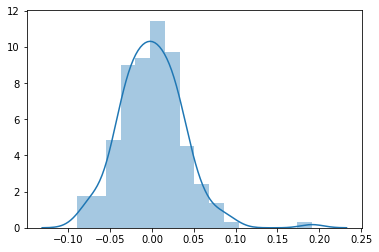

In [3051]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3052]:
#lr_model3=lr_model

In [3053]:
model_list.remove('fueltype_gas')
model_list.remove('fuelsystem_idi')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     76.88
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.09e-69
Time:                        20:59:35   Log-Likelihood:                 300.79
No. Observations:                 164   AIC:                            -515.6
Df Residuals:                     121   BIC:                            -382.3
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0016      0.058      0.027      0.979      -0.114       0.117
aspiration_turbo        0.0354      0.015      2.413      0.017       0.006       0.064
enginloc_rear           0.2190      0.030      7.335      0.000       0.160       0.278
wheelbase               0.1700      0.067      2.540      0.012       0.037       0.303
carlength              -0.3131      0.079     -3.953      0.000      -0.470      -0.156
carwidth                0.2278      0.067      3.396      0.001       0.095       0.361
carheight              -0.0577      0.042     -1.365      0.175      -0.141       0.026
curbweight              0.3477      0.123      2.824      0.006       0.104       0.591
enginesize              0.7184      0.113      6.361      0.000       0.495       0.942
boreratio              -0.1014      0.037     -2.735      0.007      -0.175      -0.028
compressionratio       -0.0340      0.026     -1.329      0.186      -0.085       0.017
peakrpm                 0.0720      0.028      2.591      0.011       0.017       0.127
highwaympg              0.0621      0.059      1.057      0.292      -0.054       0.178
symboling_0             0.0326      0.013      2.478      0.015       0.007       0.059
symboling_1             0.0223      0.013      1.718      0.088      -0.003       0.048
carbody_hardtop        -0.0562      0.037     -1.527      0.129      -0.129       0.017
carbody_hatchback      -0.0700      0.026     -2.736      0.007      -0.121      -0.019
carbody_sedan          -0.0465      0.027     -1.707      0.090      -0.100       0.007
carbody_wagon          -0.0607      0.031     -1.953      0.053      -0.122       0.001
drivewheel_fwd         -0.0132      0.016     -0.821      0.413      -0.045       0.019
enginetype_l            0.1398      0.067      2.094      0.038       0.008       0.272
enginetype_ohcf         0.0763      0.017      4.396      0.000       0.042       0.111
enginetype_ohcv        -0.1046      0.026     -4.060      0.000      -0.156      -0.054
enginetype_rotor        0.0774      0.020      3.779      0.000       0.037       0.118
cylindernumber_five    -0.0711      0.023     -3.095      0.002      -0.117      -0.026
cylindernumber_two      0.0774      0.020      3.779      0.000       0.037       0.118
fuelsystem_2bbl         0.0124      0.015      0.849      0.398      -0.017       0.041
Company_bmw             0.1286      0.027      4.831      0.000       0.076       0.181
Company_buick           0.1158      0.031      3.782      0.000       0.055       0.176
Company_chevrolet      -0.1205      0.052     -2.334      0.021      -0.223      -0.018
Company_dodge          -0.1339      0.029     -4.564      0.000      -0.192      -0.076
Company_honda          -0.1120      0.026     -4.259      0.000      -0.164      -0.060
Com

In [3054]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
22,enginetype_rotor,inf
24,cylindernumber_two,inf
41,Company_subaru,inf
1,enginloc_rear,inf
20,enginetype_ohcf,inf
6,curbweight,242.60
3,carlength,156.58
7,enginesize,92.35
4,carwidth,91.67
2,wheelbase,73.88


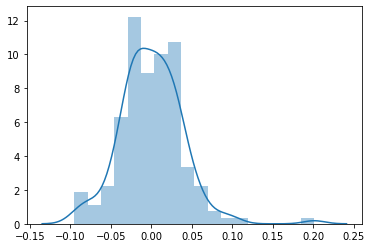

In [3055]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3056]:
model_list.remove('drivewheel_fwd')
model_list.remove('highwaympg')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     80.89
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.09e-71
Time:                        20:59:37   Log-Likelihood:                 299.65
No. Observations:                 164   AIC:                            -517.3
Df Residuals:                     123   BIC:                            -390.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0322      0.043      0.743      0.459      -0.053       0.118
aspiration_turbo        0.0298      0.014      2.132      0.035       0.002       0.057
enginloc_rear           0.2200      0.030      7.445      0.000       0.162       0.279
wheelbase               0.1693      0.067      2.534      0.013       0.037       0.301
carlength              -0.3392      0.076     -4.440      0.000      -0.490      -0.188
carwidth                0.2286      0.061      3.742      0.000       0.108       0.350
carheight              -0.0647      0.042     -1.554      0.123      -0.147       0.018
curbweight              0.3636      0.100      3.623      0.000       0.165       0.562
enginesize              0.6891      0.110      6.263      0.000       0.471       0.907
boreratio              -0.0970      0.037     -2.636      0.009      -0.170      -0.024
compressionratio       -0.0178      0.021     -0.837      0.404      -0.060       0.024
peakrpm                 0.0680      0.027      2.560      0.012       0.015       0.121
symboling_0             0.0315      0.013      2.455      0.015       0.006       0.057
symboling_1             0.0222      0.013      1.711      0.090      -0.003       0.048
carbody_hardtop        -0.0483      0.036     -1.346      0.181      -0.119       0.023
carbody_hatchback      -0.0649      0.025     -2.570      0.011      -0.115      -0.015
carbody_sedan          -0.0402      0.027     -1.499      0.136      -0.093       0.013
carbody_wagon          -0.0541      0.031     -1.767      0.080      -0.115       0.007
enginetype_l            0.1495      0.066      2.267      0.025       0.019       0.280
enginetype_ohcf         0.0720      0.017      4.234      0.000       0.038       0.106
enginetype_ohcv        -0.1094      0.025     -4.306      0.000      -0.160      -0.059
enginetype_rotor        0.0717      0.020      3.646      0.000       0.033       0.111
cylindernumber_five    -0.0802      0.022     -3.675      0.000      -0.123      -0.037
cylindernumber_two      0.0717      0.020      3.646      0.000       0.033       0.111
fuelsystem_2bbl         0.0147      0.014      1.016      0.311      -0.014       0.043
Company_bmw             0.1306      0.026      4.954      0.000       0.078       0.183
Company_buick           0.1185      0.030      3.887      0.000       0.058       0.179
Company_chevrolet      -0.1194      0.051     -2.363      0.020      -0.219      -0.019
Company_dodge          -0.1430      0.027     -5.263      0.000      -0.197      -0.089
Company_honda          -0.1172      0.025     -4.666      0.000      -0.167      -0.067
Company_isuzu          -0.0844      0.031     -2.711      0.008      -0.146      -0.023
Company_jaguar         -0.1240      0.049     -2.505      0.014      -0.222      -0.026
Com

In [3057]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
18,enginetype_ohcf,inf
22,cylindernumber_two,inf
20,enginetype_rotor,inf
1,enginloc_rear,inf
39,Company_subaru,inf
6,curbweight,177.24
3,carlength,145.66
7,enginesize,87.80
4,carwidth,74.38
2,wheelbase,66.64


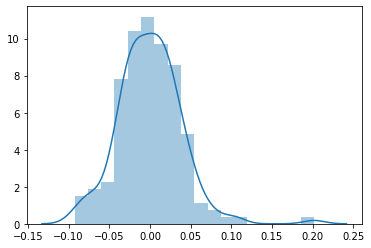

In [3058]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3059]:
model_list1=model_list

In [ ]:
# model_list=['fueltype_gas','enginloc_rear','carlength','carwidth','curbweight','enginesize',
#             'peakrpm','enginetype_l','enginetype_rotor','fuelsystem_idi',
#             'Company_bmw','Company_peugeot','Company_renault','compressionratio','citympg','Company_mitsubishi','symboling_-1','symboling_3']

# X=X_train[model_list]

In [3061]:
model_list.remove('curbweight')
model_list.remove('carlength')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model2=lr.fit()
lr_model2.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     72.67
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.12e-68
Time:                        20:59:39   Log-Likelihood:                 285.91
No. Observations:                 164   AIC:                            -493.8
Df Residuals:                     125   BIC:                            -372.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0035      0.044     -0.079      0.937      -0.090       0.083
aspiration_turbo        0.0497      0.014      3.584      0.000       0.022       0.077
enginloc_rear           0.2115      0.032      6.649      0.000       0.149       0.275
wheelbase               0.0362      0.058      0.621      0.536      -0.079       0.152
carwidth                0.2404      0.065      3.696      0.000       0.112       0.369
carheight              -0.0294      0.044     -0.667      0.506      -0.117       0.058
enginesize              0.8422      0.090      9.336      0.000       0.664       1.021
boreratio              -0.0921      0.039     -2.336      0.021      -0.170      -0.014
compressionratio       -0.0008      0.023     -0.038      0.970      -0.046       0.044
peakrpm                 0.0808      0.029      2.833      0.005       0.024       0.137
symboling_0             0.0277      0.014      2.015      0.046       0.000       0.055
symboling_1             0.0175      0.014      1.261      0.210      -0.010       0.045
carbody_hardtop        -0.0911      0.036     -2.542      0.012      -0.162      -0.020
carbody_hatchback      -0.0690      0.027     -2.559      0.012      -0.122      -0.016
carbody_sedan          -0.0654      0.028     -2.318      0.022      -0.121      -0.010
carbody_wagon          -0.0775      0.032     -2.387      0.018      -0.142      -0.013
enginetype_l            0.1631      0.071      2.295      0.023       0.022       0.304
enginetype_ohcf         0.0741      0.018      4.083      0.000       0.038       0.110
enginetype_ohcv        -0.0940      0.027     -3.463      0.001      -0.148      -0.040
enginetype_rotor        0.0845      0.020      4.226      0.000       0.045       0.124
cylindernumber_five    -0.0735      0.023     -3.146      0.002      -0.120      -0.027
cylindernumber_two      0.0845      0.020      4.226      0.000       0.045       0.124
fuelsystem_2bbl         0.0019      0.015      0.124      0.902      -0.028       0.032
Company_bmw             0.1337      0.028      4.729      0.000       0.078       0.190
Company_buick           0.1419      0.032      4.407      0.000       0.078       0.206
Company_chevrolet      -0.0985      0.054     -1.834      0.069      -0.205       0.008
Company_dodge          -0.1195      0.028     -4.254      0.000      -0.175      -0.064
Company_honda          -0.1071      0.026     -4.113      0.000      -0.159      -0.056
Company_isuzu          -0.0529      0.033     -1.616      0.109      -0.118       0.012
Company_jaguar         -0.0672      0.051     -1.314      0.191      -0.168       0.034
Company_mazda          -0.0809      0.025     -3.294      0.001      -0.130      -0.032
Company_mercury        -0.0764      0.054     -1.411      0.161      -0.184       0.031
Com

In [3062]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
20,cylindernumber_two,inf
1,enginloc_rear,inf
37,Company_subaru,inf
18,enginetype_rotor,inf
16,enginetype_ohcf,inf
3,carwidth,70.61
5,enginesize,49.88
2,wheelbase,48.28
6,boreratio,34.03
4,carheight,32.76


C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


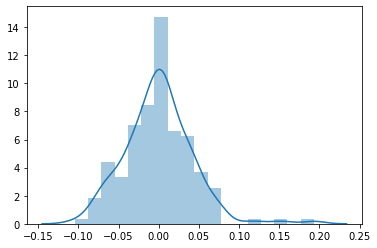

In [3063]:
y_train_pred=lr_model2.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3064]:
remove_list=['wheelbase','carheight','compressionratio','fuelsystem_2bbl','Company_saab']
for i in remove_list:
    model_list.remove(i)
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model10=lr.fit()
lr_model10.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     86.37
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.89e-73
Time:                        20:59:40   Log-Likelihood:                 285.31
No. Observations:                 164   AIC:                            -502.6
Df Residuals:                     130   BIC:                            -397.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0214      0.035     -0.610      0.543      -0.091       0.048
aspiration_turbo        0.0493      0.013      3.932      0.000       0.024       0.074
enginloc_rear           0.2069      0.029      7.044      0.000       0.149       0.265
carwidth                0.2608      0.056      4.635      0.000       0.149       0.372
enginesize              0.8485      0.087      9.777      0.000       0.677       1.020
boreratio              -0.0867      0.038     -2.289      0.024      -0.162      -0.012
peakrpm                 0.0822      0.024      3.378      0.001       0.034       0.130
symboling_0             0.0276      0.013      2.093      0.038       0.002       0.054
symboling_1             0.0193      0.013      1.501      0.136      -0.006       0.045
carbody_hardtop        -0.0923      0.034     -2.677      0.008      -0.161      -0.024
carbody_hatchback      -0.0707      0.025     -2.849      0.005      -0.120      -0.022
carbody_sedan          -0.0664      0.024     -2.722      0.007      -0.115      -0.018
carbody_wagon          -0.0824      0.026     -3.134      0.002      -0.134      -0.030
enginetype_l            0.1614      0.070      2.318      0.022       0.024       0.299
enginetype_ohcf         0.0745      0.017      4.512      0.000       0.042       0.107
enginetype_ohcv        -0.0936      0.026     -3.642      0.000      -0.144      -0.043
enginetype_rotor        0.0887      0.018      4.871      0.000       0.053       0.125
cylindernumber_five    -0.0705      0.022     -3.198      0.002      -0.114      -0.027
cylindernumber_two      0.0887      0.018      4.871      0.000       0.053       0.125
Company_bmw             0.1380      0.027      5.148      0.000       0.085       0.191
Company_buick           0.1426      0.029      4.851      0.000       0.084       0.201
Company_chevrolet      -0.0886      0.052     -1.719      0.088      -0.190       0.013
Company_dodge          -0.1101      0.025     -4.383      0.000      -0.160      -0.060
Company_honda          -0.1024      0.023     -4.458      0.000      -0.148      -0.057
Company_isuzu          -0.0433      0.030     -1.442      0.152      -0.103       0.016
Company_jaguar         -0.0544      0.048     -1.141      0.256      -0.149       0.040
Company_mazda          -0.0772      0.023     -3.360      0.001      -0.123      -0.032
Company_mercury        -0.0757      0.053     -1.440      0.152      -0.180       0.028
Company_mitsubishi     -0.1375      0.023     -5.948      0.000      -0.183      -0.092
Company_nissan         -0.0887      0.021     -4.210      0.000      -0.130      -0.047
Company_peugeot        -0.2328      0.076     -3.082      0.003      -0.382      -0.083
Company_plymouth       -0.1013      0.027     -3.721      0.000      -0.155      -0.047
Com

In [3065]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
17,cylindernumber_two,inf
15,enginetype_rotor,inf
32,Company_subaru,inf
1,enginloc_rear,inf
13,enginetype_ohcf,inf
2,carwidth,56.59
3,enginesize,48.32
4,boreratio,32.93
29,Company_peugeot,20.01
12,enginetype_l,18.94


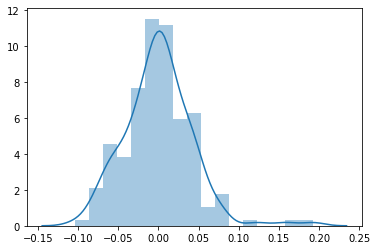

In [3066]:
y_train_pred=lr_model10.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3067]:
#lr_model10=LinearRegression(lr_model2)
model_list10=model_list.copy()

##### Checking correlation to remove inf VIF columns

In [3068]:
corr_list=['cylindernumber_two','enginetype_rotor','Company_subaru','enginloc_rear','enginetype_ohcf']
for i in range(0,len(corr_list)-1):
    for j in range(i+1,len(corr_list)) :
    
        print(corr_list[i],corr_list[j],X_train[corr_list[i]].corr(X_train[corr_list[j]]))

cylindernumber_two enginetype_rotor 1.0
cylindernumber_two Company_subaru -0.03810003810005742
cylindernumber_two enginloc_rear -0.02158329236508589
cylindernumber_two enginetype_ohcf -0.044426165831932055
enginetype_rotor Company_subaru -0.03810003810005742
enginetype_rotor enginloc_rear -0.02158329236508589
enginetype_rotor enginetype_ohcf -0.044426165831932055
Company_subaru enginloc_rear -0.03289297045737758
Company_subaru enginetype_ohcf 0.8576035628236094
enginloc_rear enginetype_ohcf 0.48582388241058794


In [3069]:
#Based on above data following are removed
model_list.remove('enginetype_rotor')
model_list.remove('enginetype_ohcf')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model11=lr.fit()
lr_model11.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     86.37
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.89e-73
Time:                        20:59:42   Log-Likelihood:                 285.31
No. Observations:                 164   AIC:                            -502.6
Df Residuals:                     130   BIC:                            -397.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0214      0.035     -0.610      0.543      -0.091       0.048
aspiration_turbo        0.0493      0.013      3.932      0.000       0.024       0.074
enginloc_rear           0.2813      0.042      6.675      0.000       0.198       0.365
carwidth                0.2608      0.056      4.635      0.000       0.149       0.372
enginesize              0.8485      0.087      9.777      0.000       0.677       1.020
boreratio              -0.0867      0.038     -2.289      0.024      -0.162      -0.012
peakrpm                 0.0822      0.024      3.378      0.001       0.034       0.130
symboling_0             0.0276      0.013      2.093      0.038       0.002       0.054
symboling_1             0.0193      0.013      1.501      0.136      -0.006       0.045
carbody_hardtop        -0.0923      0.034     -2.677      0.008      -0.161      -0.024
carbody_hatchback      -0.0707      0.025     -2.849      0.005      -0.120      -0.022
carbody_sedan          -0.0664      0.024     -2.722      0.007      -0.115      -0.018
carbody_wagon          -0.0824      0.026     -3.134      0.002      -0.134      -0.030
enginetype_l            0.1614      0.070      2.318      0.022       0.024       0.299
enginetype_ohcv        -0.0936      0.026     -3.642      0.000      -0.144      -0.043
cylindernumber_five    -0.0705      0.022     -3.198      0.002      -0.114      -0.027
cylindernumber_two      0.1774      0.036      4.871      0.000       0.105       0.249
Company_bmw             0.1380      0.027      5.148      0.000       0.085       0.191
Company_buick           0.1426      0.029      4.851      0.000       0.084       0.201
Company_chevrolet      -0.0886      0.052     -1.719      0.088      -0.190       0.013
Company_dodge          -0.1101      0.025     -4.383      0.000      -0.160      -0.060
Company_honda          -0.1024      0.023     -4.458      0.000      -0.148      -0.057
Company_isuzu          -0.0433      0.030     -1.442      0.152      -0.103       0.016
Company_jaguar         -0.0544      0.048     -1.141      0.256      -0.149       0.040
Company_mazda          -0.0772      0.023     -3.360      0.001      -0.123      -0.032
Company_mercury        -0.0757      0.053     -1.440      0.152      -0.180       0.028
Company_mitsubishi     -0.1375      0.023     -5.948      0.000      -0.183      -0.092
Company_nissan         -0.0887      0.021     -4.210      0.000      -0.130      -0.047
Company_peugeot        -0.2328      0.076     -3.082      0.003      -0.382      -0.083
Company_plymouth       -0.1013      0.027     -3.721      0.000      -0.155      -0.047
Company_renault        -0.1539      0.037     -4.177      0.000      -0.227      -0.081
Company_subaru         -0.0580      0.026     -2.242      0.027      -0.109      -0.007
Com

In [3070]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,carwidth,56.59
3,enginesize,48.32
4,boreratio,32.93
27,Company_peugeot,20.01
12,enginetype_l,18.94
10,carbody_sedan,15.20
5,peakrpm,12.49
9,carbody_hatchback,11.51
11,carbody_wagon,5.32
6,symboling_0,3.90


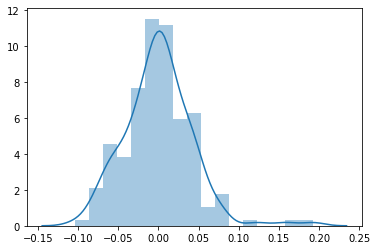

In [3071]:
y_train_pred=lr_model11.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3072]:
model_list11=model_list.copy()

In [3073]:
remove_list=['symboling_1','Company_isuzu','Company_jaguar','Company_mercury']
for i in remove_list:
    model_list.remove(i)

X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model2=lr.fit()
lr_model2.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     97.06
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.63e-76
Time:                        20:59:43   Log-Likelihood:                 281.95
No. Observations:                 164   AIC:                            -503.9
Df Residuals:                     134   BIC:                            -410.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0257      0.033     -0.778      0.438      -0.091       0.040
aspiration_turbo        0.0487      0.012      3.940      0.000       0.024       0.073
enginloc_rear           0.2923      0.041      7.181      0.000       0.212       0.373
carwidth                0.2994      0.051      5.815      0.000       0.198       0.401
enginesize              0.7921      0.062     12.741      0.000       0.669       0.915
boreratio              -0.0966      0.034     -2.851      0.005      -0.164      -0.030
peakrpm                 0.0933      0.024      3.897      0.000       0.046       0.141
symboling_0             0.0139      0.011      1.211      0.228      -0.009       0.037
carbody_hardtop        -0.0854      0.034     -2.511      0.013      -0.153      -0.018
carbody_hatchback      -0.0810      0.024     -3.345      0.001      -0.129      -0.033
carbody_sedan          -0.0746      0.024     -3.148      0.002      -0.122      -0.028
carbody_wagon          -0.0888      0.026     -3.417      0.001      -0.140      -0.037
enginetype_l            0.1475      0.069      2.146      0.034       0.012       0.283
enginetype_ohcv        -0.0854      0.023     -3.677      0.000      -0.131      -0.039
cylindernumber_five    -0.0638      0.022     -2.922      0.004      -0.107      -0.021
cylindernumber_two      0.1457      0.032      4.530      0.000       0.082       0.209
Company_bmw             0.1657      0.022      7.543      0.000       0.122       0.209
Company_buick           0.1513      0.028      5.346      0.000       0.095       0.207
Company_chevrolet      -0.0631      0.050     -1.254      0.212      -0.163       0.036
Company_dodge          -0.0896      0.023     -3.842      0.000      -0.136      -0.043
Company_honda          -0.0872      0.021     -4.144      0.000      -0.129      -0.046
Company_mazda          -0.0514      0.020     -2.581      0.011      -0.091      -0.012
Company_mitsubishi     -0.1186      0.022     -5.512      0.000      -0.161      -0.076
Company_nissan         -0.0656      0.018     -3.593      0.000      -0.102      -0.030
Company_peugeot        -0.1982      0.073     -2.699      0.008      -0.343      -0.053
Company_plymouth       -0.0801      0.025     -3.157      0.002      -0.130      -0.030
Company_renault        -0.1385      0.036     -3.827      0.000      -0.210      -0.067
Company_subaru         -0.0365      0.024     -1.541      0.126      -0.083       0.010
Company_toyota         -0.0604      0.016     -3.755      0.000      -0.092      -0.029
Company_volkswagen     -0.0748      0.018     -4.138      0.000      -0.111      -0.039
==============================================================================
Omnibus:                       31.435   Durbin-Watson:                   2.239
Prob(Omnibus):       

In [3074]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,carwidth,47.59
4,boreratio,25.78
3,enginesize,24.46
23,Company_peugeot,18.75
11,enginetype_l,18.39
9,carbody_sedan,12.07
5,peakrpm,11.58
8,carbody_hatchback,9.34
10,carbody_wagon,4.69
6,symboling_0,2.91


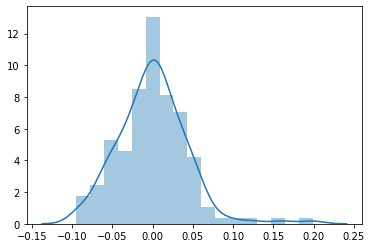

In [3075]:
y_train_pred=lr_model2.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3076]:
model_list.remove('Company_subaru')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model2=lr.fit()
lr_model2.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     99.43
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.47e-76
Time:                        20:59:44   Log-Likelihood:                 280.51
No. Observations:                 164   AIC:                            -503.0
Df Residuals:                     135   BIC:                            -413.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0353      0.033     -1.081      0.282      -0.100       0.029
aspiration_turbo        0.0520      0.012      4.247      0.000       0.028       0.076
enginloc_rear           0.2905      0.041      7.105      0.000       0.210       0.371
carwidth                0.3058      0.052      5.928      0.000       0.204       0.408
enginesize              0.8225      0.059     13.879      0.000       0.705       0.940
boreratio              -0.1152      0.032     -3.623      0.000      -0.178      -0.052
peakrpm                 0.1058      0.023      4.671      0.000       0.061       0.151
symboling_0             0.0081      0.011      0.739      0.461      -0.014       0.030
carbody_hardtop        -0.0888      0.034     -2.602      0.010      -0.156      -0.021
carbody_hatchback      -0.0857      0.024     -3.553      0.001      -0.133      -0.038
carbody_sedan          -0.0770      0.024     -3.239      0.002      -0.124      -0.030
carbody_wagon          -0.0934      0.026     -3.602      0.000      -0.145      -0.042
enginetype_l            0.1530      0.069      2.218      0.028       0.017       0.289
enginetype_ohcv        -0.0910      0.023     -3.947      0.000      -0.137      -0.045
cylindernumber_five    -0.0632      0.022     -2.882      0.005      -0.107      -0.020
cylindernumber_two      0.1413      0.032      4.390      0.000       0.078       0.205
Company_bmw             0.1720      0.022      7.933      0.000       0.129       0.215
Company_buick           0.1517      0.028      5.334      0.000       0.095       0.208
Company_chevrolet      -0.0558      0.050     -1.108      0.270      -0.155       0.044
Company_dodge          -0.0846      0.023     -3.644      0.000      -0.131      -0.039
Company_honda          -0.0812      0.021     -3.909      0.000      -0.122      -0.040
Company_mazda          -0.0388      0.018     -2.127      0.035      -0.075      -0.003
Company_mitsubishi     -0.1140      0.021     -5.323      0.000      -0.156      -0.072
Company_nissan         -0.0570      0.017     -3.262      0.001      -0.092      -0.022
Company_peugeot        -0.1894      0.074     -2.574      0.011      -0.335      -0.044
Company_plymouth       -0.0753      0.025     -2.975      0.003      -0.125      -0.025
Company_renault        -0.1269      0.036     -3.567      0.001      -0.197      -0.057
Company_toyota         -0.0493      0.014     -3.411      0.001      -0.078      -0.021
Company_volkswagen     -0.0692      0.018     -3.890      0.000      -0.104      -0.034
==============================================================================
Omnibus:                       31.748   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.519
Skew:                         

In [3077]:
lr_model23=lr.fit()
lr_model23.summary()
model_list23=model_list.copy()

In [3078]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,carwidth,47.39
3,enginesize,22.14
4,boreratio,20.31
23,Company_peugeot,18.62
11,enginetype_l,18.36
9,carbody_sedan,11.45
5,peakrpm,10.60
8,carbody_hatchback,8.53
10,carbody_wagon,4.38
12,enginetype_ohcv,2.75


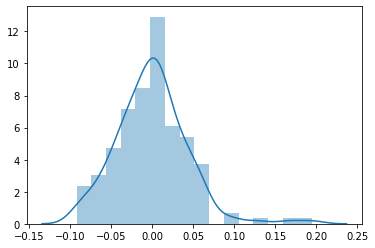

In [3079]:
y_train_pred=lr_model2.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3080]:
model_list.remove('carwidth')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)


C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3081]:
lr_model20=lr.fit()
lr_model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     81.38
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.31e-71
Time:                        20:59:45   Log-Likelihood:                 261.54
No. Observations:                 164   AIC:                            -467.1
Df Residuals:                     136   BIC:                            -380.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0198      0.036     -0.543      0.588      -0.092       0.052
aspiration_turbo        0.0627      0.014      4.628      0.000       0.036       0.089
enginloc_rear           0.2171      0.044      4.981      0.000       0.131       0.303
enginesize              1.0533      0.050     21.080      0.000       0.954       1.152
boreratio              -0.0755      0.035     -2.171      0.032      -0.144      -0.007
peakrpm                 0.1334      0.025      5.383      0.000       0.084       0.182
symboling_0            -0.0101      0.012     -0.863      0.389      -0.033       0.013
carbody_hardtop        -0.0864      0.038     -2.263      0.025      -0.162      -0.011
carbody_hatchback      -0.0489      0.026     -1.874      0.063      -0.100       0.003
carbody_sedan          -0.0365      0.025     -1.432      0.154      -0.087       0.014
carbody_wagon          -0.0486      0.028     -1.752      0.082      -0.104       0.006
enginetype_l            0.1020      0.077      1.333      0.185      -0.049       0.253
enginetype_ohcv        -0.0874      0.026     -3.391      0.001      -0.138      -0.036
cylindernumber_five    -0.0192      0.023     -0.830      0.408      -0.065       0.026
cylindernumber_two      0.1549      0.036      4.311      0.000       0.084       0.226
Company_bmw             0.1572      0.024      6.523      0.000       0.110       0.205
Company_buick           0.1803      0.031      5.749      0.000       0.118       0.242
Company_chevrolet      -0.0819      0.056     -1.460      0.146      -0.193       0.029
Company_dodge          -0.1155      0.025     -4.563      0.000      -0.165      -0.065
Company_honda          -0.0930      0.023     -4.019      0.000      -0.139      -0.047
Company_mazda          -0.0272      0.020     -1.341      0.182      -0.067       0.013
Company_mitsubishi     -0.1337      0.024     -5.648      0.000      -0.180      -0.087
Company_nissan         -0.0811      0.019     -4.271      0.000      -0.119      -0.044
Company_peugeot        -0.0829      0.080     -1.039      0.301      -0.241       0.075
Company_plymouth       -0.1066      0.028     -3.852      0.000      -0.161      -0.052
Company_renault        -0.1171      0.040     -2.945      0.004      -0.196      -0.038
Company_toyota         -0.0528      0.016     -3.269      0.001      -0.085      -0.021
Company_volkswagen     -0.0649      0.020     -3.262      0.001      -0.104      -0.026
==============================================================================
Omnibus:                       15.152   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.803
Skew:                           0.498   Prob(JB):                     6.78e-06
Kurtosis:                       4.578  

In [3082]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,boreratio,18.73
10,enginetype_l,18.09
22,Company_peugeot,17.52
2,enginesize,12.45
4,peakrpm,9.89
8,carbody_sedan,9.30
7,carbody_hatchback,7.23
9,carbody_wagon,3.66
11,enginetype_ohcv,2.74
5,symboling_0,2.40


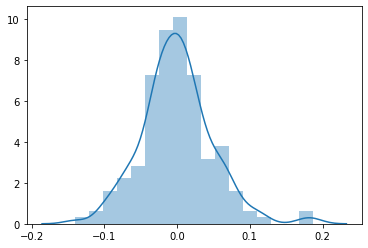

In [3083]:
y_train_pred=lr_model20.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3084]:
model_list20=model_list.copy()

In [3085]:

remove_list=['symboling_0','cylindernumber_five','Company_peugeot']
for i in remove_list:
    model_list.remove(i)

X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model24=lr.fit()
lr_model24.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     91.66
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.62e-73
Time:                        20:59:47   Log-Likelihood:                 259.95
No. Observations:                 164   AIC:                            -469.9
Df Residuals:                     139   BIC:                            -392.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0183      0.036     -0.505      0.615      -0.090       0.054
aspiration_turbo       0.0618      0.013      4.627      0.000       0.035       0.088
enginloc_rear          0.2197      0.044      5.050      0.000       0.134       0.306
enginesize             1.0388      0.049     21.366      0.000       0.943       1.135
boreratio             -0.0703      0.033     -2.109      0.037      -0.136      -0.004
peakrpm                0.1312      0.024      5.396      0.000       0.083       0.179
carbody_hardtop       -0.0850      0.038     -2.231      0.027      -0.160      -0.010
carbody_hatchback     -0.0521      0.026     -2.014      0.046      -0.103      -0.001
carbody_sedan         -0.0430      0.025     -1.727      0.086      -0.092       0.006
carbody_wagon         -0.0578      0.027     -2.157      0.033      -0.111      -0.005
enginetype_l           0.0214      0.022      0.993      0.323      -0.021       0.064
enginetype_ohcv       -0.0817      0.024     -3.342      0.001      -0.130      -0.033
cylindernumber_two     0.1570      0.036      4.390      0.000       0.086       0.228
Company_bmw            0.1586      0.023      6.779      0.000       0.112       0.205
Company_buick          0.1767      0.028      6.215      0.000       0.120       0.233
Company_chevrolet     -0.0393      0.042     -0.928      0.355      -0.123       0.044
Company_dodge         -0.1095      0.025     -4.424      0.000      -0.158      -0.061
Company_honda         -0.0928      0.022     -4.271      0.000      -0.136      -0.050
Company_mazda         -0.0277      0.020     -1.390      0.167      -0.067       0.012
Company_mitsubishi    -0.1283      0.023     -5.539      0.000      -0.174      -0.083
Company_nissan        -0.0795      0.019     -4.200      0.000      -0.117      -0.042
Company_plymouth      -0.1004      0.027     -3.705      0.000      -0.154      -0.047
Company_renault       -0.1158      0.040     -2.929      0.004      -0.194      -0.038
Company_toyota        -0.0510      0.016     -3.209      0.002      -0.082      -0.020
Company_volkswagen    -0.0623      0.020     -3.153      0.002      -0.101      -0.023
==============================================================================
Omnibus:                       13.547   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.524
Skew:                           0.480   Prob(JB):                     5.76e-05
Kurtosis:                       4.392   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3086]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,boreratio,16.93
2,enginesize,11.82
4,peakrpm,9.41
7,carbody_sedan,8.71
6,carbody_hatchback,7.04
8,carbody_wagon,3.32
10,enginetype_ohcv,2.47
5,carbody_hardtop,1.93
1,enginloc_rear,1.93
17,Company_mazda,1.90


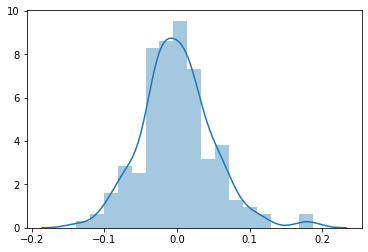

In [3087]:
y_train_pred=lr_model24.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3088]:
#lr_model4=lr_model2
model_list24=model_list.copy()

In [3089]:
model_list.remove('enginetype_l')
model_list.remove('Company_chevrolet')

#model_list.append('enginetype_l')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model12=lr.fit()
lr_model12.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.55e-75
Time:                        20:59:48   Log-Likelihood:                 259.07
No. Observations:                 164   AIC:                            -472.1
Df Residuals:                     141   BIC:                            -400.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0180      0.035     -0.510      0.611      -0.088       0.052
aspiration_turbo       0.0646      0.013      4.935      0.000       0.039       0.091
enginloc_rear          0.2202      0.043      5.071      0.000       0.134       0.306
enginesize             1.0404      0.048     21.595      0.000       0.945       1.136
boreratio             -0.0650      0.033     -1.980      0.050      -0.130      -0.000
peakrpm                0.1249      0.023      5.340      0.000       0.079       0.171
carbody_hardtop       -0.0854      0.038     -2.247      0.026      -0.160      -0.010
carbody_hatchback     -0.0537      0.026     -2.082      0.039      -0.105      -0.003
carbody_sedan         -0.0424      0.025     -1.706      0.090      -0.092       0.007
carbody_wagon         -0.0564      0.027     -2.111      0.037      -0.109      -0.004
enginetype_ohcv       -0.0816      0.024     -3.346      0.001      -0.130      -0.033
cylindernumber_two     0.1620      0.035      4.571      0.000       0.092       0.232
Company_bmw            0.1569      0.023      6.749      0.000       0.111       0.203
Company_buick          0.1708      0.028      6.140      0.000       0.116       0.226
Company_dodge         -0.1090      0.024     -4.478      0.000      -0.157      -0.061
Company_honda         -0.0893      0.021     -4.214      0.000      -0.131      -0.047
Company_mazda         -0.0282      0.019     -1.461      0.146      -0.066       0.010
Company_mitsubishi    -0.1282      0.023     -5.635      0.000      -0.173      -0.083
Company_nissan        -0.0798      0.019     -4.306      0.000      -0.116      -0.043
Company_plymouth      -0.0992      0.027     -3.715      0.000      -0.152      -0.046
Company_renault       -0.1167      0.039     -2.969      0.004      -0.194      -0.039
Company_toyota        -0.0522      0.015     -3.446      0.001      -0.082      -0.022
Company_volkswagen    -0.0623      0.019     -3.220      0.002      -0.100      -0.024
==============================================================================
Omnibus:                       12.102   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.220
Skew:                           0.434   Prob(JB):                     0.000182
Kurtosis:                       4.329   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3090]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,boreratio,16.52
2,enginesize,11.70
4,peakrpm,8.87
7,carbody_sedan,8.23
6,carbody_hatchback,6.51
8,carbody_wagon,3.16
9,enginetype_ohcv,2.47
1,enginloc_rear,1.93
5,carbody_hardtop,1.91
15,Company_mazda,1.84


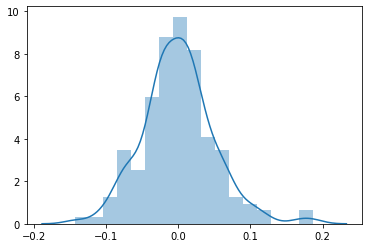

In [3091]:
y_train_pred=lr_model12.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3092]:
#lr_model12=LinearRegression(lr_model2)
model_list12=model_list.copy()

In [3093]:
model_list.remove('boreratio')

#model_list.append('enginetype_l')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model13=lr.fit()
lr_model13.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     102.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.99e-75
Time:                        20:59:50   Log-Likelihood:                 256.82
No. Observations:                 164   AIC:                            -469.6
Df Residuals:                     142   BIC:                            -401.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0530      0.031     -1.713      0.089      -0.114       0.008
aspiration_turbo       0.0601      0.013      4.612      0.000       0.034       0.086
enginloc_rear          0.2234      0.044      5.097      0.000       0.137       0.310
enginesize             0.9937      0.042     23.409      0.000       0.910       1.078
peakrpm                0.1267      0.024      5.363      0.000       0.080       0.173
carbody_hardtop       -0.0887      0.038     -2.313      0.022      -0.164      -0.013
carbody_hatchback     -0.0478      0.026     -1.850      0.066      -0.099       0.003
carbody_sedan         -0.0374      0.025     -1.496      0.137      -0.087       0.012
carbody_wagon         -0.0553      0.027     -2.051      0.042      -0.109      -0.002
enginetype_ohcv       -0.0701      0.024     -2.929      0.004      -0.117      -0.023
cylindernumber_two     0.1518      0.035      4.285      0.000       0.082       0.222
Company_bmw            0.1601      0.023      6.836      0.000       0.114       0.206
Company_buick          0.1797      0.028      6.479      0.000       0.125       0.235
Company_dodge         -0.0983      0.024     -4.101      0.000      -0.146      -0.051
Company_honda         -0.0765      0.020     -3.753      0.000      -0.117      -0.036
Company_mazda         -0.0252      0.019     -1.297      0.197      -0.064       0.013
Company_mitsubishi    -0.1195      0.023     -5.299      0.000      -0.164      -0.075
Company_nissan        -0.0760      0.019     -4.084      0.000      -0.113      -0.039
Company_plymouth      -0.0863      0.026     -3.298      0.001      -0.138      -0.035
Company_renault       -0.1163      0.040     -2.928      0.004      -0.195      -0.038
Company_toyota        -0.0458      0.015     -3.062      0.003      -0.075      -0.016
Company_volkswagen    -0.0517      0.019     -2.755      0.007      -0.089      -0.015
==============================================================================
Omnibus:                        8.075   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                9.588
Skew:                           0.352   Prob(JB):                      0.00828
Kurtosis:                       3.952   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3094]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,peakrpm,8.46
2,enginesize,7.29
6,carbody_sedan,6.85
5,carbody_hatchback,5.60
7,carbody_wagon,2.49
8,enginetype_ohcv,2.27
1,enginloc_rear,1.93
4,carbody_hardtop,1.85
14,Company_mazda,1.84
9,cylindernumber_two,1.68


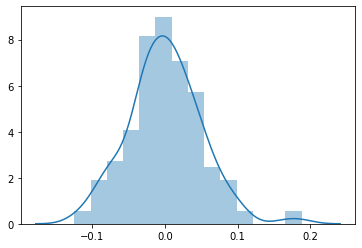

In [3095]:
y_train_pred=lr_model13.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3096]:
#lr_model13=LinearRegression(lr_model2)
model_list13=model_list.copy()

In [3097]:
model_list.remove('carbody_sedan')
model_list.remove('Company_mazda')
#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model14=lr.fit()
lr_model14.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.40e-76
Time:                        20:59:51   Log-Likelihood:                 254.45
No. Observations:                 164   AIC:                            -468.9
Df Residuals:                     144   BIC:                            -406.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0994      0.019     -5.370      0.000      -0.136      -0.063
aspiration_turbo       0.0615      0.013      4.840      0.000       0.036       0.087
enginloc_rear          0.2427      0.042      5.737      0.000       0.159       0.326
enginesize             1.0038      0.042     23.701      0.000       0.920       1.087
peakrpm                0.1348      0.023      5.823      0.000       0.089       0.181
carbody_hardtop       -0.0671      0.036     -1.883      0.062      -0.137       0.003
carbody_hatchback     -0.0144      0.010     -1.370      0.173      -0.035       0.006
carbody_wagon         -0.0183      0.014     -1.350      0.179      -0.045       0.008
enginetype_ohcv       -0.0684      0.024     -2.840      0.005      -0.116      -0.021
cylindernumber_two     0.1309      0.032      4.093      0.000       0.068       0.194
Company_bmw            0.1606      0.023      6.879      0.000       0.114       0.207
Company_buick          0.1885      0.028      6.836      0.000       0.134       0.243
Company_dodge         -0.0948      0.024     -3.956      0.000      -0.142      -0.047
Company_honda         -0.0737      0.020     -3.639      0.000      -0.114      -0.034
Company_mitsubishi    -0.1158      0.022     -5.150      0.000      -0.160      -0.071
Company_nissan        -0.0737      0.018     -4.017      0.000      -0.110      -0.037
Company_plymouth      -0.0829      0.026     -3.171      0.002      -0.135      -0.031
Company_renault       -0.1120      0.040     -2.812      0.006      -0.191      -0.033
Company_toyota        -0.0379      0.014     -2.686      0.008      -0.066      -0.010
Company_volkswagen    -0.0456      0.019     -2.456      0.015      -0.082      -0.009
==============================================================================
Omnibus:                        4.043   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.899
Skew:                           0.235   Prob(JB):                        0.142
Kurtosis:                       3.592   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3098]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,peakrpm,5.67
2,enginesize,5.28
7,enginetype_ohcv,2.08
5,carbody_hatchback,1.89
1,enginloc_rear,1.73
4,carbody_hardtop,1.69
10,Company_buick,1.51
12,Company_honda,1.51
14,Company_nissan,1.48
0,aspiration_turbo,1.41


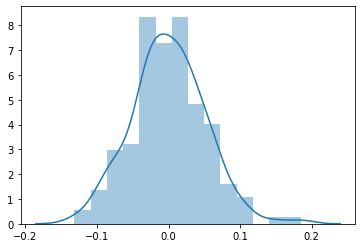

In [3099]:
y_train_pred=lr_model14.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

### Judging model

In [3100]:
#lr_model14=LinearRegression(lr_model)
model_list14=model_list.copy()

In [3101]:
model_list.remove('carbody_hatchback')
model_list.remove('carbody_wagon')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model15=lr.fit()
lr_model15.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     123.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.11e-77
Time:                        20:59:52   Log-Likelihood:                 252.85
No. Observations:                 164   AIC:                            -469.7
Df Residuals:                     146   BIC:                            -413.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1083      0.018     -6.090      0.000      -0.143      -0.073
aspiration_turbo       0.0606      0.013      4.764      0.000       0.035       0.086
enginloc_rear          0.2458      0.042      5.799      0.000       0.162       0.330
enginesize             1.0112      0.042     24.025      0.000       0.928       1.094
peakrpm                0.1344      0.023      5.799      0.000       0.089       0.180
carbody_hardtop       -0.0634      0.036     -1.780      0.077      -0.134       0.007
enginetype_ohcv       -0.0709      0.024     -2.956      0.004      -0.118      -0.023
cylindernumber_two     0.1255      0.032      3.969      0.000       0.063       0.188
Company_bmw            0.1667      0.023      7.209      0.000       0.121       0.212
Company_buick          0.1909      0.028      6.924      0.000       0.136       0.245
Company_dodge         -0.0969      0.024     -4.040      0.000      -0.144      -0.049
Company_honda         -0.0750      0.020     -3.704      0.000      -0.115      -0.035
Company_mitsubishi    -0.1160      0.022     -5.183      0.000      -0.160      -0.072
Company_nissan        -0.0733      0.018     -3.985      0.000      -0.110      -0.037
Company_plymouth      -0.0840      0.026     -3.206      0.002      -0.136      -0.032
Company_renault       -0.1213      0.040     -3.066      0.003      -0.199      -0.043
Company_toyota        -0.0388      0.014     -2.760      0.007      -0.067      -0.011
Company_volkswagen    -0.0406      0.018     -2.215      0.028      -0.077      -0.004
==============================================================================
Omnibus:                        3.814   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.443
Skew:                           0.261   Prob(JB):                        0.179
Kurtosis:                       3.481   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3102]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,5.20
3,peakrpm,5.16
5,enginetype_ohcv,2.05
1,enginloc_rear,1.71
4,carbody_hardtop,1.68
8,Company_buick,1.51
10,Company_honda,1.50
12,Company_nissan,1.48
0,aspiration_turbo,1.40
6,cylindernumber_two,1.33


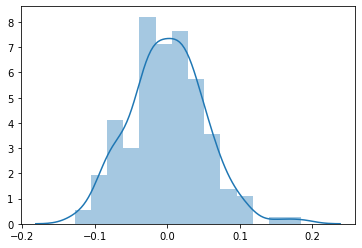

In [3103]:
y_train_pred=lr_model15.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3104]:
#lr_model15=LinearRegression(lr_model)

model_list15=model_list.copy()

In [3105]:
#model_list.remove('carbody_hardtop')
model_list.remove('Company_volkswagen')
#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model16=lr.fit()
lr_model16.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.05e-77
Time:                        20:59:53   Log-Likelihood:                 250.14
No. Observations:                 164   AIC:                            -466.3
Df Residuals:                     147   BIC:                            -413.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1159      0.018     -6.556      0.000      -0.151      -0.081
aspiration_turbo       0.0626      0.013      4.869      0.000       0.037       0.088
enginloc_rear          0.2518      0.043      5.876      0.000       0.167       0.337
enginesize             1.0253      0.042     24.322      0.000       0.942       1.109
peakrpm                0.1297      0.023      5.548      0.000       0.084       0.176
carbody_hardtop       -0.0651      0.036     -1.803      0.073      -0.136       0.006
enginetype_ohcv       -0.0722      0.024     -2.974      0.003      -0.120      -0.024
cylindernumber_two     0.1372      0.032      4.341      0.000       0.075       0.200
Company_bmw            0.1712      0.023      7.339      0.000       0.125       0.217
Company_buick          0.1909      0.028      6.834      0.000       0.136       0.246
Company_dodge         -0.0895      0.024     -3.718      0.000      -0.137      -0.042
Company_honda         -0.0655      0.020     -3.266      0.001      -0.105      -0.026
Company_mitsubishi    -0.1092      0.022     -4.861      0.000      -0.154      -0.065
Company_nissan        -0.0667      0.018     -3.624      0.000      -0.103      -0.030
Company_plymouth      -0.0757      0.026     -2.882      0.005      -0.128      -0.024
Company_renault       -0.1150      0.040     -2.878      0.005      -0.194      -0.036
Company_toyota        -0.0327      0.014     -2.341      0.021      -0.060      -0.005
==============================================================================
Omnibus:                        4.024   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.580
Skew:                           0.294   Prob(JB):                        0.167
Kurtosis:                       3.422   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3106]:

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,5.19
3,peakrpm,4.63
5,enginetype_ohcv,2.05
1,enginloc_rear,1.68
4,carbody_hardtop,1.68
8,Company_buick,1.51
12,Company_nissan,1.45
10,Company_honda,1.43
0,aspiration_turbo,1.40
6,cylindernumber_two,1.29


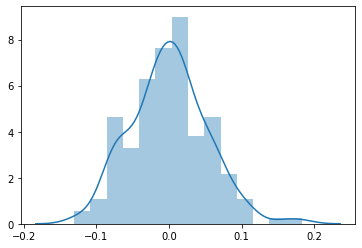

In [3107]:

y_train_pred=lr_model16.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3108]:
#lr_model16=LinearRegression(lr_model)
model_list16=model_list.copy()

In [3109]:
model_list.remove('Company_toyota')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model17=lr.fit()
lr_model17.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.30e-77
Time:                        20:59:54   Log-Likelihood:                 247.14
No. Observations:                 164   AIC:                            -462.3
Df Residuals:                     148   BIC:                            -412.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1343      0.016     -8.365      0.000      -0.166      -0.103
aspiration_turbo       0.0681      0.013      5.304      0.000       0.043       0.093
enginloc_rear          0.2566      0.043      5.906      0.000       0.171       0.343
enginesize             1.0347      0.043     24.291      0.000       0.951       1.119
peakrpm                0.1457      0.023      6.422      0.000       0.101       0.191
carbody_hardtop       -0.0744      0.036     -2.043      0.043      -0.146      -0.002
enginetype_ohcv       -0.0719      0.025     -2.916      0.004      -0.121      -0.023
cylindernumber_two     0.1392      0.032      4.342      0.000       0.076       0.203
Company_bmw            0.1770      0.024      7.513      0.000       0.130       0.224
Company_buick          0.1993      0.028      7.085      0.000       0.144       0.255
Company_dodge         -0.0847      0.024     -3.482      0.001      -0.133      -0.037
Company_honda         -0.0620      0.020     -3.056      0.003      -0.102      -0.022
Company_mitsubishi    -0.1047      0.023     -4.611      0.000      -0.150      -0.060
Company_nissan        -0.0602      0.018     -3.262      0.001      -0.097      -0.024
Company_plymouth      -0.0706      0.027     -2.655      0.009      -0.123      -0.018
Company_renault       -0.1073      0.040     -2.654      0.009      -0.187      -0.027
==============================================================================
Omnibus:                        5.150   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.225
Skew:                           0.280   Prob(JB):                       0.0734
Kurtosis:                       3.671   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3110]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,4.84
3,peakrpm,4.62
5,enginetype_ohcv,1.98
4,carbody_hardtop,1.66
1,enginloc_rear,1.63
8,Company_buick,1.49
12,Company_nissan,1.45
10,Company_honda,1.41
0,aspiration_turbo,1.38
6,cylindernumber_two,1.29


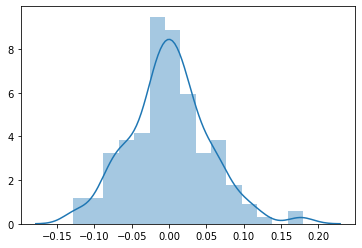

In [3111]:
y_train_pred=lr_model17.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3112]:
model_list17=model_list.copy()

In [3113]:
model_list.remove('Company_renault')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model18=lr.fit()
lr_model18.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.34e-77
Time:                        20:59:54   Log-Likelihood:                 243.33
No. Observations:                 164   AIC:                            -456.7
Df Residuals:                     149   BIC:                            -410.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1348      0.016     -8.231      0.000      -0.167      -0.102
aspiration_turbo       0.0701      0.013      5.363      0.000       0.044       0.096
enginloc_rear          0.2603      0.044      5.876      0.000       0.173       0.348
enginesize             1.0296      0.043     23.719      0.000       0.944       1.115
peakrpm                0.1440      0.023      6.222      0.000       0.098       0.190
carbody_hardtop       -0.0728      0.037     -1.960      0.052      -0.146       0.001
enginetype_ohcv       -0.0690      0.025     -2.747      0.007      -0.119      -0.019
cylindernumber_two     0.1417      0.033      4.334      0.000       0.077       0.206
Company_bmw            0.1805      0.024      7.524      0.000       0.133       0.228
Company_buick          0.2005      0.029      6.989      0.000       0.144       0.257
Company_dodge         -0.0829      0.025     -3.340      0.001      -0.132      -0.034
Company_honda         -0.0593      0.021     -2.868      0.005      -0.100      -0.018
Company_mitsubishi    -0.1030      0.023     -4.448      0.000      -0.149      -0.057
Company_nissan        -0.0587      0.019     -3.118      0.002      -0.096      -0.022
Company_plymouth      -0.0685      0.027     -2.529      0.012      -0.122      -0.015
==============================================================================
Omnibus:                        4.207   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.945
Skew:                           0.265   Prob(JB):                        0.139
Kurtosis:                       3.545   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3114]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,4.82
3,peakrpm,4.61
5,enginetype_ohcv,1.98
4,carbody_hardtop,1.66
1,enginloc_rear,1.63
8,Company_buick,1.49
12,Company_nissan,1.45
10,Company_honda,1.41
0,aspiration_turbo,1.38
6,cylindernumber_two,1.29


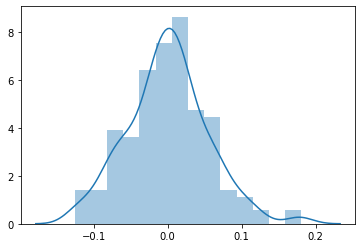

In [3115]:
y_train_pred=lr_model18.predict(X_train_sm)
model_list18=model_list.copy()
res=y_train-y_train_pred
sns.distplot(res)

In [3116]:
model_list.remove('Company_plymouth')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model19=lr.fit()
lr_model19.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.20e-77
Time:                        20:59:55   Log-Likelihood:                 239.88
No. Observations:                 164   AIC:                            -451.8
Df Residuals:                     150   BIC:                            -408.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1364      0.017     -8.183      0.000      -0.169      -0.103
aspiration_turbo       0.0685      0.013      5.154      0.000       0.042       0.095
enginloc_rear          0.2652      0.045      5.888      0.000       0.176       0.354
enginesize             1.0442      0.044     23.845      0.000       0.958       1.131
peakrpm                0.1337      0.023      5.766      0.000       0.088       0.179
carbody_hardtop       -0.0742      0.038     -1.964      0.051      -0.149       0.000
enginetype_ohcv       -0.0718      0.026     -2.814      0.006      -0.122      -0.021
cylindernumber_two     0.1529      0.033      4.638      0.000       0.088       0.218
Company_bmw            0.1820      0.024      7.454      0.000       0.134       0.230
Company_buick          0.1977      0.029      6.777      0.000       0.140       0.255
Company_dodge         -0.0768      0.025     -3.055      0.003      -0.126      -0.027
Company_honda         -0.0511      0.021     -2.457      0.015      -0.092      -0.010
Company_mitsubishi    -0.0973      0.023     -4.149      0.000      -0.144      -0.051
Company_nissan        -0.0542      0.019     -2.842      0.005      -0.092      -0.017
==============================================================================
Omnibus:                        3.206   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.749
Skew:                           0.252   Prob(JB):                        0.253
Kurtosis:                       3.385   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3117]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,4.72
3,peakrpm,4.23
5,enginetype_ohcv,1.98
4,carbody_hardtop,1.66
1,enginloc_rear,1.63
8,Company_buick,1.49
12,Company_nissan,1.44
0,aspiration_turbo,1.37
10,Company_honda,1.37
6,cylindernumber_two,1.26


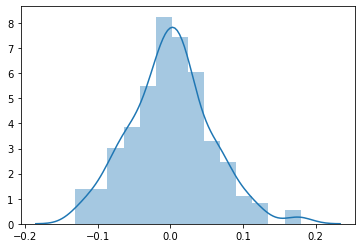

In [3118]:
y_train_pred=lr_model19.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3119]:
#lr_model17=LinearRegression(lr_model)
model_list19=model_list.copy()

In [3120]:
model_list.remove('Company_honda')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     146.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.47e-77
Time:                        20:59:55   Log-Likelihood:                 236.64
No. Observations:                 164   AIC:                            -447.3
Df Residuals:                     151   BIC:                            -407.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1330      0.017     -7.879      0.000      -0.166      -0.100
aspiration_turbo       0.0702      0.013      5.205      0.000       0.044       0.097
enginloc_rear          0.2774      0.046      6.094      0.000       0.187       0.367
enginesize             1.0580      0.044     23.964      0.000       0.971       1.145
peakrpm                0.1108      0.022      5.133      0.000       0.068       0.153
carbody_hardtop       -0.0754      0.038     -1.962      0.052      -0.151       0.001
enginetype_ohcv       -0.0727      0.026     -2.800      0.006      -0.124      -0.021
cylindernumber_two     0.1718      0.033      5.272      0.000       0.107       0.236
Company_bmw            0.1859      0.025      7.507      0.000       0.137       0.235
Company_buick          0.1903      0.029      6.451      0.000       0.132       0.249
Company_dodge         -0.0685      0.025     -2.705      0.008      -0.119      -0.018
Company_mitsubishi    -0.0901      0.024     -3.808      0.000      -0.137      -0.043
Company_nissan        -0.0485      0.019     -2.522      0.013      -0.087      -0.011
==============================================================================
Omnibus:                        3.013   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.550
Skew:                           0.276   Prob(JB):                        0.279
Kurtosis:                       3.262   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

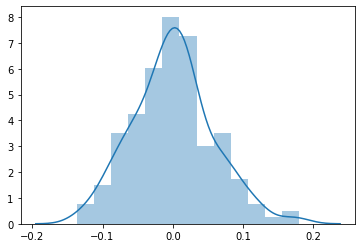

In [3121]:
y_train_pred=lr_model26.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

In [3122]:
model_list26=model_list.copy()

In [3123]:
model_list.remove('Company_nissan')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model27=lr.fit()
lr_model27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.65e-76
Time:                        20:59:57   Log-Likelihood:                 233.26
No. Observations:                 164   AIC:                            -442.5
Df Residuals:                     152   BIC:                            -405.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1410      0.017     -8.354      0.000      -0.174      -0.108
aspiration_turbo       0.0697      0.014      5.076      0.000       0.043       0.097
enginloc_rear          0.2723      0.046      5.884      0.000       0.181       0.364
enginesize             1.0775      0.044     24.367      0.000       0.990       1.165
peakrpm                0.1114      0.022      5.070      0.000       0.068       0.155
carbody_hardtop       -0.0713      0.039     -1.825      0.070      -0.148       0.006
enginetype_ohcv       -0.1032      0.023     -4.420      0.000      -0.149      -0.057
cylindernumber_two     0.1784      0.033      5.397      0.000       0.113       0.244
Company_bmw            0.1857      0.025      7.371      0.000       0.136       0.235
Company_buick          0.2012      0.030      6.779      0.000       0.143       0.260
Company_dodge         -0.0642      0.026     -2.496      0.014      -0.115      -0.013
Company_mitsubishi    -0.0861      0.024     -3.584      0.000      -0.134      -0.039
==============================================================================
Omnibus:                        3.738   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.318
Skew:                           0.335   Prob(JB):                        0.190
Kurtosis:                       3.194   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

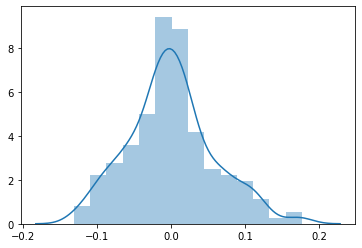

In [3124]:
y_train_pred=lr_model27.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)
model_list27=model_list.copy()

In [3125]:
model_list.remove('Company_dodge')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model28=lr.fit()
lr_model28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.62e-76
Time:                        20:59:57   Log-Likelihood:                 229.97
No. Observations:                 164   AIC:                            -437.9
Df Residuals:                     153   BIC:                            -403.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1417      0.017     -8.258      0.000      -0.176      -0.108
aspiration_turbo       0.0657      0.014      4.738      0.000       0.038       0.093
enginloc_rear          0.2762      0.047      5.873      0.000       0.183       0.369
enginesize             1.0848      0.045     24.176      0.000       0.996       1.173
peakrpm                0.1052      0.022      4.739      0.000       0.061       0.149
carbody_hardtop       -0.0728      0.040     -1.834      0.069      -0.151       0.006
enginetype_ohcv       -0.1030      0.024     -4.337      0.000      -0.150      -0.056
cylindernumber_two     0.1849      0.034      5.520      0.000       0.119       0.251
Company_bmw            0.1869      0.026      7.298      0.000       0.136       0.238
Company_buick          0.2009      0.030      6.656      0.000       0.141       0.261
Company_mitsubishi    -0.0813      0.024     -3.339      0.001      -0.129      -0.033
==============================================================================
Omnibus:                        3.203   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.725
Skew:                           0.273   Prob(JB):                        0.256
Kurtosis:                       3.318   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

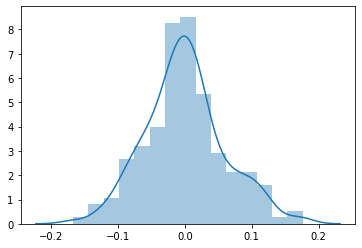

In [3126]:
y_train_pred=lr_model28.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)
model_list28=model_list.copy()

##### Evaluation and prediction
After checking r2_score of test dataframe with various models, lr_model18 is found to predict data more close to prediction value

In [3127]:
df_test[num_col]=scaler.transform(df_test[num_col])

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3128]:
df_test.head()

,fueltype_gas,aspiration_turbo,doornumber_two,enginloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
113,1,0,0,0,0.951724,0.939837,0.675000,0.741667,0.697052,0.222642,0.657143,0.057143,0.08750,0.295597,0.459459,0.166667,0.210526,0.286815,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
170,1,0,1,0,0.406897,0.570732,0.441667,0.350000,0.461986,0.320755,0.771429,0.680952,0.14375,0.427673,0.351351,0.305556,0.368421,0.150265,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,1,0,1,0,0.503448,0.580488,0.375000,0.541667,0.474011,0.388679,0.550000,0.533333,0.12500,0.459119,0.054054,0.222222,0.315789,0.393028,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,1,0,0,0,1.182759,1.089431,0.950000,0.741667,0.935609,0.932075,0.900000,0.609524,0.06250,0.855346,0.189189,0.027778,0.000000,0.889687,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,1,1,0,0,0.358621,0.502439,0.425000,0.541667,0.396431,0.177358,0.771429,0.271429,0.04375,0.396226,0.351351,0.305556,0.342105,0.151755,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3129]:
df_test.describe()

,fueltype_gas,aspiration_turbo,doornumber_two,enginloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.878049,0.243902,0.463415,0.0,0.411522,0.519135,0.450610,0.455488,0.390944,0.229544,0.551220,0.568990,0.210823,0.306949,0.497034,0.373984,0.419127,0.161256,0.048780,0.390244,0.268293,0.146341,0.146341,0.097561,0.365854,0.463415,0.073171,0.634146,0.317073,0.073171,0.780488,0.073171,0.024390,0.0,0.048780,0.878049,0.048780,0.0,0.390244,0.0,0.121951,0.317073,0.121951,0.024390,0.024390,0.048780,0.024390,0.073171,0.048780,0.0,0.0,0.048780,0.0,0.146341,0.097561,0.073171,0.048780,0.0,0.0,0.024390,0.073171,0.195122,0.024390,0.024390
std,0.331295,0.434769,0.504854,0.0,0.213855,0.201085,0.180040,0.196158,0.193537,0.149295,0.185679,0.165064,0.281992,0.197048,0.244955,0.170906,0.175587,0.170786,0.218085,0.493865,0.448575,0.357839,0.357839,0.300406,0.487652,0.504854,0.263652,0.487652,0.471117,0.263652,0.419058,0.263652,0.156174,0.0,0.218085,0.331295,0.218085,0.0,0.493865,0.0,0.331295,0.471117,0.331295,0.156174,0.156174,0.218085,0.156174,0.263652,0.218085,0.0,0.0,0.218085,0.0,0.357839,0.300406,0.263652,0.218085,0.0,0.0,0.156174,0.263652,0.401218,0.156174,0.156174
min,0.000000,0.000000,0.000000,0.0,0.224138,0.144715,0.258333,0.133333,0.155547,0.109434,0.264286,0.057143,0.000000,0.050314,0.000000,0.027778,0.000000,-0.000820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.0,0.272414,0.409756,0.308333,0.316667,0.217998,0.135849,0.421429,0.514286,0.087500,0.132075,0.351351,0.250000,0.315789,0.065517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.0,0.334483,0.518699,0.425000,0.416667,0.342126,0.184906,0.521429,0.580952,0.137500,0.295597,0.459459,0.388889,0.421053,0.103034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000

In [3130]:
y_test=df_test.pop('price')
X_test=df_test

In [3131]:
#Predicting on test model
new_model_list=[]
if 'const' not in new_model_list:
    new_model_list.append('const')
for i in model_list18:
 
    new_model_list.append(i)
X_test_sm=sm.add_constant(X_test)
X_test_sm=X_test_sm[new_model_list]
#print(new_model_list)

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3132]:
 y_test_pred=lr_model18.predict(X_test_sm)

In [3133]:
#finding r2_score of test set and predicted test set
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8704730592781583

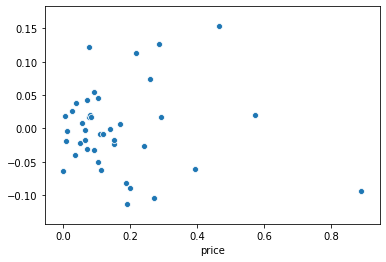

In [3134]:
#scatter plot  of y v/s residual
sns.scatterplot(x=y_test,y=y_test-y_test_pred)

In [3135]:
lr_model18.params

const                -0.134831
aspiration_turbo      0.070116
enginloc_rear         0.260316
enginesize            1.029596
peakrpm               0.143988
carbody_hardtop      -0.072822
enginetype_ohcv      -0.068998
cylindernumber_two    0.141671
Company_bmw           0.180497
Company_buick         0.200480
Company_dodge        -0.082883
Company_honda        -0.059304
Company_mitsubishi   -0.103019
Company_nissan       -0.058693
Company_plymouth     -0.068548
dtype: float64

##### Prediction summary
- The above indicates that BMW  and Buick comes in high price range where as Dodge, honda, mitsubishi,nissan,plymouth are  in lower range with mitusubishi and dodge being cheaper.

- Price has a very high correlation with enginesize
- Cylindernumber of two, enginelocation being rear,aspiration being turbo,peakrpm have positive correlation w.r.t price
- Carbody_hardtop,enginetype_ohcv have negative correlation with price

## Model2
##### Using correlated variables alongw ith rfe suggested 1

In [3137]:
model_list=['cylindernumber_four','fuelsystem_2bbl','cylindernumber_five',
            'Company_jaguar','Company_porsche','enginetype_ohc','carbody_hardtop','symboling_-1',
            'symboling_1','symboling_3','drivewheel_rwd','symboling_2','carbody_hatchback']
for i in rfe_rank:
    if(i[2]==1 and i not in model_list):
        model_list.append(i[0])
model_list

['cylindernumber_four',
 'fuelsystem_2bbl',
 'cylindernumber_five',
 'Company_jaguar',
 'Company_porsche',
 'enginetype_ohc',
 'carbody_hardtop',
 'symboling_-1',
 'symboling_1',
 'symboling_3',
 'drivewheel_rwd',
 'symboling_2',
 'carbody_hatchback',
 'enginloc_rear',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'peakrpm',
 'enginetype_l',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'Company_bmw',
 'Company_buick',
 'Company_peugeot',
 'Company_renault',
 'Company_subaru']

In [3138]:
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model1=lr.fit()
lr_model1.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     80.60
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.52e-70
Time:                        21:00:20   Log-Likelihood:                 260.80
No. Observations:                 164   AIC:                            -465.6
Df Residuals:                     136   BIC:                            -378.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1376      0.044     -3.144      0.002      -0.224      -0.051
cylindernumber_four     0.0061      0.026      0.235      0.815      -0.045       0.057
fuelsystem_2bbl        -0.0015      0.014     -0.110      0.913      -0.029       0.026
cylindernumber_five    -0.0278      0.032     -0.865      0.388      -0.091       0.036
Company_jaguar          0.0291      0.055      0.528      0.598      -0.080       0.138
Company_porsche         0.0446      0.049      0.913      0.363      -0.052       0.141
enginetype_ohc         -0.0307      0.026     -1.172      0.243      -0.083       0.021
carbody_hardtop        -0.0185      0.039     -0.471      0.638      -0.096       0.059
symboling_-1           -0.0215      0.018     -1.187      0.237      -0.057       0.014
symboling_1             0.0060      0.014      0.421      0.674      -0.022       0.034
symboling_3             0.0100      0.021      0.474      0.637      -0.032       0.052
drivewheel_rwd          0.0183      0.016      1.146      0.254      -0.013       0.050
symboling_2            -0.0064      0.015     -0.421      0.674      -0.036       0.024
carbody_hatchback      -0.0263      0.012     -2.237      0.027      -0.050      -0.003
enginloc_rear           0.2146      0.044      4.831      0.000       0.127       0.302
carlength              -0.1627      0.070     -2.312      0.022      -0.302      -0.024
carwidth                0.3554      0.071      5.027      0.000       0.216       0.495
curbweight              0.3286      0.110      2.992      0.003       0.111       0.546
enginesize              0.4419      0.116      3.806      0.000       0.212       0.672
peakrpm                 0.0596      0.023      2.612      0.010       0.014       0.105
enginetype_l            0.1352      0.063      2.136      0.034       0.010       0.260
enginetype_ohcf         0.0852      0.025      3.353      0.001       0.035       0.135
enginetype_ohcv        -0.0888      0.031     -2.888      0.005      -0.150      -0.028
enginetype_rotor        0.0487      0.048      1.019      0.310      -0.046       0.143
Company_bmw             0.2171      0.031      6.996      0.000       0.156       0.279
Company_buick           0.1715      0.034      5.094      0.000       0.105       0.238
Company_peugeot        -0.2248      0.068     -3.295      0.001      -0.360      -0.090
Company_renault        -0.0758      0.040     -1.878      0.063      -0.156       0.004
Company_subaru         -0.1294      0.031     -4.182      0.000      -0.191      -0.068
==============================================================================
Omnibus:                       20.741   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.834
Skew:                         

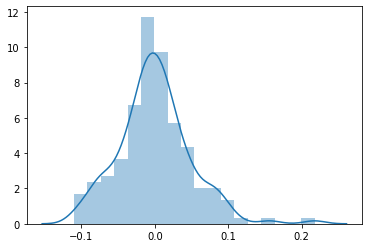

In [3139]:
y_train_pred=lr_model1.predict(X_train_sm)
res=y_train-y_train_pred

sns.distplot(res)
model_list1=model_list.copy()

In [3140]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
27,Company_subaru,inf
13,enginloc_rear,inf
20,enginetype_ohcf,inf
16,curbweight,141.40
14,carlength,90.97
15,carwidth,70.94
17,enginesize,65.22
5,enginetype_ohc,24.30
0,cylindernumber_four,23.35
25,Company_peugeot,12.31


In [3141]:
corr_list=list(vif.query('VIF=="inf"')['Features'])
print(corr_list)
for i in range(0,len(corr_list)-1):
    for j in range(i+1,len(corr_list)):
        print(corr_list[i],corr_list[j],X_train[corr_list[i]].corr(X_train[corr_list[j]]))

['Company_subaru', 'enginloc_rear', 'enginetype_ohcf']
Company_subaru enginloc_rear -0.03289297045737758
Company_subaru enginetype_ohcf 0.8576035628236094
enginloc_rear enginetype_ohcf 0.48582388241058794


In [3142]:
#Removing inf values based  on correlation
remove_list=['enginloc_rear','enginetype_ohcf']
for i in remove_list:
    model_list.remove(i)

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     72.34
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.73e-67
Time:                        21:00:23   Log-Likelihood:                 249.03
No. Observations:                 164   AIC:                            -444.1
Df Residuals:                     137   BIC:                            -360.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0855      0.045     -1.889      0.061      -0.175       0.004
cylindernumber_four    -0.0093      0.027     -0.340      0.735      -0.064       0.045
fuelsystem_2bbl        -0.0026      0.015     -0.175      0.861      -0.032       0.027
cylindernumber_five    -0.0149      0.034     -0.435      0.664      -0.083       0.053
Company_jaguar          0.0341      0.059      0.578      0.565      -0.083       0.151
Company_porsche         0.1863      0.041      4.598      0.000       0.106       0.266
enginetype_ohc         -0.0463      0.028     -1.662      0.099      -0.101       0.009
carbody_hardtop         0.0382      0.040      0.958      0.340      -0.041       0.117
symboling_-1           -0.0093      0.019     -0.486      0.628      -0.047       0.029
symboling_1             0.0032      0.015      0.211      0.833      -0.027       0.033
symboling_3             0.0218      0.022      0.974      0.332      -0.022       0.066
drivewheel_rwd          0.0157      0.017      0.923      0.358      -0.018       0.049
symboling_2            -0.0062      0.016     -0.386      0.700      -0.038       0.026
carbody_hatchback      -0.0310      0.013     -2.469      0.015      -0.056      -0.006
carlength              -0.1158      0.075     -1.554      0.122      -0.263       0.032
carwidth                0.2516      0.072      3.510      0.001       0.110       0.393
curbweight              0.2691      0.117      2.305      0.023       0.038       0.500
enginesize              0.5052      0.123      4.093      0.000       0.261       0.749
peakrpm                 0.0676      0.024      2.777      0.006       0.019       0.116
enginetype_l            0.0999      0.067      1.485      0.140      -0.033       0.233
enginetype_ohcv        -0.1054      0.033     -3.226      0.002      -0.170      -0.041
enginetype_rotor        0.0279      0.051      0.547      0.585      -0.073       0.129
Company_bmw             0.2135      0.033      6.426      0.000       0.148       0.279
Company_buick           0.1764      0.036      4.897      0.000       0.105       0.248
Company_peugeot        -0.1721      0.072     -2.391      0.018      -0.314      -0.030
Company_renault        -0.0671      0.043     -1.553      0.123      -0.152       0.018
Company_subaru         -0.0546      0.038     -1.455      0.148      -0.129       0.020
==============================================================================
Omnibus:                       11.446   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.834
Skew:                           0.278   Prob(JB):                     1.82e-05
Kurtosis:                       4.699   Cond. No.                         65.6
================================================

In [3143]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
15,curbweight,140.66
13,carlength,88.12
16,enginesize,63.24
14,carwidth,62.98
5,enginetype_ohc,24.25
0,cylindernumber_four,23.33
23,Company_peugeot,12.10
18,enginetype_l,11.31
17,peakrpm,7.61
10,drivewheel_rwd,5.42


In [3144]:
#Based on probability
remove_list=['cylindernumber_five','cylindernumber_four','fuelsystem_2bbl','Company_jaguar','symboling_1',
             'symboling_-1',
            'symboling_3','symboling_2','enginetype_rotor']
for i in remove_list:
    model_list.remove(i)

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     114.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.53e-75
Time:                        21:00:24   Log-Likelihood:                 246.70
No. Observations:                 164   AIC:                            -457.4
Df Residuals:                     146   BIC:                            -401.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0718      0.032     -2.218      0.028      -0.136      -0.008
Company_porsche       0.1879      0.035      5.367      0.000       0.119       0.257
enginetype_ohc       -0.0743      0.019     -3.898      0.000      -0.112      -0.037
carbody_hardtop       0.0387      0.037      1.047      0.297      -0.034       0.112
drivewheel_rwd        0.0158      0.015      1.032      0.304      -0.014       0.046
carbody_hatchback    -0.0265      0.012     -2.286      0.024      -0.049      -0.004
carlength            -0.1420      0.066     -2.141      0.034      -0.273      -0.011
carwidth              0.2630      0.063      4.181      0.000       0.139       0.387
curbweight            0.2897      0.100      2.898      0.004       0.092       0.487
enginesize            0.5053      0.086      5.843      0.000       0.334       0.676
peakrpm               0.0730      0.022      3.256      0.001       0.029       0.117
enginetype_l          0.0608      0.062      0.982      0.328      -0.062       0.183
enginetype_ohcv      -0.1185      0.027     -4.432      0.000      -0.171      -0.066
Company_bmw           0.2227      0.027      8.379      0.000       0.170       0.275
Company_buick         0.1675      0.031      5.473      0.000       0.107       0.228
Company_peugeot      -0.1578      0.066     -2.397      0.018      -0.288      -0.028
Company_renault      -0.0681      0.041     -1.646      0.102      -0.150       0.014
Company_subaru       -0.0827      0.029     -2.896      0.004      -0.139      -0.026
==============================================================================
Omnibus:                       10.470   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.793
Skew:                           0.143   Prob(JB):                     1.12e-05
Kurtosis:                       4.804   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3145]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
7,curbweight,109.48
5,carlength,63.17
6,carwidth,49.78
8,enginesize,32.71
14,Company_peugeot,10.47
10,enginetype_l,9.43
1,enginetype_ohc,6.61
9,peakrpm,5.44
3,drivewheel_rwd,4.46
11,enginetype_ohcv,2.47


In [3146]:
#Based on probability
remove_list=['carbody_hardtop','drivewheel_rwd','enginetype_l']
for i in remove_list:
    model_list.remove(i)

X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.45e-78
Time:                        21:00:24   Log-Likelihood:                 244.85
No. Observations:                 164   AIC:                            -459.7
Df Residuals:                     149   BIC:                            -413.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0550      0.030     -1.822      0.070      -0.115       0.005
Company_porsche       0.2049      0.033      6.211      0.000       0.140       0.270
enginetype_ohc       -0.0869      0.017     -4.969      0.000      -0.121      -0.052
carbody_hatchback    -0.0264      0.012     -2.280      0.024      -0.049      -0.004
carlength            -0.1429      0.064     -2.230      0.027      -0.269      -0.016
carwidth              0.2500      0.062      4.002      0.000       0.127       0.373
curbweight            0.2984      0.086      3.481      0.001       0.129       0.468
enginesize            0.5212      0.079      6.634      0.000       0.366       0.677
peakrpm               0.0707      0.022      3.185      0.002       0.027       0.115
enginetype_ohcv      -0.1278      0.026     -4.865      0.000      -0.180      -0.076
Company_bmw           0.2318      0.025      9.418      0.000       0.183       0.280
Company_buick         0.1796      0.030      6.054      0.000       0.121       0.238
Company_peugeot      -0.0985      0.029     -3.373      0.001      -0.156      -0.041
Company_renault      -0.0716      0.041     -1.734      0.085      -0.153       0.010
Company_subaru       -0.0989      0.027     -3.722      0.000      -0.151      -0.046
==============================================================================
Omnibus:                        9.952   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.605
Skew:                           0.249   Prob(JB):                     0.000150
Kurtosis:                       4.526   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3147]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,curbweight,80.61
3,carlength,58.77
4,carwidth,48.47
6,enginesize,26.75
1,enginetype_ohc,6.11
7,peakrpm,5.28
8,enginetype_ohcv,2.43
2,carbody_hatchback,1.88
11,Company_peugeot,1.78
0,Company_porsche,1.67


In [3148]:
#Based on VIF
model_list.remove('curbweight')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.29e-76
Time:                        21:00:24   Log-Likelihood:                 238.44
No. Observations:                 164   AIC:                            -448.9
Df Residuals:                     150   BIC:                            -405.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0584      0.031     -1.865      0.064      -0.120       0.003
Company_porsche       0.1983      0.034      5.810      0.000       0.131       0.266
enginetype_ohc       -0.1036      0.017     -5.947      0.000      -0.138      -0.069
carbody_hatchback    -0.0212      0.012     -1.782      0.077      -0.045       0.002
carlength            -0.0216      0.056     -0.388      0.698      -0.132       0.088
carwidth              0.3117      0.062      5.023      0.000       0.189       0.434
enginesize            0.6911      0.064     10.829      0.000       0.565       0.817
peakrpm               0.0746      0.023      3.247      0.001       0.029       0.120
enginetype_ohcv      -0.1411      0.027     -5.239      0.000      -0.194      -0.088
Company_bmw           0.2313      0.026      9.068      0.000       0.181       0.282
Company_buick         0.1902      0.031      6.217      0.000       0.130       0.251
Company_peugeot      -0.0831      0.030     -2.775      0.006      -0.142      -0.024
Company_renault      -0.0894      0.042     -2.105      0.037      -0.173      -0.006
Company_subaru       -0.1101      0.027     -4.027      0.000      -0.164      -0.056
==============================================================================
Omnibus:                        9.991   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               14.359
Skew:                           0.349   Prob(JB):                     0.000762
Kurtosis:                       4.271   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3149]:
#Based on probability
model_list.remove('carlength')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     150.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.97e-77
Time:                        21:00:24   Log-Likelihood:                 238.36
No. Observations:                 164   AIC:                            -450.7
Df Residuals:                     151   BIC:                            -410.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0636      0.028     -2.257      0.025      -0.119      -0.008
Company_porsche       0.2032      0.032      6.430      0.000       0.141       0.266
enginetype_ohc       -0.1020      0.017     -6.056      0.000      -0.135      -0.069
carbody_hatchback    -0.0191      0.011     -1.813      0.072      -0.040       0.002
carwidth              0.2949      0.044      6.677      0.000       0.208       0.382
enginesize            0.6854      0.062     11.067      0.000       0.563       0.808
peakrpm               0.0756      0.023      3.316      0.001       0.031       0.121
enginetype_ohcv      -0.1379      0.026     -5.396      0.000      -0.188      -0.087
Company_bmw           0.2300      0.025      9.123      0.000       0.180       0.280
Company_buick         0.1926      0.030      6.452      0.000       0.134       0.252
Company_peugeot      -0.0827      0.030     -2.772      0.006      -0.142      -0.024
Company_renault      -0.0905      0.042     -2.141      0.034      -0.174      -0.007
Company_subaru       -0.1080      0.027     -4.040      0.000      -0.161      -0.055
==============================================================================
Omnibus:                        9.586   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               13.801
Skew:                           0.331   Prob(JB):                      0.00101
Kurtosis:                       4.257   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3150]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,carwidth,22.67
4,enginesize,13.98
1,enginetype_ohc,5.11
5,peakrpm,5.00
6,enginetype_ohcv,2.23
9,Company_peugeot,1.69
2,carbody_hatchback,1.63
8,Company_buick,1.53
0,Company_porsche,1.39
11,Company_subaru,1.24


In [3151]:
#Based on VIF
model_list.remove('carwidth')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()


C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.64e-70
Time:                        21:00:25   Log-Likelihood:                 217.14
No. Observations:                 164   AIC:                            -410.3
Df Residuals:                     152   BIC:                            -373.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0307      0.031     -0.976      0.330      -0.093       0.031
Company_porsche       0.1719      0.035      4.849      0.000       0.102       0.242
enginetype_ohc       -0.0797      0.019     -4.257      0.000      -0.117      -0.043
carbody_hatchback    -0.0149      0.012     -1.251      0.213      -0.038       0.009
enginesize            0.9589      0.053     18.202      0.000       0.855       1.063
peakrpm               0.1039      0.025      4.093      0.000       0.054       0.154
enginetype_ohcv      -0.1510      0.029     -5.227      0.000      -0.208      -0.094
Company_bmw           0.2068      0.028      7.303      0.000       0.151       0.263
Company_buick         0.2504      0.032      7.725      0.000       0.186       0.314
Company_peugeot      -0.0037      0.031     -0.120      0.904      -0.065       0.058
Company_renault      -0.0820      0.048     -1.711      0.089      -0.177       0.013
Company_subaru       -0.0843      0.030     -2.803      0.006      -0.144      -0.025
==============================================================================
Omnibus:                       12.316   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.421
Skew:                           0.577   Prob(JB):                      0.00122
Kurtosis:                       3.796   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3152]:
#Based on probability
model_list.remove('Company_peugeot')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.88e-71
Time:                        21:00:25   Log-Likelihood:                 217.14
No. Observations:                 164   AIC:                            -412.3
Df Residuals:                     153   BIC:                            -378.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0328      0.026     -1.238      0.218      -0.085       0.020
Company_porsche       0.1722      0.035      4.879      0.000       0.102       0.242
enginetype_ohc       -0.0784      0.015     -5.077      0.000      -0.109      -0.048
carbody_hatchback    -0.0147      0.012     -1.253      0.212      -0.038       0.008
enginesize            0.9596      0.052     18.374      0.000       0.856       1.063
peakrpm               0.1049      0.024      4.386      0.000       0.058       0.152
enginetype_ohcv      -0.1500      0.028     -5.448      0.000      -0.204      -0.096
Company_bmw           0.2068      0.028      7.326      0.000       0.151       0.263
Company_buick         0.2507      0.032      7.783      0.000       0.187       0.314
Company_renault      -0.0821      0.048     -1.718      0.088      -0.176       0.012
Company_subaru       -0.0828      0.027     -3.041      0.003      -0.137      -0.029
==============================================================================
Omnibus:                       12.489   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.601
Skew:                           0.585   Prob(JB):                      0.00111
Kurtosis:                       3.789   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3153]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,enginesize,4.39
4,peakrpm,4.20
1,enginetype_ohc,3.78
5,enginetype_ohcv,2.03
2,carbody_hatchback,1.61
7,Company_buick,1.39
0,Company_porsche,1.29
6,Company_bmw,1.18
9,Company_subaru,1.12
8,Company_renault,1.02


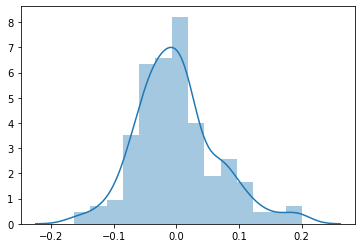

In [3154]:
y_train_pred=lr_model26.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)
model_list26=model_list.copy()

In [3155]:
#Based on probability
model_list.remove('carbody_hatchback')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.63e-72
Time:                        21:00:26   Log-Likelihood:                 216.30
No. Observations:                 164   AIC:                            -412.6
Df Residuals:                     154   BIC:                            -381.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0403      0.026     -1.564      0.120      -0.091       0.011
Company_porsche     0.1682      0.035      4.778      0.000       0.099       0.238
enginetype_ohc     -0.0785      0.015     -5.071      0.000      -0.109      -0.048
enginesize          0.9740      0.051     19.081      0.000       0.873       1.075
peakrpm             0.1036      0.024      4.327      0.000       0.056       0.151
enginetype_ohcv    -0.1551      0.027     -5.686      0.000      -0.209      -0.101
Company_bmw         0.2094      0.028      7.425      0.000       0.154       0.265
Company_buick       0.2525      0.032      7.832      0.000       0.189       0.316
Company_renault    -0.0849      0.048     -1.776      0.078      -0.179       0.010
Company_subaru     -0.0805      0.027     -2.959      0.004      -0.134      -0.027
==============================================================================
Omnibus:                       13.070   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.385
Skew:                           0.601   Prob(JB):                     0.000752
Kurtosis:                       3.813   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

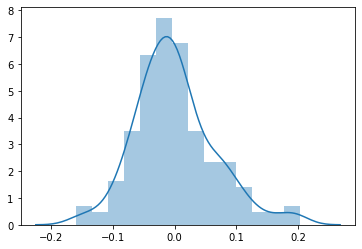

In [3156]:
y_train_pred=lr_model26.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)
model_list26=model_list.copy()

In [3157]:
#Based on probability
model_list.remove('Company_renault')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     168.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.34e-72
Time:                        21:00:27   Log-Likelihood:                 214.64
No. Observations:                 164   AIC:                            -411.3
Df Residuals:                     155   BIC:                            -383.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0383      0.026     -1.474      0.142      -0.090       0.013
Company_porsche     0.1707      0.035      4.819      0.000       0.101       0.241
enginetype_ohc     -0.0805      0.016     -5.181      0.000      -0.111      -0.050
enginesize          0.9671      0.051     18.870      0.000       0.866       1.068
peakrpm             0.1031      0.024      4.275      0.000       0.055       0.151
enginetype_ohcv    -0.1537      0.027     -5.599      0.000      -0.208      -0.100
Company_bmw         0.2124      0.028      7.493      0.000       0.156       0.268
Company_buick       0.2549      0.032      7.861      0.000       0.191       0.319
Company_subaru     -0.0812      0.027     -2.964      0.004      -0.135      -0.027
==============================================================================
Omnibus:                       13.148   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.302
Skew:                           0.614   Prob(JB):                     0.000784
Kurtosis:                       3.764   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3158]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
2,enginesize,4.34
3,peakrpm,3.91
1,enginetype_ohc,3.63
4,enginetype_ohcv,2.00
6,Company_buick,1.38
0,Company_porsche,1.28
5,Company_bmw,1.15
7,Company_subaru,1.11


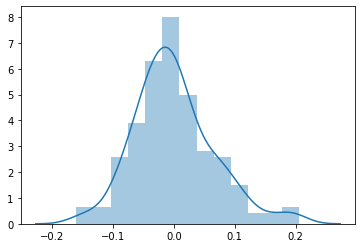

In [3159]:
y_train_pred=lr_model26.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)
model_list26=model_list.copy()

In [3160]:
#Based on probabilty
model_list.remove('Company_subaru')

#model_list.append('')
X=X_train[model_list]
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model26=lr.fit()
lr_model26.summary()

C:\Users\psoftdev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.17e-71
Time:                        21:00:28   Log-Likelihood:                 210.11
No. Observations:                 164   AIC:                            -404.2
Df Residuals:                     156   BIC:                            -379.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0771      0.023     -3.360      0.001      -0.122      -0.032
Company_porsche     0.1690      0.036      4.656      0.000       0.097       0.241
enginetype_ohc     -0.0576      0.014     -4.170      0.000      -0.085      -0.030
enginesize          1.0026      0.051     19.635      0.000       0.902       1.103
peakrpm             0.1194      0.024      4.966      0.000       0.072       0.167
enginetype_ohcv    -0.1420      0.028     -5.100      0.000      -0.197      -0.087
Company_bmw         0.2050      0.029      7.085      0.000       0.148       0.262
Company_buick       0.2520      0.033      7.587      0.000       0.186       0.318
==============================================================================
Omnibus:                       10.941   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.185
Skew:                           0.616   Prob(JB):                      0.00373
Kurtosis:                       3.343   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

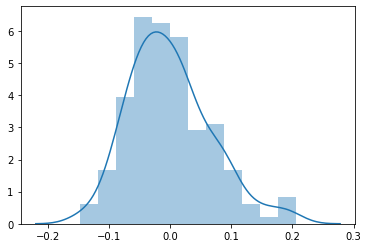

In [3161]:
y_train_pred=lr_model26.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)
model_list26=model_list.copy()

In [3162]:
#Predicting on test model
new_model_list=[]
if 'const' not in new_model_list:
    new_model_list.append('const')
for i in model_list26:
 
    new_model_list.append(i)
X_test_sm=sm.add_constant(X_test)
X_test_sm=X_test_sm[new_model_list]
#print(new_model_list)
y_test_pred=lr_model26.predict(X_test_sm)



In [3163]:
#finding r2_score of test set and predicted test set
r2_score(y_true=y_test,y_pred=y_test_pred)


0.7846066412222235

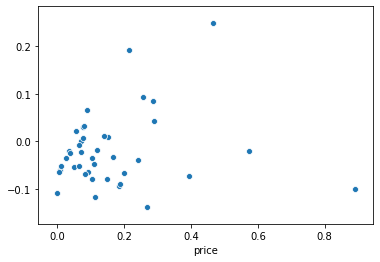

In [3164]:
#scatter plot  of y v/s residual
sns.scatterplot(x=y_test,y=y_test-y_test_pred)


In [3165]:
lr_model26.params

const             -0.077114
Company_porsche    0.169012
enginetype_ohc    -0.057601
enginesize         1.002601
peakrpm            0.119409
enginetype_ohcv   -0.142005
Company_bmw        0.204968
Company_buick      0.251962
dtype: float64

##### Prediction Summary
- Cars of BMW,Prosche and Buick are on higher range of price
- Price has the highest correlation with enginesize
- peakrpm has positive correlation with price
- Cars with enginetype_ohc and enginetype_ohcv are in cheaper range
- This model is rejected since  there  is almost 0.1 difference in r2_score calculated for test dataframe and train dataframe.
- Notice most of the residuals are ont he negative side
- Even the normalization of residual is not looking even. It is less sloping on the right side